### LSE Data Analytics Online Career Accelerator

# Course 2: Data Analytics using Python

## Assignment: Diagnostic Analysis using Python

### The Problem Context

The NHS incurs significant, potentially avoidable, costs when patients miss general practitioner (GP) appointments. The reasons for missed appointments need to be better understood as explained by The British Medical Association (BMA) chair Professor Philip Banfield: 
> "While it is frustrating when patients do not attend, the reasons why this happens should be investigated rather than simply resorting to punishing them. Financially penalising patients inevitably impact the poorest and most vulnerable in the community (GP Practice News 2022)."

As part of a team of data analysts contracted by the National Health Services (NHS), I will use Python to explore the available data and transform it into actionable insights that will allow the NHS to better understand their patients; in particular, the leading reasons as to why patients miss appointments, and how to tackle this problem in a way that helps both patient and system.  

# 

# Assignment activity 1

### Proof of my GitHub repository

[My GitHub repository (Link)](https://github.com/CrispyChen/Christian_Chen_DA201_Assignment)

# 

# Assignment activity 2

### 2.1 Prepare your workstation

**Disable auto-scrolling in all cell outputs for cleanness**

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

**Import all relevant libraries and settings for analysis**

In [2]:
# Import the necessary libraries for intitial analysis.
import pandas as pd
import numpy as np
from datetime import datetime
import random
import calendar
import string

In [3]:
# Import the necessary libraries for data visualisation.
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

In [4]:
# Optional - Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

# Optional - Get multiple outputs in the same cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

### 2.2 Importing and sense checking the data

In [5]:
# Import and sense-check the actual_duration.csv data. Name the DataFrame ad.
ad = pd.read_csv('actual_duration.csv')

# View the DataFrame by:
# 1. Checking the shape,
# 2. Checking the data types,
# 3. Checking the first five rows,
# 4. Checking the last five rows.
display(ad.shape)
display(ad.dtypes)
display(ad.head())
display(ad.tail())

(137793, 8)

sub_icb_location_code        object
sub_icb_location_ons_code    object
sub_icb_location_name        object
icb_ons_code                 object
region_ons_code              object
appointment_date             object
actual_duration              object
count_of_appointments         int64
dtype: object

sub_icb_location_code sub_icb_location_ons_code  \
0                   00L                 E38000130   
1                   00L                 E38000130   
2                   00L                 E38000130   
3                   00L                 E38000130   
4                   00L                 E38000130   

                        sub_icb_location_name icb_ons_code region_ons_code  \
0  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
1  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
2  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
3  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
4  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   

  appointment_date         actual_duration  count_of_appointments  
0        01-Dec-21           31-60 Minutes                    364  
1        01-Dec-21           21-30 Minutes                    619  
2        01-Dec-21            6-10 Minutes                   1698  
3        01-Dec-21  Unknown / Data Quality                   1277  
4        01-Dec-21           16-20 Minutes                    730

sub_icb_location_code sub_icb_location_ons_code  \
137788                 X2C4Y                 E38000254   
137789                 X2C4Y                 E38000254   
137790                 X2C4Y                 E38000254   
137791                 X2C4Y                 E38000254   
137792                 X2C4Y                 E38000254   

                 sub_icb_location_name icb_ons_code region_ons_code  \
137788  NHS West Yorkshire ICB - X2C4Y    E54000054       E40000012   
137789  NHS West Yorkshire ICB - X2C4Y    E54000054       E40000012   
137790  NHS West Yorkshire ICB - X2C4Y    E54000054       E40000012   
137791  NHS West Yorkshire ICB - X2C4Y    E54000054       E40000012   
137792  NHS West Yorkshire ICB - X2C4Y    E54000054       E40000012   

       appointment_date actual_duration  count_of_appointments  
137788        30-Jun-22   31-60 Minutes                    430  
137789        30-Jun-22   21-30 Minutes                    751  
137790        30-Jun-22   16-20 Minutes                    921  
137791        30-Jun-22   11-15 Minutes                   1439  
137792        30-Jun-22     1-5 Minutes                   1739

In [6]:
# Import and sense-check the appointments_regional.csv. Name the DataFrame ar.
ar = pd.read_csv('appointments_regional.csv')

# View the DataFrame by:
# 1. Checking the shape,
# 2. Checking the data types,
# 3. Checking the first five rows,
# 4. Checking the last five rows.
display(ar.shape)
display(ar.dtypes)
display(ar.head())
display(ar.tail())

(596821, 7)

icb_ons_code                         object
appointment_month                    object
appointment_status                   object
hcp_type                             object
appointment_mode                     object
time_between_book_and_appointment    object
count_of_appointments                 int64
dtype: object

icb_ons_code appointment_month appointment_status hcp_type appointment_mode  \
0    E54000034           2020-01           Attended       GP     Face-to-Face   
1    E54000034           2020-01           Attended       GP     Face-to-Face   
2    E54000034           2020-01           Attended       GP     Face-to-Face   
3    E54000034           2020-01           Attended       GP     Face-to-Face   
4    E54000034           2020-01           Attended       GP     Face-to-Face   

  time_between_book_and_appointment  count_of_appointments  
0                             1 Day                   8107  
1                    15  to 21 Days                   6791  
2                       2 to 7 Days                  20686  
3                    22  to 28 Days                   4268  
4                     8  to 14 Days                  11971

icb_ons_code appointment_month appointment_status hcp_type  \
596816    E54000050           2022-06            Unknown  Unknown   
596817    E54000050           2022-06            Unknown  Unknown   
596818    E54000050           2022-06            Unknown  Unknown   
596819    E54000050           2022-06            Unknown  Unknown   
596820    E54000050           2022-06            Unknown  Unknown   

       appointment_mode time_between_book_and_appointment  \
596816          Unknown                       2 to 7 Days   
596817          Unknown                    22  to 28 Days   
596818          Unknown                     8  to 14 Days   
596819          Unknown                 More than 28 Days   
596820          Unknown                          Same Day   

        count_of_appointments  
596816                     21  
596817                      8  
596818                     28  
596819                     17  
596820                     10

In [7]:
# Import and sense-check the national_categories.xlsx data. Name the DataFrame nc.
nc = pd.read_excel('national_categories.xlsx')
# Reading the Excel file takes a long time. Consider converting the .xlsx to a .csv file for particularly large data
# AND/OR when repeating calls to read e.g. if running all cells for convenience during debugging.
# Reading a .csv can speed up the process by 20% or so - worth keeping in mind.

# View the DataFrame by:
# 1. Checking the shape,
# 2. Checking the data types,
# 3. Checking the first five rows,
# 4. Checking the last five rows.
display(nc.shape)
display(nc.dtypes)
display(nc.head())
display(nc.tail())

(817394, 8)

appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object

appointment_date icb_ons_code                       sub_icb_location_name  \
0       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
1       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
2       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
3       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
4       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   

        service_setting            context_type  \
0  Primary Care Network  Care Related Encounter   
1                 Other  Care Related Encounter   
2      General Practice  Care Related Encounter   
3      General Practice  Care Related Encounter   
4      General Practice  Care Related Encounter   

                        national_category  count_of_appointments  \
0  Patient contact during Care Home Round                      3   
1                         Planned Clinics                      7   
2                              Home Visit                     79   
3              General Consultation Acute                    725   
4            Structured Medication Review                      2   

  appointment_month  
0           2021-08  
1           2021-08  
2           2021-08  
3           2021-08  
4           2021-08

appointment_date icb_ons_code           sub_icb_location_name  \
817389       2022-06-30    E54000054  NHS West Yorkshire ICB - X2C4Y   
817390       2022-06-30    E54000054  NHS West Yorkshire ICB - X2C4Y   
817391       2022-06-30    E54000054  NHS West Yorkshire ICB - X2C4Y   
817392       2022-06-30    E54000054  NHS West Yorkshire ICB - X2C4Y   
817393       2022-06-30    E54000054  NHS West Yorkshire ICB - X2C4Y   

                  service_setting            context_type  \
817389  Extended Access Provision  Care Related Encounter   
817390  Extended Access Provision  Care Related Encounter   
817391  Extended Access Provision  Care Related Encounter   
817392  Extended Access Provision  Care Related Encounter   
817393  Extended Access Provision  Care Related Encounter   

                   national_category  count_of_appointments appointment_month  
817389   Unplanned Clinical Activity                     12           2022-06  
817390               Planned Clinics                      4           2022-06  
817391    Planned Clinical Procedure                     92           2022-06  
817392  General Consultation Routine                      4           2022-06  
817393    General Consultation Acute                     19           2022-06

### 2.3 Checking for missing values

**Functions:**

In [8]:
# Build function that checks for missing values in DataFrame, and returns either:
# 1. The DataFrame containing only rows with null values,
# 2. Said DataFrame with null values highlighted in red (for visual checks).
def df_null(df, **kwargs):
    # Create a DataFrame subset containing missing values using isna().
    df_na = df[df.isna().any(axis=1)]
    
    # Provide optional keyword argument to highlight null values in red (if any exist).
    highlight = kwargs.get('highlight', None)
    
    # Return output DataFrame (or styler, if highlight=1)
    if highlight == 1:
        return df_na.style.highlight_null('red')
    else:
        return df_na

Example of function in action:

In [9]:
# Create a temporary DataFrame.
# Since this is a test, we only need a few rows.
df_temp = ad.copy().head()

# Randomly populate it with sporadic null values.
random.seed(42)  # Seed randomness for reproducability.
df_temp['appointment_date'] = df_temp['appointment_date'].sample(frac=0.5)

# Display function output without highlight.
# Add docstring for clarity.
print("DataFrame without optional highlight:")
display(df_null(df_temp))
print()  # Print blank line for clarity.

# Display function output with highlight.
# Add docstring for clarity.
print("DataFrame with optional highlight:")
display(df_null(df_temp, highlight=1))

# Clear temporary variables to free up memory.
del df_temp

DataFrame without optional highlight:


sub_icb_location_code sub_icb_location_ons_code  \
0                   00L                 E38000130   
1                   00L                 E38000130   
3                   00L                 E38000130   

                        sub_icb_location_name icb_ons_code region_ons_code  \
0  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
1  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
3  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   

  appointment_date         actual_duration  count_of_appointments  
0              NaN           31-60 Minutes                    364  
1              NaN           21-30 Minutes                    619  
3              NaN  Unknown / Data Quality                   1277


DataFrame with optional highlight:


**Outputs:**

In [10]:
# Determine whether there are missing values in actual_duration.csv.
ad_na = df_null(ad)

# Print the number of rows that have a NaN value.
# Add docstring for clarity.
print("The number of rows that have missing values:", ad_na.shape[0])

# View the DataFrame containing only rows with null values.
if ad_na.shape[0] != 0:
    display(ad_na)

The number of rows that have missing values: 0


In [11]:
# Determine whether there are missing values in appointments_regional.csv.
ar_na = df_null(ar)

# Print the number of rows that have a NaN value.
# Add docstring for clarity.
print("The number of rows that have missing values:", ar_na.shape[0])

# View the DataFrame containing only rows with null values.
if ar_na.shape[0] != 0:
    display(ar_na)

The number of rows that have missing values: 0


In [12]:
# Determine whether there are missing values in national_categories.xlsx.
nc_na = df_null(nc)

# Print the number of rows that have a NaN value.
# Add docstring for clarity.
print("The number of rows that have missing values:", nc_na.shape[0])

# View the DataFrame containing only rows with null values.
if nc_na.shape[0] != 0:
    display(nc_na)

The number of rows that have missing values: 0


### 2.4 Reviewing the metadata.

In [13]:
# Determine the metadata of data set actual_duration.csv.
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB


In [14]:
# Determine the metadata of data set appointments_regional.csv.
ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 non-null  object
 6   count_of_appointments              596821 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 31.9+ MB


In [15]:
# Determine the metadata of data set national_categories.xlsx.
nc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 49.9+ MB


### 2.5 Reviewing the descriptive statistics.

In [16]:
# Determine the descriptive statistics of data set actual_duration.csv.
display(ad.describe())

count_of_appointments
count          137793.000000
mean             1219.080011
std              1546.902956
min                 1.000000
25%               194.000000
50%               696.000000
75%              1621.000000
max             15400.000000

In [17]:
# Determine the descriptive statistics of data set appointments_regional.csv.
display(ar.describe())

count_of_appointments
count          596821.000000
mean             1244.601857
std              5856.887042
min                 1.000000
25%                 7.000000
50%                47.000000
75%               308.000000
max            211265.000000

In [18]:
# Determine the descriptive statistics of data set national_categories.xlsx.
display(nc.describe())

count_of_appointments
count          817394.000000
mean              362.183684
std              1084.576600
min                 1.000000
25%                 7.000000
50%                25.000000
75%               128.000000
max             16590.000000

**Comment:**

> national_categories.xlsx has by far the highest number of non-null rows of data, followed by appointments_regional.csv, then actual_duration.csv. All of the data has large variance in column 'count_of_appointments', with values ranging from as low as one, all the way up to 211265 in appointments_regional.csv.

### 2.6: Explore the data set

**Question 1:** How many locations are there in the data set?

In [19]:
# Determine the number of locations.
loc_cnt = nc['sub_icb_location_name'].nunique()

# Print the number of unique locations.
# Add docstring for clarity.
print("The number of unique sub-ICB locations:", loc_cnt)

The number of unique sub-ICB locations: 106


**Question 2:** What are the five locations with the highest number of records?



In [20]:
# Determine and sort the top five locations based on record count.
# The value_counts() function sorts counts in descending order by default.
loc_val_cnt = nc['sub_icb_location_name'].rename('record_count').value_counts().head()
loc_val_cnt.index.name = 'sub_icb_location_name'  # Rename index.

# Print the top five locations sorted by record count.
# Add docstring for clarity.
print("The top five sub-ICB locations sorted by record count:")
display(loc_val_cnt.to_frame())

The top five sub-ICB locations sorted by record count:


record_count
sub_icb_location_name                                    
NHS North West London ICB - W2U3Z                   13007
NHS Kent and Medway ICB - 91Q                       12637
NHS Devon ICB - 15N                                 12526
NHS Hampshire and Isle Of Wight ICB - D9Y0V         12171
NHS North East London ICB - A3A8R                   11837

**Question 3:** How many service settings, context types, national categories, and appointment statuses are there?

**Service settings:**

In [21]:
# Determine the number of service settings.
ss_cnt = nc['service_setting'].nunique()

# Print the number of unique service settings.
# Add docstring for clarity.
print("The number of unique service settings:", ss_cnt)

The number of unique service settings: 5


In [22]:
# Sort the service settings based on record count.
# The value_counts() function sorts counts in descending order by default.
ss_val_cnt = nc['service_setting'].rename('record_count').value_counts()
ss_val_cnt.index.name = 'service_setting'  # Rename index.

# Print service settings sorted by record count.
# Add docstring for clarity.
print("The service settings sorted by record count:")
display(ss_val_cnt.to_frame())

The service settings sorted by record count:


record_count
service_setting                        
General Practice                 359274
Primary Care Network             183790
Other                            138789
Extended Access Provision        108122
Unmapped                          27419

**Context types:**

In [23]:
# Determine the number of context types.
ct_cnt = nc['context_type'].nunique()

# Print the number of unique context types.
# Add docstring for clarity.
print("The number of unique context types:", ct_cnt)

The number of unique context types: 3


In [24]:
# Sort the service settings based on record count.
# The value_counts() function sorts counts in descending order by default.
ct_val_cnt = nc['context_type'].rename('record_count').value_counts()
ct_val_cnt.index.name = 'context_type'  # Rename index.

# Print service settings sorted by record count.
# Add docstring for clarity.
print("The context types sorted by record count:")
display(ct_val_cnt.to_frame())

The context types sorted by record count:


record_count
context_type                        
Care Related Encounter        700481
Inconsistent Mapping           89494
Unmapped                       27419

**National categories:**

In [25]:
# Determine the number of national categories.
nc_cnt = nc['national_category'].nunique()

# Print the number of unique national categories.
# Add docstring for clarity.
print("The number of unique national categories:", nc_cnt)

The number of unique national categories: 18


In [26]:
# Sort the service settings based on record count.
# The value_counts() function sorts counts in descending order by default.
nc_val_cnt = nc['national_category'].rename('record_count').value_counts()
nc_val_cnt.index.name = 'national_category'  # Rename index.

# Print service settings sorted by record count.
# Add docstring for clarity.
print("The national categories sorted by record count:")
display(nc_val_cnt.to_frame())

The national categories sorted by record count:


record_count
national_category                                               
Inconsistent Mapping                                       89494
General Consultation Routine                               89329
General Consultation Acute                                 84874
Planned Clinics                                            76429
Clinical Triage                                            74539
Planned Clinical Procedure                                 59631
Structured Medication Review                               44467
Service provided by organisation external to th...         43095
Home Visit                                                 41850
Unplanned Clinical Activity                                40415
Patient contact during Care Home Round                     28795
Unmapped                                                   27419
Care Home Visit                                            26644
Social Prescribing Service                                 26492
Care Home Needs Assessment & Personalised Care ...         23505
Non-contractual chargeable work                            20896
Walk-in                                                    14179
Group Consultation and Group Education                      5341

**Appointment statuses:**

In [27]:
# Determine the number of appointment statuses.
as_cnt = ar['appointment_status'].nunique()

# Print the number of unique appointment statuses.
# Add docstring for clarity.
print("The number of unique appointment statuses:", as_cnt)

The number of unique appointment statuses: 3


In [28]:
# Sort the service settings based on record count.
# The value_counts() function sorts counts in descending order by default.
as_val_cnt = ar['appointment_status'].rename('record_count').value_counts()
as_val_cnt.index.name = 'appointment_status'  # Rename index.

# Print service settings sorted by record count.
# Add docstring for clarity.
print("The appointment statuses sorted by record count:")
display(as_val_cnt.to_frame())

The appointment statuses sorted by record count:


record_count
appointment_status              
Attended                  232137
Unknown                   201324
DNA                       163360

# 

# Assignment activity 3

### 3.1: Continue to explore the data and search for answers to more specific questions posed by the NHS.

**Question 1:** Between what dates were appointments scheduled? 

In [29]:
# View the first five rows of appointment_date for the ad DataFrame to determine the date format.
display(ad['appointment_date'].head())

0    01-Dec-21
1    01-Dec-21
2    01-Dec-21
3    01-Dec-21
4    01-Dec-21
Name: appointment_date, dtype: object

In [30]:
# View the first five rows of appointment_month for the ar DataFrame to determine the date format.
display(ar['appointment_month'].head())

# This is in the same syntax format as ad, but with the days intentionally not included. 
# Formatting this to datetime format will add days, so this will be left as is.

0    2020-01
1    2020-01
2    2020-01
3    2020-01
4    2020-01
Name: appointment_month, dtype: object

In [31]:
# View the first five rows of appointment_date for the nc DataFrame to determine the date format.
display(nc['appointment_date'].head())

0   2021-08-02
1   2021-08-02
2   2021-08-02
3   2021-08-02
4   2021-08-02
Name: appointment_date, dtype: datetime64[ns]

In [32]:
# Change the date format of ad['appointment_date'].
ad['appointment_date'] = pd.to_datetime(ad['appointment_date'])

# View the DateFrame.
display(ad['appointment_date'].head())

0   2021-12-01
1   2021-12-01
2   2021-12-01
3   2021-12-01
4   2021-12-01
Name: appointment_date, dtype: datetime64[ns]

In [33]:
# Change the date format of nc['appointment_date'].
nc['appointment_date'] = pd.to_datetime(nc['appointment_date'])

# View the DateFrame.
display(nc['appointment_date'].head())

0   2021-08-02
1   2021-08-02
2   2021-08-02
3   2021-08-02
4   2021-08-02
Name: appointment_date, dtype: datetime64[ns]

In [34]:
# Determine the minimum and maximum dates in the ad DataFrame.
ad_min = ad['appointment_date'].min().date()
ad_max = ad['appointment_date'].max().date()

# Print output with appropriate docstrings.
print("The appointment dates in actual_duration.csv are between", 
      ad_min, "and", ad_max)

The appointment dates in actual_duration.csv are between 2021-12-01 and 2022-06-30


In [35]:
# Determine the minimum and maximum dates in the ar DataFrame.
ar_min = ar['appointment_month'].min()
ar_max = ar['appointment_month'].max()

# Print output with appropriate docstrings.
print("The appointment dates in appointments_regional.csv are between", 
      ar_min, "and", ar_max)

The appointment dates in appointments_regional.csv are between 2020-01 and 2022-06


In [36]:
# Determine the minimum and maximum dates in the nc DataFrame.
nc_min = nc['appointment_date'].min().date()
nc_max = nc['appointment_date'].max().date()

# Print output with appropriate docstrings.
print("The appointment dates in national_categories.xlsx are between", 
      nc_min, "and", nc_max)

The appointment dates in national_categories.xlsx are between 2021-08-01 and 2022-06-30


**Question 2:** Which service setting was the most popular for NHS North West London from 1 January to 1 June 2022?

In [37]:
# For each of these service settings, we determine the number of records available for the period and the location. 
# First, we define variables for readability.
location = 'NHS North West London ICB - W2U3Z'
start_date = '2022-01-01'
end_date = '2022-06-01'

# Next, we apply filters according to the defined variables above.
nc_subset = nc[nc['sub_icb_location_name'] == location]  # Filter by location.
nc_subset = nc_subset[(nc_subset['appointment_date'] >= start_date) 
                      & (nc_subset['appointment_date'] <= end_date)]  # Filter within date range.
nc_subset_ss_cnt = nc_subset['service_setting'].rename('record_count').value_counts()
nc_subset_ss_cnt.index.name = 'service_setting'  # Rename index.

# Print the most popular service setting.
# Add docstring for clarity.
print("The most popular service setting was:", 
      nc_subset_ss_cnt.index[nc_subset_ss_cnt == nc_subset_ss_cnt.max()][0])
print()  # Print blank line for clarity.

# Print service settings sorted by record count.
# Add docstring for clarity.
print("Service settings by popularity in", location,
      "between", start_date, "and", end_date, ":")
display(nc_subset_ss_cnt.to_frame())

The most popular service setting was: General Practice

Service settings by popularity in NHS North West London ICB - W2U3Z between 2022-01-01 and 2022-06-01 :


record_count
service_setting                        
General Practice                   2104
Other                              1318
Primary Care Network               1272
Extended Access Provision          1090
Unmapped                            152

**Question 3:** Which month had the highest number of appointments?

In [38]:
# Number of appointments per month == sum of count_of_appointments by month.
# We proceed by making use of the groupby() and sort_values() functions.
nc_month = nc['count_of_appointments']\
    .groupby([nc['appointment_date'].dt.year.rename('year'), 
              nc['appointment_date'].dt.month.rename('month')]).sum()\
    .sort_values(ascending = False)  # Sort in descending order and rename columns 'year' and 'month' for clarity.

# Print the month with the most appointments.
# Add docstring for clarity.
print("The month with the most appointments was:", 
      calendar.month_name[nc_month.index[nc_month == nc_month.max()][0][1]],
      nc_month.index[nc_month == nc_month.max()][0][0])  # Use 'calendar' to output month as full name.
print()  # Print blank line for clarity.

# Print the number of appointments per month.
# Add docstring for clarity.
print("The number of appointments per month sorted by record count:")
display(nc_month.to_frame())

The month with the most appointments was: November 2021

The number of appointments per month sorted by record count:


count_of_appointments
year month                       
2021 11                  30405070
     10                  30303834
2022 3                   29595038
2021 9                   28522501
2022 5                   27495508
     6                   25828078
     1                   25635474
     2                   25355260
2021 12                  25140776
2022 4                   23913060
2021 8                   23852171

**Question 4:** What was the total number of records per month?

In [39]:
# Total number of records per month.
nc_month = nc['count_of_appointments']\
    .groupby([nc['appointment_date'].dt.year.rename('year'), 
              nc['appointment_date'].dt.month.rename('month')]).count()  # Rename columns 'year' and 'month' for clarity.

# Print the month with the most records.
# Add docstring for clarity.
print("The month with the most records was:", 
      calendar.month_name[nc_month.index[nc_month == nc_month.max()][0][1]],
      nc_month.index[nc_month == nc_month.max()][0][0])  # Use 'calendar' to output month as full name.
print()  # Print blank line for clarity.

# Print the total number of records per month.
# Add docstring for clarity.
print("The total number of records per month in chronological order:")
display(nc_month.to_frame())

The month with the most records was: March 2022

The total number of records per month in chronological order:


count_of_appointments
year month                       
2021 8                      69999
     9                      74922
     10                     74078
     11                     77652
     12                     72651
2022 1                      71896
     2                      71769
     3                      82822
     4                      70012
     5                      77425
     6                      74168

**Comment:**

> The month with the most records (March 2022) is NOT the same as the month with the most appointments (November 2021). 

# 

# Assignment activity 4

### Create visualisations and identify possible monthly and seasonal trends in the data.

Previously imported libraries and settings:

In [40]:
# Import the necessary libraries.
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

### 4.1: Objective 1
Create three visualisations indicating the number of appointments per month for service settings, context types, and national categories.

In [41]:
# Change the data type of the appointment month to string to allow for easier plotting.
nc['appointment_month'] = nc['appointment_month'].astype('string')

In [42]:
# Aggregate on monthly level and determine the sum of records per month.
nc_ss = nc.groupby(['appointment_month', 'service_setting']).sum('count_of_appointments').reset_index()

# View output.
# Add docstring for clarity.
print("The number of appointments per month, grouped by service setting, in chronological order:")
display(nc_ss)

The number of appointments per month, grouped by service setting, in chronological order:


appointment_month            service_setting  count_of_appointments
0            2021-08  Extended Access Provision                 160927
1            2021-08           General Practice               21575852
2            2021-08                      Other                 449101
3            2021-08       Primary Care Network                 432448
4            2021-08                   Unmapped                1233843
5            2021-09  Extended Access Provision                 187906
6            2021-09           General Practice               25940821
7            2021-09                      Other                 527174
8            2021-09       Primary Care Network                 530485
9            2021-09                   Unmapped                1336115
10           2021-10  Extended Access Provision                 209539
11           2021-10           General Practice               27606171
12           2021-10                      Other                 556487
13           2021-10       Primary Care Network                 564981
14           2021-10                   Unmapped                1366656
15           2021-11  Extended Access Provision                 207577
16           2021-11           General Practice               27767889
17           2021-11                      Other                 558784
18           2021-11       Primary Care Network                 614324
19           2021-11                   Unmapped                1256496
20           2021-12  Extended Access Provision                 173504
21           2021-12           General Practice               23008818
22           2021-12                      Other                 464718
23           2021-12       Primary Care Network                 539479
24           2021-12                   Unmapped                 954257
25           2022-01  Extended Access Provision                 186375
26           2022-01           General Practice               23583053
27           2022-01                      Other                 457440
28           2022-01       Primary Care Network                 569044
29           2022-01                   Unmapped                 839562
30           2022-02  Extended Access Provision                 196627
31           2022-02           General Practice               23305934
32           2022-02                      Other                 456153
33           2022-02       Primary Care Network                 585300
34           2022-02                   Unmapped                 811246
35           2022-03  Extended Access Provision                 231905
36           2022-03           General Practice               27187368
37           2022-03                      Other                 530677
38           2022-03       Primary Care Network                 702176
39           2022-03                   Unmapped                 942912
40           2022-04  Extended Access Provision                 192284
41           2022-04           General Practice               21916791
42           2022-04                      Other                 437402
43           2022-04       Primary Care Network                 606270
44           2022-04                   Unmapped                 760313
45           2022-05  Extended Access Provision                 220511
46           2022-05           General Practice               25238620
47           2022-05                      Other                 503327
48           2022-05       Primary Care Network                 712280
49           2022-05                   Unmapped                 820770
50           2022-06  Extended Access Provision                 209652
51           2022-06           General Practice               23680374
52           2022-06                      Other                 478813
53           2022-06       Primary Care Network                 700599
54           2022-06                   Unmapped                 758640

**Service settings:**

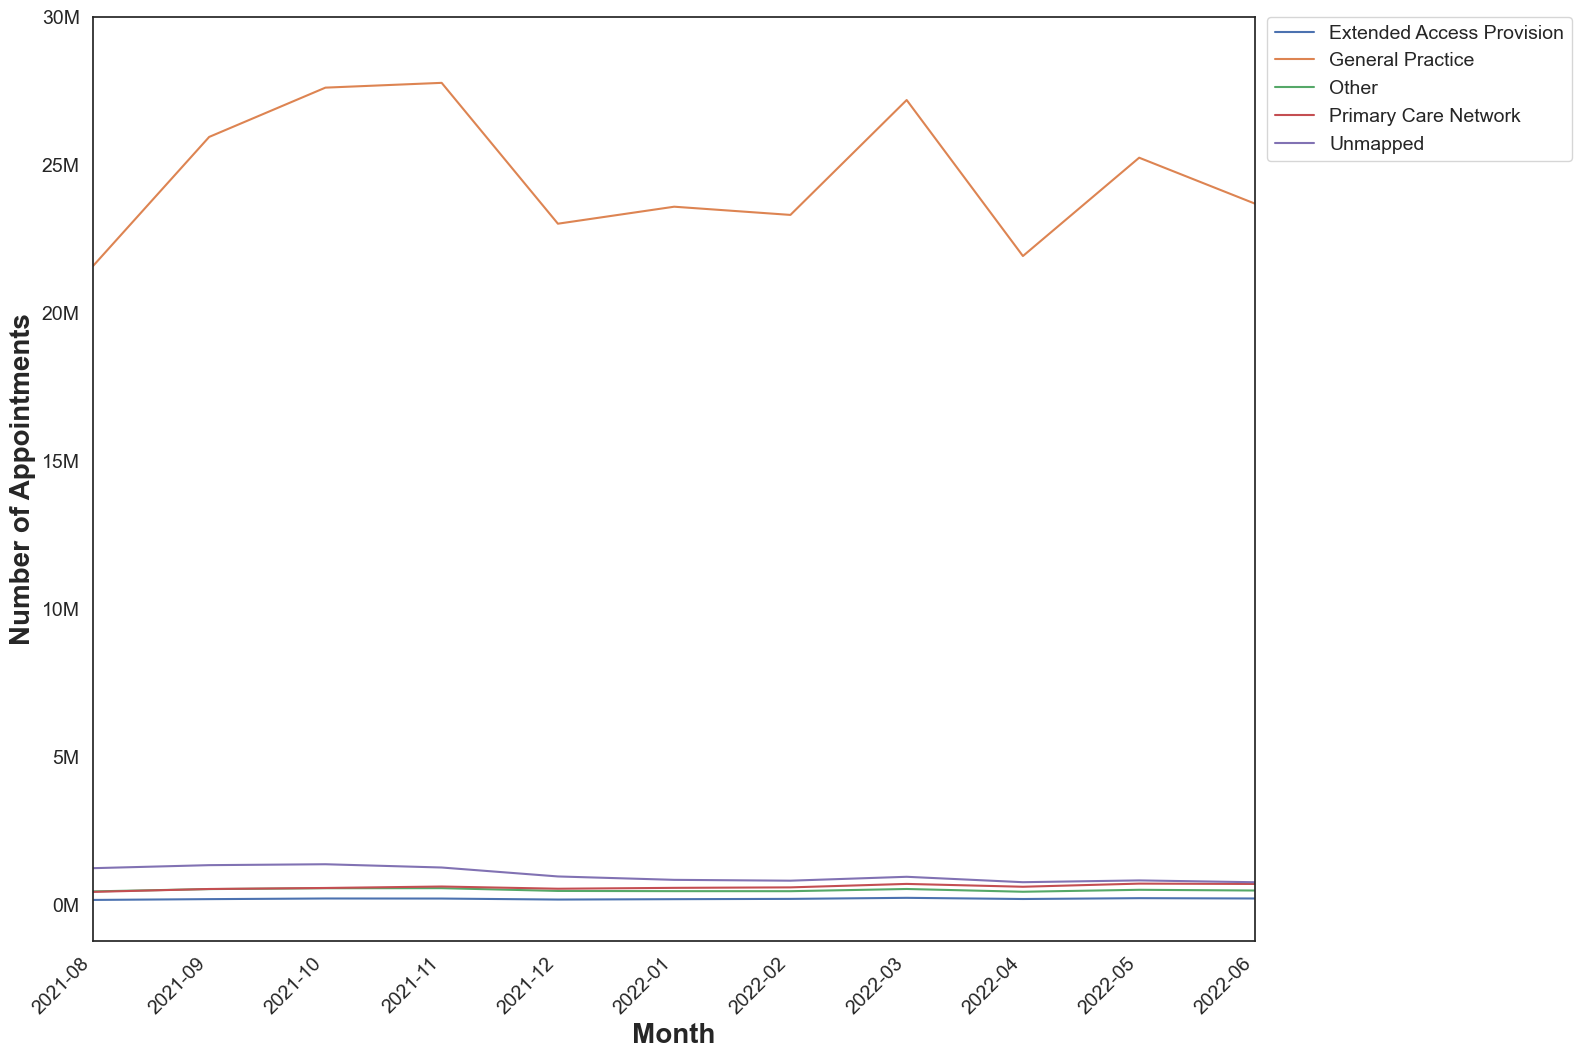

In [43]:
# Plot the appointments over the available date range, and review the service settings for months.
# Create a lineplot.
ax1 = sns.lineplot(x = 'appointment_month', y = 'count_of_appointments', hue = 'service_setting',
            data = nc_ss, ci = None)
# Reposition legend.
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0, fontsize=14);
# Adjust x axis.
plt.xlabel("Month", weight='bold', size=20);
plt.xlim([nc_ss['appointment_month'].min(), nc_ss['appointment_month'].max()]);
# Adjust y axis
plt.ylabel("Number of Appointments", weight='bold', size=20);
plt.ylim();
# Adjust x ticks.
plt.xticks(fontsize=14, rotation=45, horizontalalignment='right')
# Adjust y ticks.
ytick_positions = range(0, int(3e7)+int(0.5e7), int(0.5e7))
ytick_labels = [f'{int(x/1e6)}M' for x in ytick_positions]
plt.yticks(ytick_positions, ytick_labels, fontsize=14);  # Semicolon to remove extraneous output.

**Context types:**

In [44]:
# Create a separate data set that can be used in future weeks. 
nc_ct = nc.groupby(['appointment_month', 'context_type']).sum('count_of_appointments').reset_index()

# View output.
# Add docstring for clarity.
print("The number of appointments per month, grouped by context type, in chronological order:")
display(nc_ct)

The number of appointments per month, grouped by context type, in chronological order:


appointment_month            context_type  count_of_appointments
0            2021-08  Care Related Encounter               20255235
1            2021-08    Inconsistent Mapping                2363093
2            2021-08                Unmapped                1233843
3            2021-09  Care Related Encounter               24404251
4            2021-09    Inconsistent Mapping                2782135
5            2021-09                Unmapped                1336115
6            2021-10  Care Related Encounter               26125201
7            2021-10    Inconsistent Mapping                2811977
8            2021-10                Unmapped                1366656
9            2021-11  Care Related Encounter               26282778
10           2021-11    Inconsistent Mapping                2865796
11           2021-11                Unmapped                1256496
12           2021-12  Care Related Encounter               21798612
13           2021-12    Inconsistent Mapping                2387907
14           2021-12                Unmapped                 954257
15           2022-01  Care Related Encounter               22441947
16           2022-01    Inconsistent Mapping                2353965
17           2022-01                Unmapped                 839562
18           2022-02  Care Related Encounter               22211021
19           2022-02    Inconsistent Mapping                2332993
20           2022-02                Unmapped                 811246
21           2022-03  Care Related Encounter               25928850
22           2022-03    Inconsistent Mapping                2723276
23           2022-03                Unmapped                 942912
24           2022-04  Care Related Encounter               20904193
25           2022-04    Inconsistent Mapping                2248554
26           2022-04                Unmapped                 760313
27           2022-05  Care Related Encounter               24101243
28           2022-05    Inconsistent Mapping                2573495
29           2022-05                Unmapped                 820770
30           2022-06  Care Related Encounter               22621827
31           2022-06    Inconsistent Mapping                2447611
32           2022-06                Unmapped                 758640

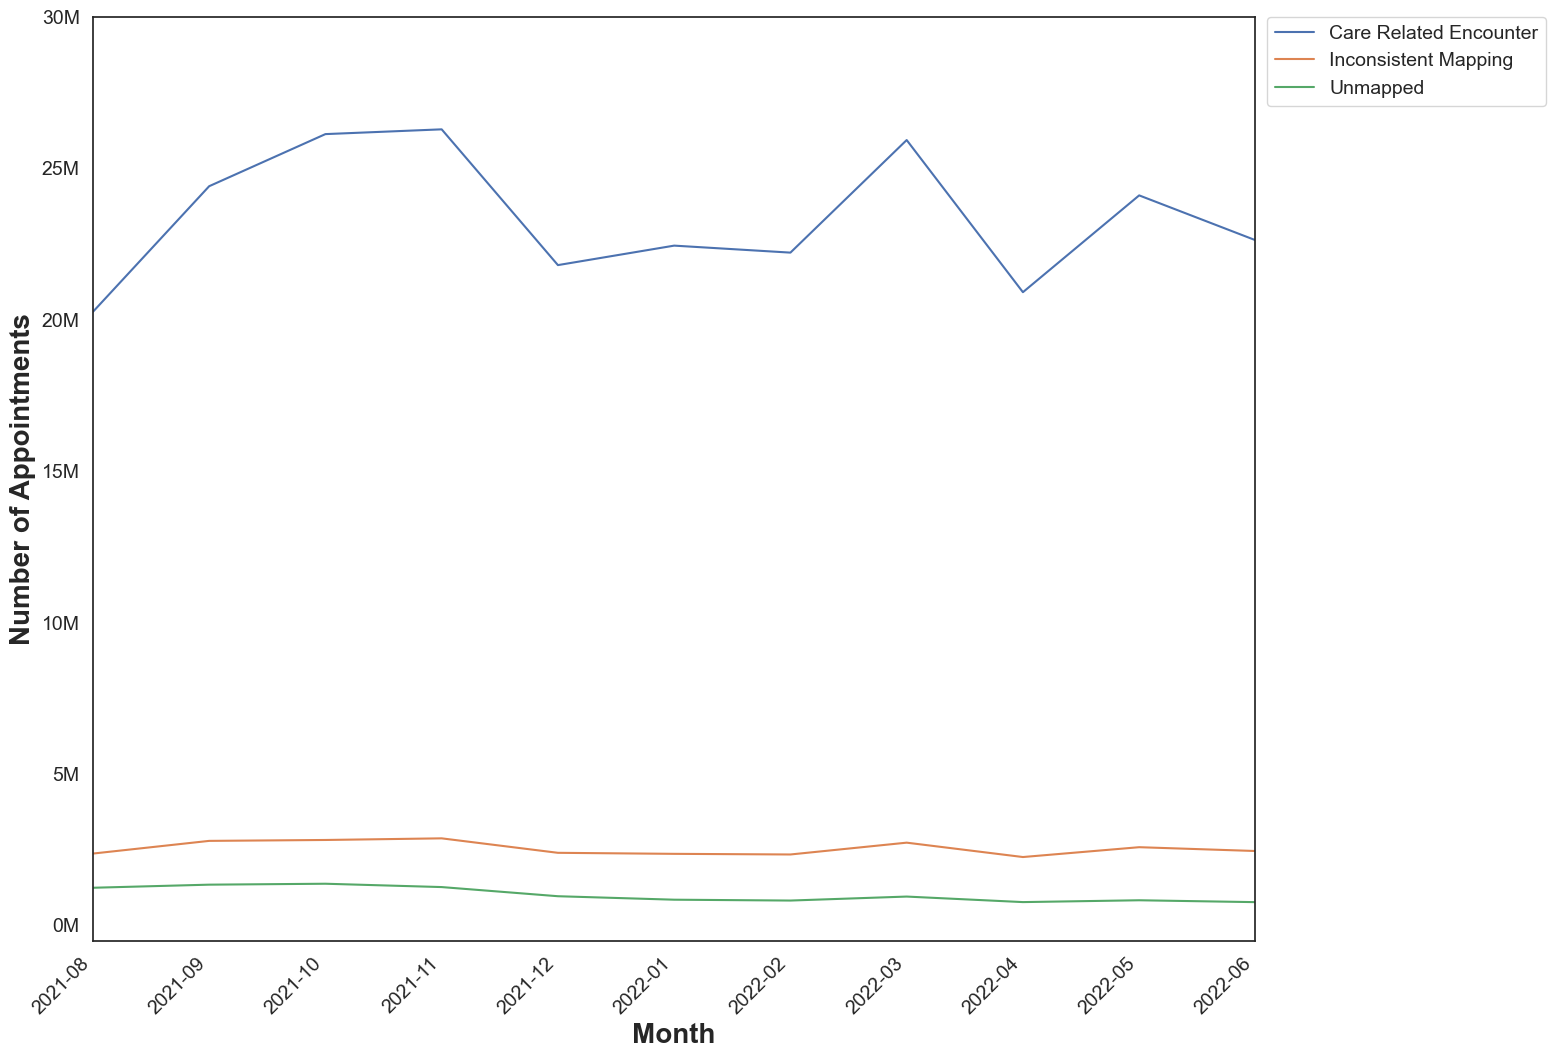

In [45]:
# Plot the appointments over the available date range, and review the context types for months.
# Create a lineplot.
ax1 = sns.lineplot(x = 'appointment_month', y = 'count_of_appointments', hue = 'context_type',
            data = nc_ct, ci = None)
# Reposition legend.
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0, fontsize=14);
# Adjust x axis.
plt.xlabel("Month", weight='bold', size=20);
plt.xlim([nc_ss['appointment_month'].min(), nc_ss['appointment_month'].max()]);
# Adjust y axis
plt.ylabel("Number of Appointments", weight='bold', size=20);
plt.ylim();
# Adjust x ticks.
plt.xticks(fontsize=14, rotation=45, horizontalalignment='right')
# Adjust y ticks.
ytick_positions = range(0, int(3e7)+int(0.5e7), int(0.5e7))
ytick_labels = [f'{int(x/1e6)}M' for x in ytick_positions]
plt.yticks(ytick_positions, ytick_labels, fontsize=14);  # Semicolon to remove extraneous output.

**National categories:**

In [46]:
# Create a separate data set that can be used in future weeks. 
nc_nc = nc.groupby(['appointment_month', 'national_category']).sum('count_of_appointments').reset_index()

# View output.
# Add docstring for clarity.
print("The number of appointments per month, grouped by national category, in chronological order:")
display(nc_nc)

The number of appointments per month, grouped by national category, in chronological order:


appointment_month                                  national_category  \
0             2021-08  Care Home Needs Assessment & Personalised Care...   
1             2021-08                                    Care Home Visit   
2             2021-08                                    Clinical Triage   
3             2021-08                         General Consultation Acute   
4             2021-08                       General Consultation Routine   
..                ...                                                ...   
193           2022-06                         Social Prescribing Service   
194           2022-06                       Structured Medication Review   
195           2022-06                                           Unmapped   
196           2022-06                        Unplanned Clinical Activity   
197           2022-06                                            Walk-in   

     count_of_appointments  
0                    29676  
1                    47583  
2                  3704207  
3                  4280920  
4                  7756045  
..                     ...  
193                  55066  
194                 187800  
195                 758640  
196                 274491  
197                  35935  

[198 rows x 3 columns]

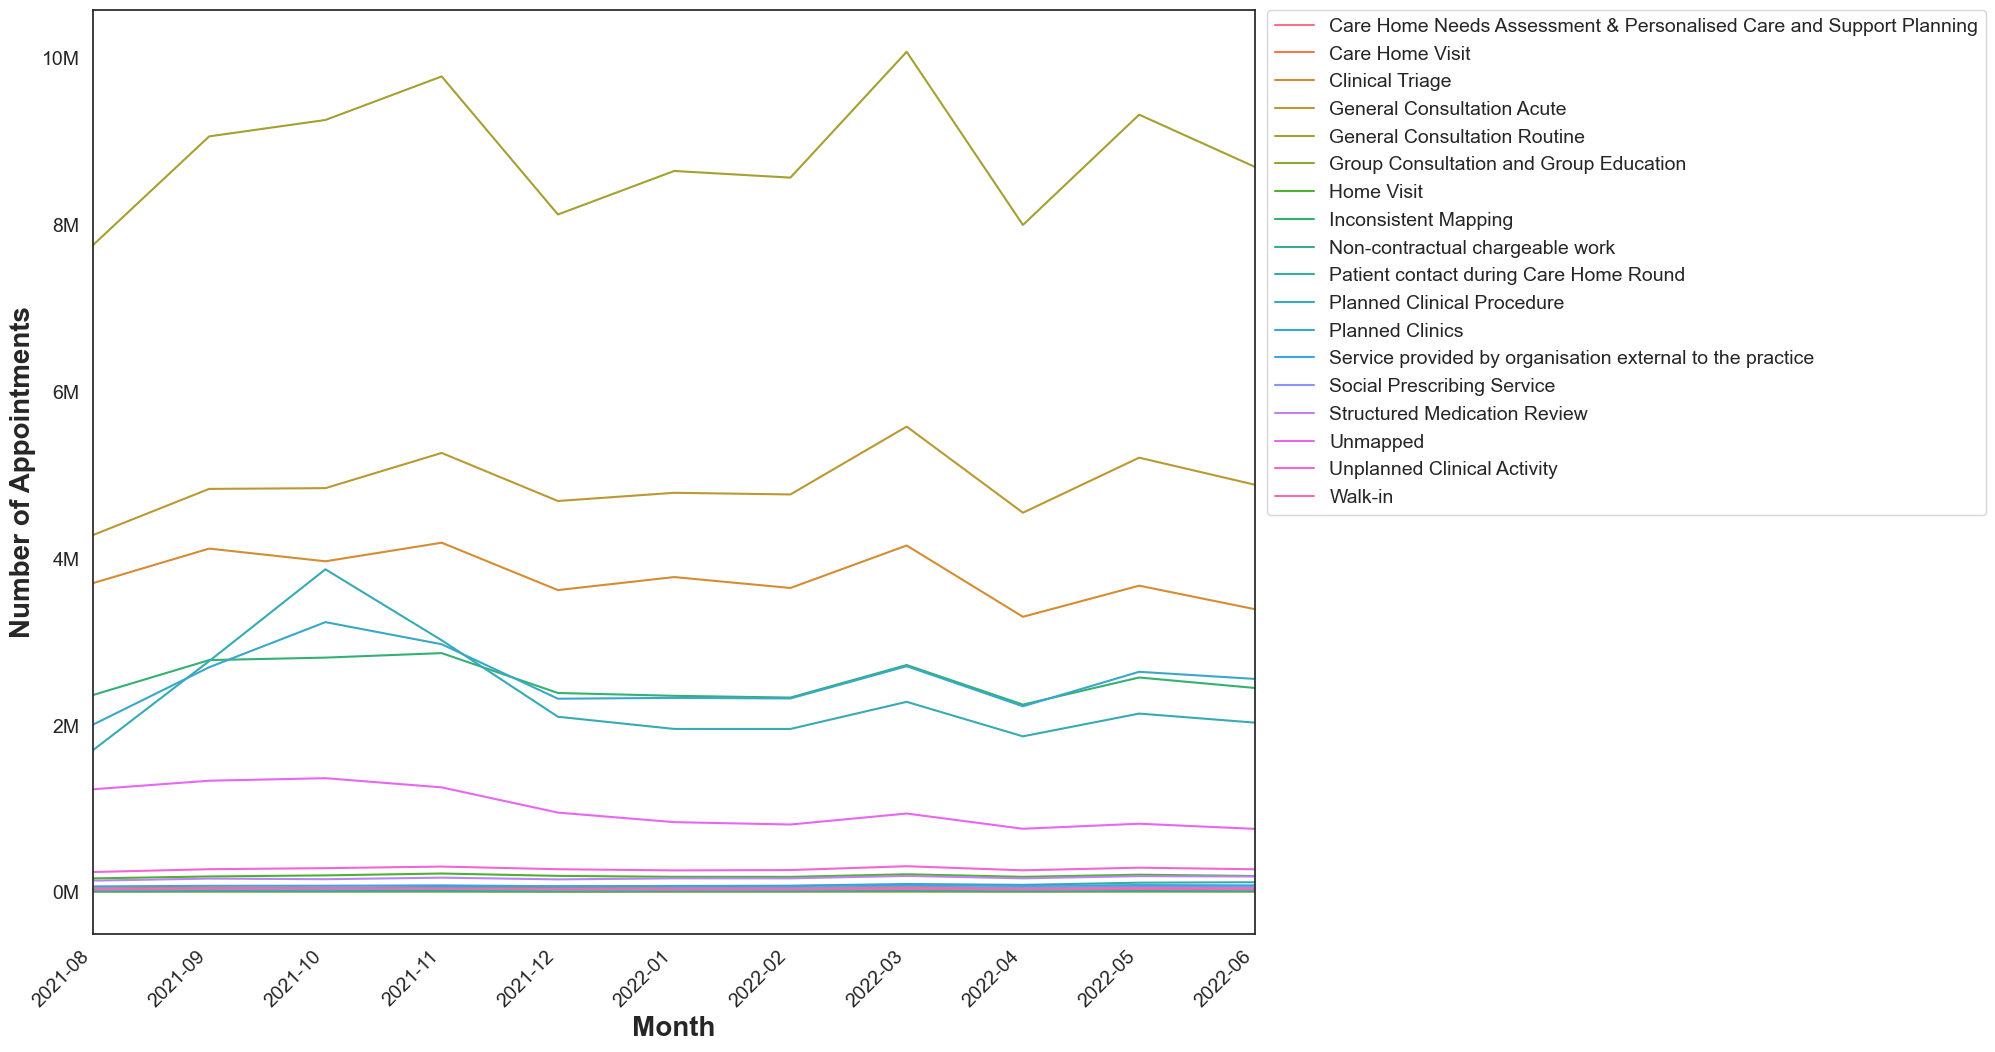

In [47]:
# Plot the appointments over the available date range, and review the national categories for months.
# Create a lineplot.
ax1 = sns.lineplot(x = 'appointment_month', y = 'count_of_appointments', hue = 'national_category',
            data = nc_nc, ci = None)
# Reposition legend.
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0, fontsize=14);
# Adjust x axis.
plt.xlabel("Month", weight='bold', size=20);
plt.xlim([nc_ss['appointment_month'].min(), nc_ss['appointment_month'].max()]);
# Adjust y axis
plt.ylabel("Number of Appointments", weight='bold', size=20);
plt.ylim();
# Adjust x ticks.
plt.xticks(fontsize=14, rotation=45, horizontalalignment='right')
# Adjust y ticks.
ytick_positions = range(0, int(1e7)+int(0.2e7), int(0.2e7))
ytick_labels = [f'{int(x/1e6)}M' for x in ytick_positions]
plt.yticks(ytick_positions, ytick_labels, fontsize=14);  # Semicolon to remove extraneous output.

**Comment:**

> The national categories plot above is far too messy, with too many legend items, severely affecting readability and clarity. For a much cleaner output, it would be beneficial to only show the most important categories, or perhaps, to group together categories that are less relevant to our business objective(s).

### 4.2: Objective 2
Create four visualisations indicating the number of appointments for service setting per season. The seasons are summer (August 2021), autumn (October 2021), winter (January 2022), and spring (April 2022).

**Functions:**

In [48]:
# Define function that calculates the simple moving average (SMA) for a given grouped DataFrame.
def sma_group(df_sma, **kwargs):
    # Initialise list of known length.
    sma = [0]*len(df_sma)
    
    # Provide optional keyword arguments to:
    # 1. Specify grouping (default is None),
    # 2. Specify window size for SMA (default is 7).
    group = kwargs.get('group', None)
    window = kwargs.get('window', 7)
    
    if group is not None:
        # Find number of unique elements in grouping and calculate SMA accordingly.
        ss_count = group.nunique()
        for num in range(ss_count):
            sma[num::ss_count] = df_sma[num::ss_count].rolling(window).mean()
    else:
        # Calculate SMA without grouping.
        sma = df_sma.rolling(window).mean()
    
    # Return output.
    return sma

**Outputs:**

In [49]:
# Create a separate data set that can be used in future weeks. 
nc_ss_day = nc.groupby(['appointment_month', 'appointment_date', 'service_setting']).sum('count_of_appointments').reset_index()

# View output.
# Add docstring for clarity.
print("The number of appointments per month, grouped by service setting, in chronological order:")
display(nc_ss_day)

The number of appointments per month, grouped by service setting, in chronological order:


appointment_month appointment_date            service_setting  \
0              2021-08       2021-08-01  Extended Access Provision   
1              2021-08       2021-08-01           General Practice   
2              2021-08       2021-08-01                      Other   
3              2021-08       2021-08-01       Primary Care Network   
4              2021-08       2021-08-01                   Unmapped   
...                ...              ...                        ...   
1665           2022-06       2022-06-30  Extended Access Provision   
1666           2022-06       2022-06-30           General Practice   
1667           2022-06       2022-06-30                      Other   
1668           2022-06       2022-06-30       Primary Care Network   
1669           2022-06       2022-06-30                   Unmapped   

      count_of_appointments  
0                       438  
1                      3411  
2                       401  
3                       323  
4                      1054  
...                     ...  
1665                   9163  
1666                1124374  
1667                  23115  
1668                  34774  
1669                  35320  

[1670 rows x 4 columns]

In [50]:
# Add a column to the DataFrame that represents the weekly simple moving average (SMA).
nc_ss_day['sma_week'] = sma_group(nc_ss_day['count_of_appointments'], group=nc_ss_day['service_setting'], window=7)

# View output.
# Add docstring for clarity.
print("The number of appointments per month, grouped by service setting, in chronological order:")
display(nc_ss_day)

The number of appointments per month, grouped by service setting, in chronological order:


appointment_month appointment_date            service_setting  \
0              2021-08       2021-08-01  Extended Access Provision   
1              2021-08       2021-08-01           General Practice   
2              2021-08       2021-08-01                      Other   
3              2021-08       2021-08-01       Primary Care Network   
4              2021-08       2021-08-01                   Unmapped   
...                ...              ...                        ...   
1665           2022-06       2022-06-30  Extended Access Provision   
1666           2022-06       2022-06-30           General Practice   
1667           2022-06       2022-06-30                      Other   
1668           2022-06       2022-06-30       Primary Care Network   
1669           2022-06       2022-06-30                   Unmapped   

      count_of_appointments       sma_week  
0                       438            NaN  
1                      3411            NaN  
2                       401            NaN  
3                       323            NaN  
4                      1054            NaN  
...                     ...            ...  
1665                   9163    7436.714286  
1666                1124374  842588.571429  
1667                  23115   17075.571429  
1668                  34774   25101.857143  
1669                  35320   26494.857143  

[1670 rows x 5 columns]

**Summer (August 2021):**

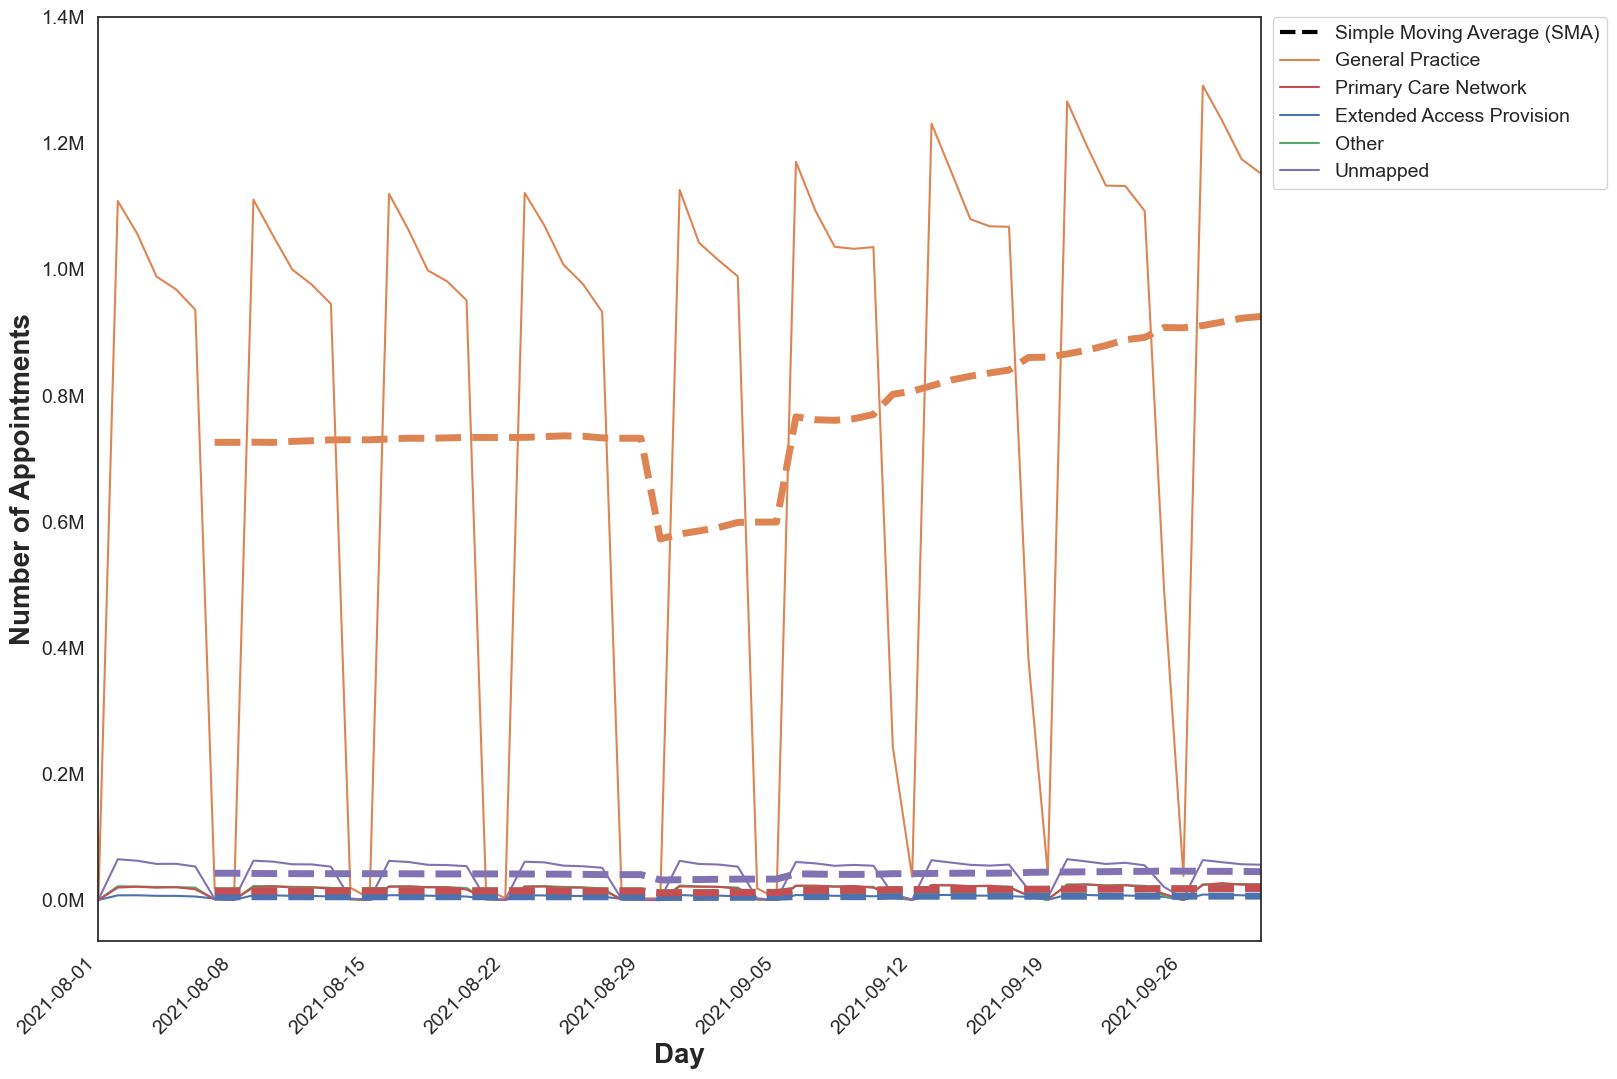

In [51]:
# Look at Summer 2021 (starting August) in more detail to allow a closer look.
# Define relevant variables.
summer_condition = ((nc_ss_day['appointment_month'] >= '2021-08') & 
                    (nc_ss_day['appointment_month'] < '2021-10'))

# Create a lineplot.
ax1 = sns.lineplot(x = 'appointment_date', y = 'count_of_appointments', hue = 'service_setting',
                   data = nc_ss_day[summer_condition], ci = None)
# Create SMA lineplot to show trend.
ax2 = sns.lineplot(x = 'appointment_date', y = 'sma_week', hue = 'service_setting',
                   data = nc_ss_day[summer_condition], ci = None,
                   linewidth=5, linestyle='dashed')
# Create and customise legend.
h, l = ax1.get_legend_handles_labels()
h[5].set_linewidth(3)  # Set SMA handle line width
h[5].set_color('black')  # Set SMA handle color
h[5].set_linestyle('dashed')  # Set SMA handle line style
l[5] = "Simple Moving Average (SMA)"  # Name SMA label
order = [5,1,3,0,2,4]  # Set order of legend
plt.legend([h[0:6][x] for x in order], [l[0:6][x] for x in order], bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0, 
           fontsize=14);
# Adjust x axis.
plt.xlabel("Day", weight='bold', size=20);
plt.xlim([nc_ss_day[summer_condition]['appointment_date'].min(),
          nc_ss_day[summer_condition]['appointment_date'].max()]);
# Adjust y axis
plt.ylabel("Number of Appointments", weight='bold', size=20);
plt.ylim();
# Adjust x ticks.
xtick_positions = pd.date_range(start=nc_ss_day[summer_condition]['appointment_date'].min(),
                               end=nc_ss_day[summer_condition]['appointment_date'].max(),
                               freq='W')
plt.xticks(xtick_positions, fontsize=14, rotation=45, horizontalalignment='right')
# Adjust y ticks.
ytick_positions = range(0, int(1.4e6)+int(0.2e6), int(0.2e6))
ytick_labels = [f'{round(float(x)/1e6, 1)}M' for x in ytick_positions]
plt.yticks(ytick_positions, ytick_labels, fontsize=14);  # Semicolon to remove extraneous output.

# Save figure as .png file for later use.
plt.savefig('summer_SMA.png', dpi=300, bbox_inches='tight');

Removing "General Practice" to better compare the other plots:

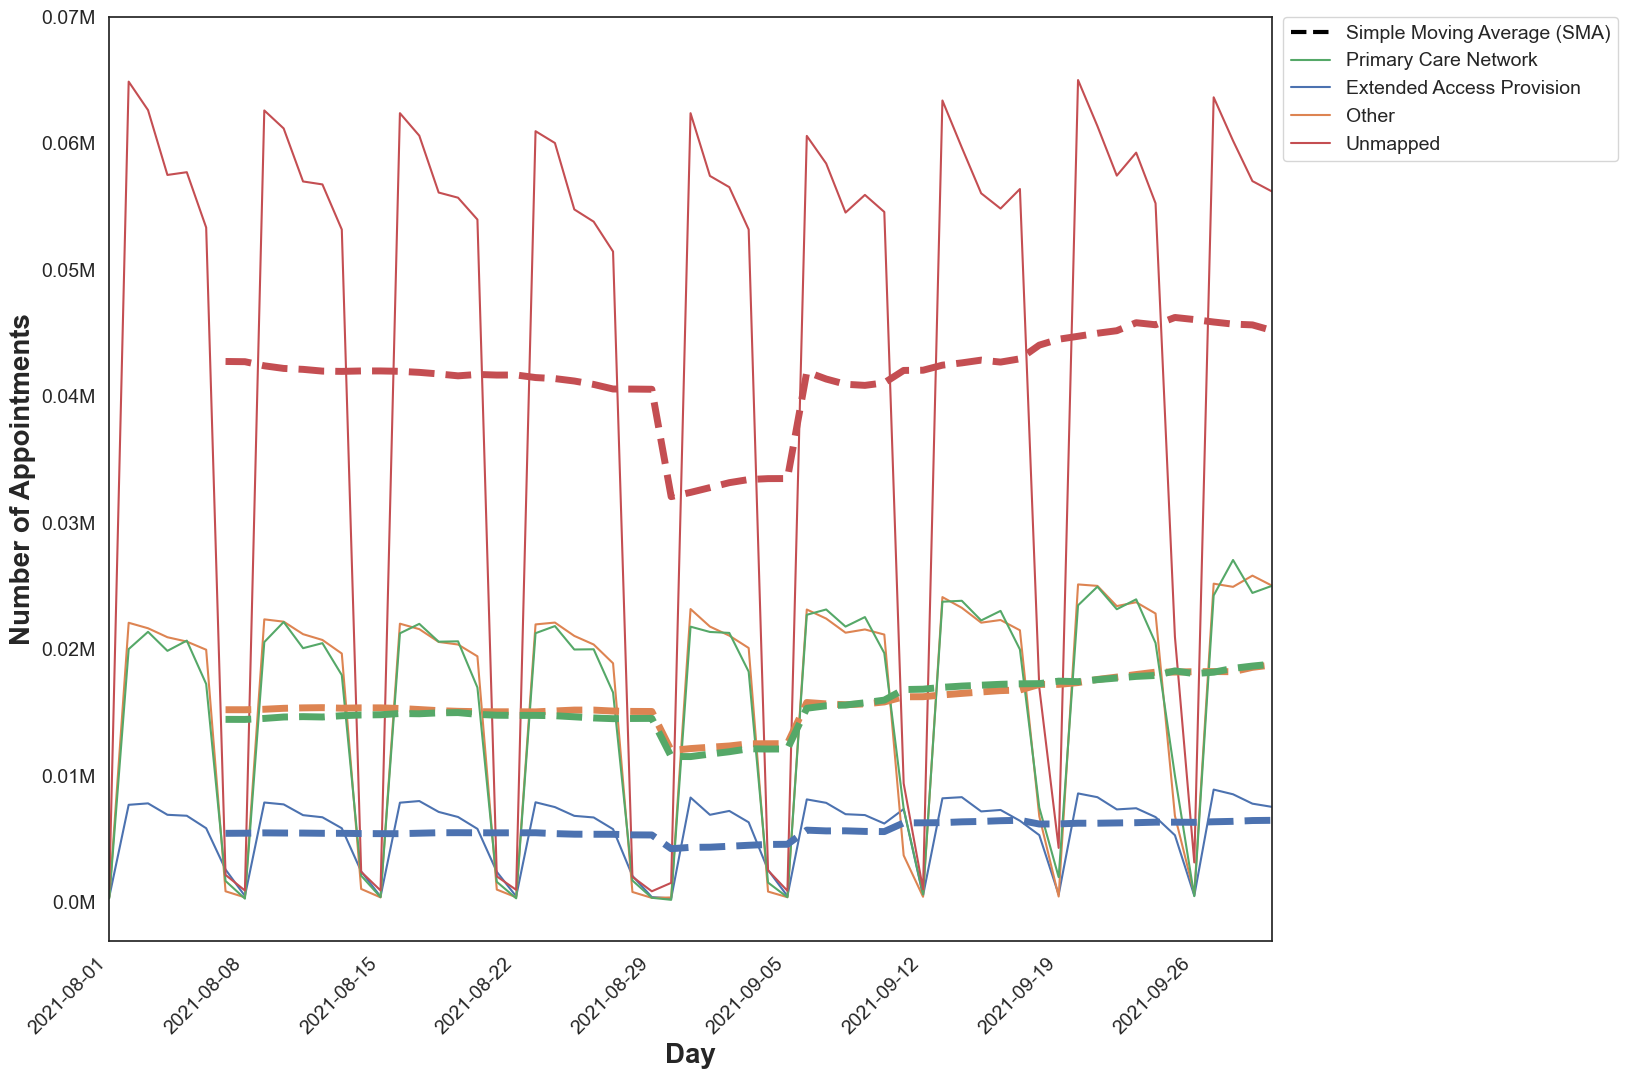

In [52]:
# Look at Summer 2021 (starting August) in more detail to allow a closer look.
# Define relevant variables.
summer_condition = ((nc_ss_day['appointment_month'] >= '2021-08') & 
                    (nc_ss_day['appointment_month'] < '2021-10'))
remove_condition = (nc_ss_day['service_setting'] != 'General Practice')

# Create a lineplot.
ax1 = sns.lineplot(x = 'appointment_date', y = 'count_of_appointments', hue = 'service_setting',
                   data = nc_ss_day[summer_condition][remove_condition], ci = None)
# Create SMA lineplot to show trend.
ax2 = sns.lineplot(x = 'appointment_date', y = 'sma_week', hue = 'service_setting',
                   data = nc_ss_day[summer_condition][remove_condition], ci = None,
                   linewidth=5, linestyle='dashed')
# Create and customise legend.
h, l = ax1.get_legend_handles_labels()
h[4].set_linewidth(3)  # Set SMA handle line width
h[4].set_color('black')  # Set SMA handle color
h[4].set_linestyle('dashed')  # Set SMA handle line style
l[4] = "Simple Moving Average (SMA)"  # Name SMA label
order = [4,2,0,1,3]  # Set order of legend
plt.legend([h[0:5][x] for x in order], [l[0:5][x] for x in order], bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0, 
           fontsize=14);
# Adjust x axis.
plt.xlabel("Day", weight='bold', size=20);
plt.xlim([nc_ss_day[summer_condition][remove_condition]['appointment_date'].min(),
          nc_ss_day[summer_condition][remove_condition]['appointment_date'].max()]);
# Adjust y axis
plt.ylabel("Number of Appointments", weight='bold', size=20);
plt.ylim();
# Adjust x ticks.
xtick_positions = pd.date_range(start=nc_ss_day[summer_condition][remove_condition]['appointment_date'].min(),
                               end=nc_ss_day[summer_condition][remove_condition]['appointment_date'].max(),
                               freq='W')
plt.xticks(xtick_positions, fontsize=14, rotation=45, horizontalalignment='right')
# Adjust y ticks.
ytick_positions = range(0, int(0.07e6)+int(0.01e6), int(0.01e6))
ytick_labels = [f'{round(float(x)/1e6, 2)}M' for x in ytick_positions]
plt.yticks(ytick_positions, ytick_labels, fontsize=14);  # Semicolon to remove extraneous output.

# Save figure as .png file for later use.
plt.savefig('summer_SMA_ex.png', dpi=300, bbox_inches='tight');

**Autumn (October 2021):**

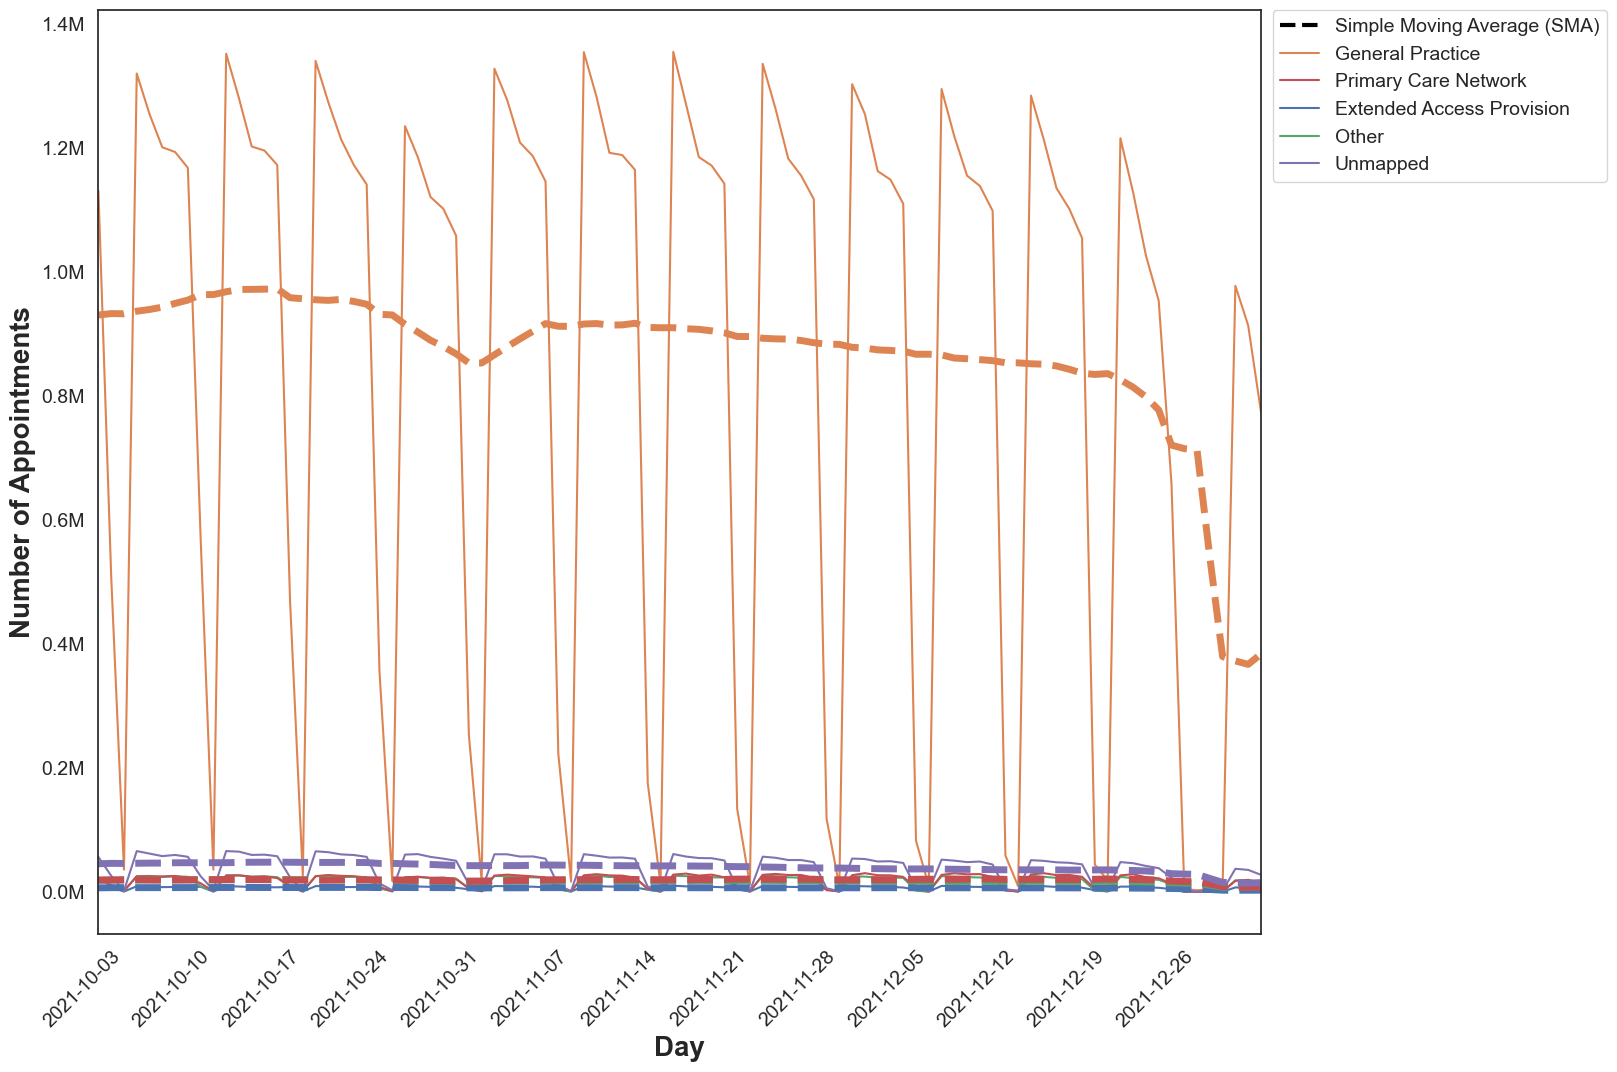

In [53]:
# Look at autumn 2021 (starting October) in more detail to allow a closer look.
# Define relevant variables.
autumn_condition = ((nc_ss_day['appointment_month'] >= '2021-10') 
                    & (nc_ss_day['appointment_month'] < '2022-01'))

# Create a lineplot.
ax1 = sns.lineplot(x = 'appointment_date', y = 'count_of_appointments', hue = 'service_setting',
                   data = nc_ss_day[autumn_condition], ci = None)
# Create SMA lineplot to show trend.
ax2 = sns.lineplot(x = 'appointment_date', y = 'sma_week', hue = 'service_setting',
                   data = nc_ss_day[autumn_condition], ci = None,
                   linewidth=5, linestyle='dashed')
# Create and customise legend.
h, l = ax1.get_legend_handles_labels()
h[5].set_linewidth(3)  # Set SMA handle line width
h[5].set_color('black')  # Set SMA handle color
h[5].set_linestyle('dashed')  # Set SMA handle line style
l[5] = "Simple Moving Average (SMA)"  # Name SMA label
order = [5,1,3,0,2,4]  # Set order of legend
plt.legend([h[0:6][x] for x in order], [l[0:6][x] for x in order], bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0, 
           fontsize=14);
# Adjust x axis.
plt.xlabel("Day", weight='bold', size=20);
plt.xlim([nc_ss_day[autumn_condition]['appointment_date'].min(),
          nc_ss_day[autumn_condition]['appointment_date'].max()]);
# Adjust y axis
plt.ylabel("Number of Appointments", weight='bold', size=20);
plt.ylim();
# Adjust x ticks.
xtick_positions = pd.date_range(start=nc_ss_day[autumn_condition]['appointment_date'].min(),
                               end=nc_ss_day[autumn_condition]['appointment_date'].max(),
                               freq='W')
plt.xticks(xtick_positions, fontsize=14, rotation=45, horizontalalignment='right')
# Adjust y ticks.
ytick_positions = range(0, int(1.4e6)+int(0.2e6), int(0.2e6))
ytick_labels = [f'{round(float(x)/1e6, 1)}M' for x in ytick_positions]
plt.yticks(ytick_positions, ytick_labels, fontsize=14);  # Semicolon to remove extraneous output.

# Save figure as .png file for later use.
plt.savefig('autumn_SMA.png', dpi=300, bbox_inches='tight');

Removing "General Practice" to better compare the other plots:

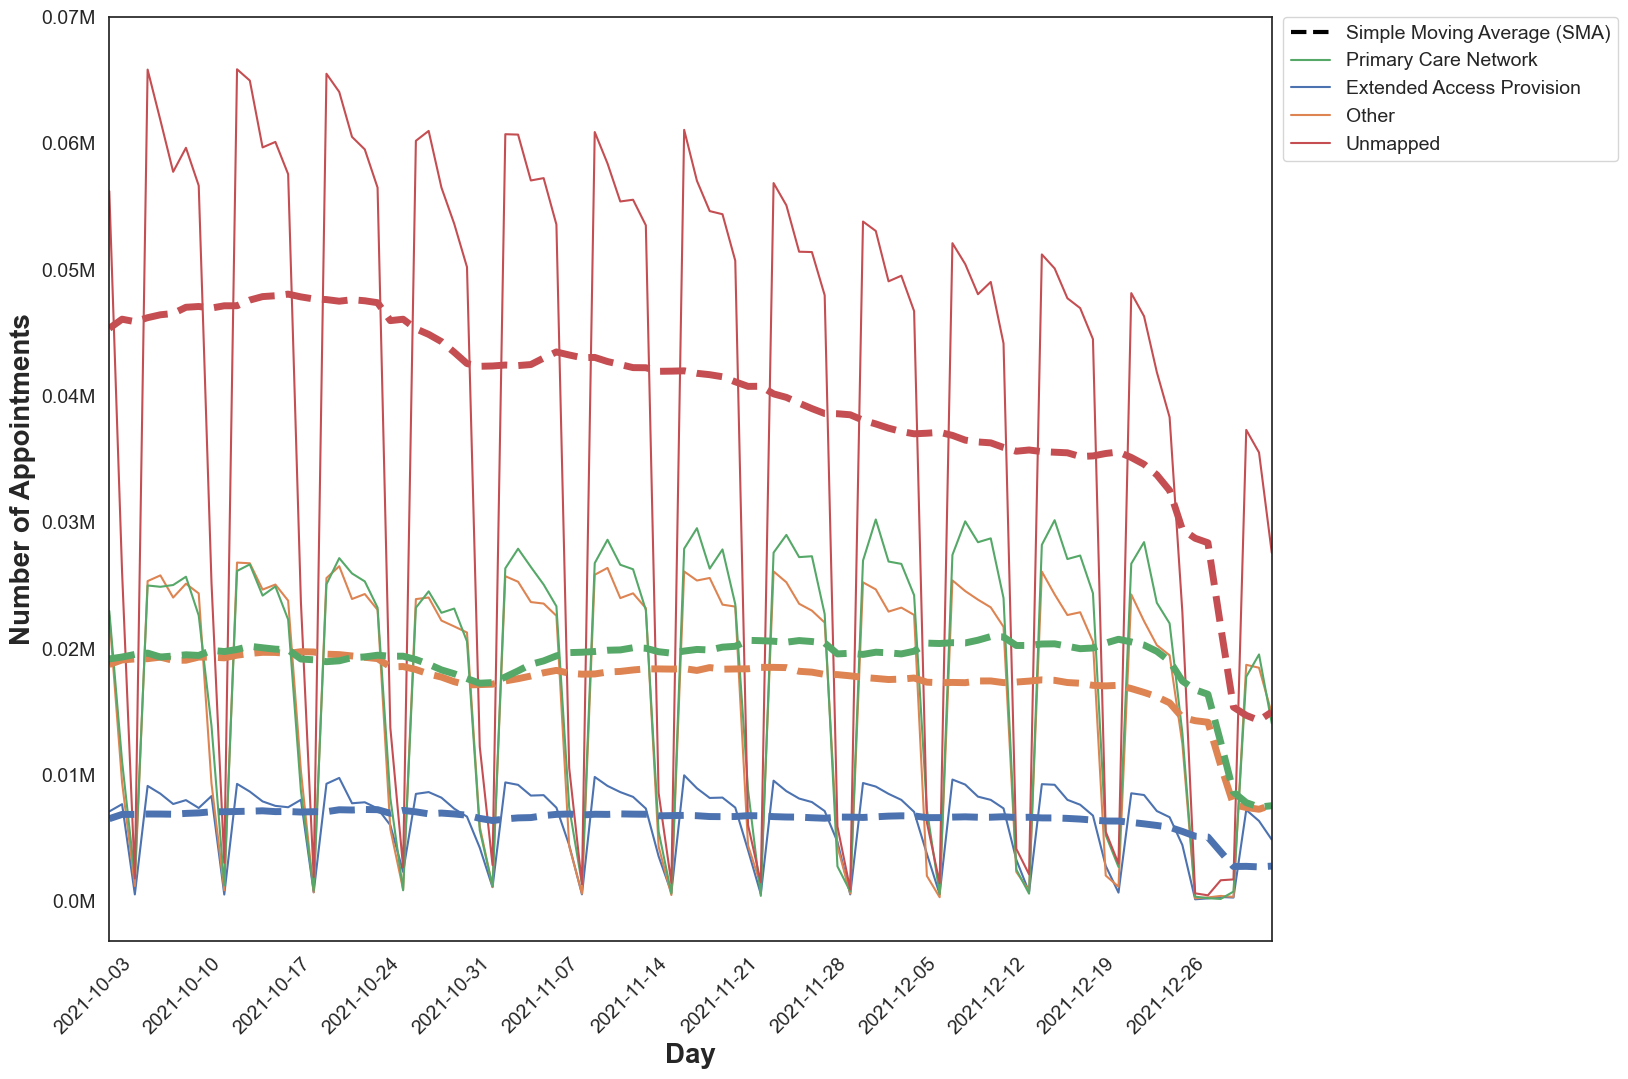

In [54]:
# Look at autumn 2021 (starting October) in more detail to allow a closer look.
# Define relevant variables.
autumn_condition = ((nc_ss_day['appointment_month'] >= '2021-10') 
                    & (nc_ss_day['appointment_month'] < '2022-01'))
remove_condition = (nc_ss_day['service_setting'] != 'General Practice')

# Create a lineplot.
ax1 = sns.lineplot(x = 'appointment_date', y = 'count_of_appointments', hue = 'service_setting',
                   data = nc_ss_day[autumn_condition][remove_condition], ci = None)
# Create SMA lineplot to show trend.
ax2 = sns.lineplot(x = 'appointment_date', y = 'sma_week', hue = 'service_setting',
                   data = nc_ss_day[autumn_condition][remove_condition], ci = None,
                   linewidth=5, linestyle='dashed')
# Create and customise legend.
h, l = ax1.get_legend_handles_labels()
h[4].set_linewidth(3)  # Set SMA handle line width
h[4].set_color('black')  # Set SMA handle color
h[4].set_linestyle('dashed')  # Set SMA handle line style
l[4] = "Simple Moving Average (SMA)"  # Name SMA label
order = [4,2,0,1,3]  # Set order of legend
plt.legend([h[0:5][x] for x in order], [l[0:5][x] for x in order], bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0, 
           fontsize=14);
# Adjust x axis.
plt.xlabel("Day", weight='bold', size=20);
plt.xlim([nc_ss_day[autumn_condition][remove_condition]['appointment_date'].min(),
          nc_ss_day[autumn_condition][remove_condition]['appointment_date'].max()]);
# Adjust y axis
plt.ylabel("Number of Appointments", weight='bold', size=20);
plt.ylim();
# Adjust x ticks.
xtick_positions = pd.date_range(start=nc_ss_day[autumn_condition][remove_condition]['appointment_date'].min(),
                               end=nc_ss_day[autumn_condition][remove_condition]['appointment_date'].max(),
                               freq='W')
plt.xticks(xtick_positions, fontsize=14, rotation=45, horizontalalignment='right')
# Adjust y ticks.
ytick_positions = range(0, int(0.07e6)+int(0.01e6), int(0.01e6))
ytick_labels = [f'{round(float(x)/1e6, 2)}M' for x in ytick_positions]
plt.yticks(ytick_positions, ytick_labels, fontsize=14);  # Semicolon to remove extraneous output.

# Save figure as .png file for later use.
plt.savefig('autumn_SMA_ex.png', dpi=300, bbox_inches='tight');

**Winter (January 2022):**

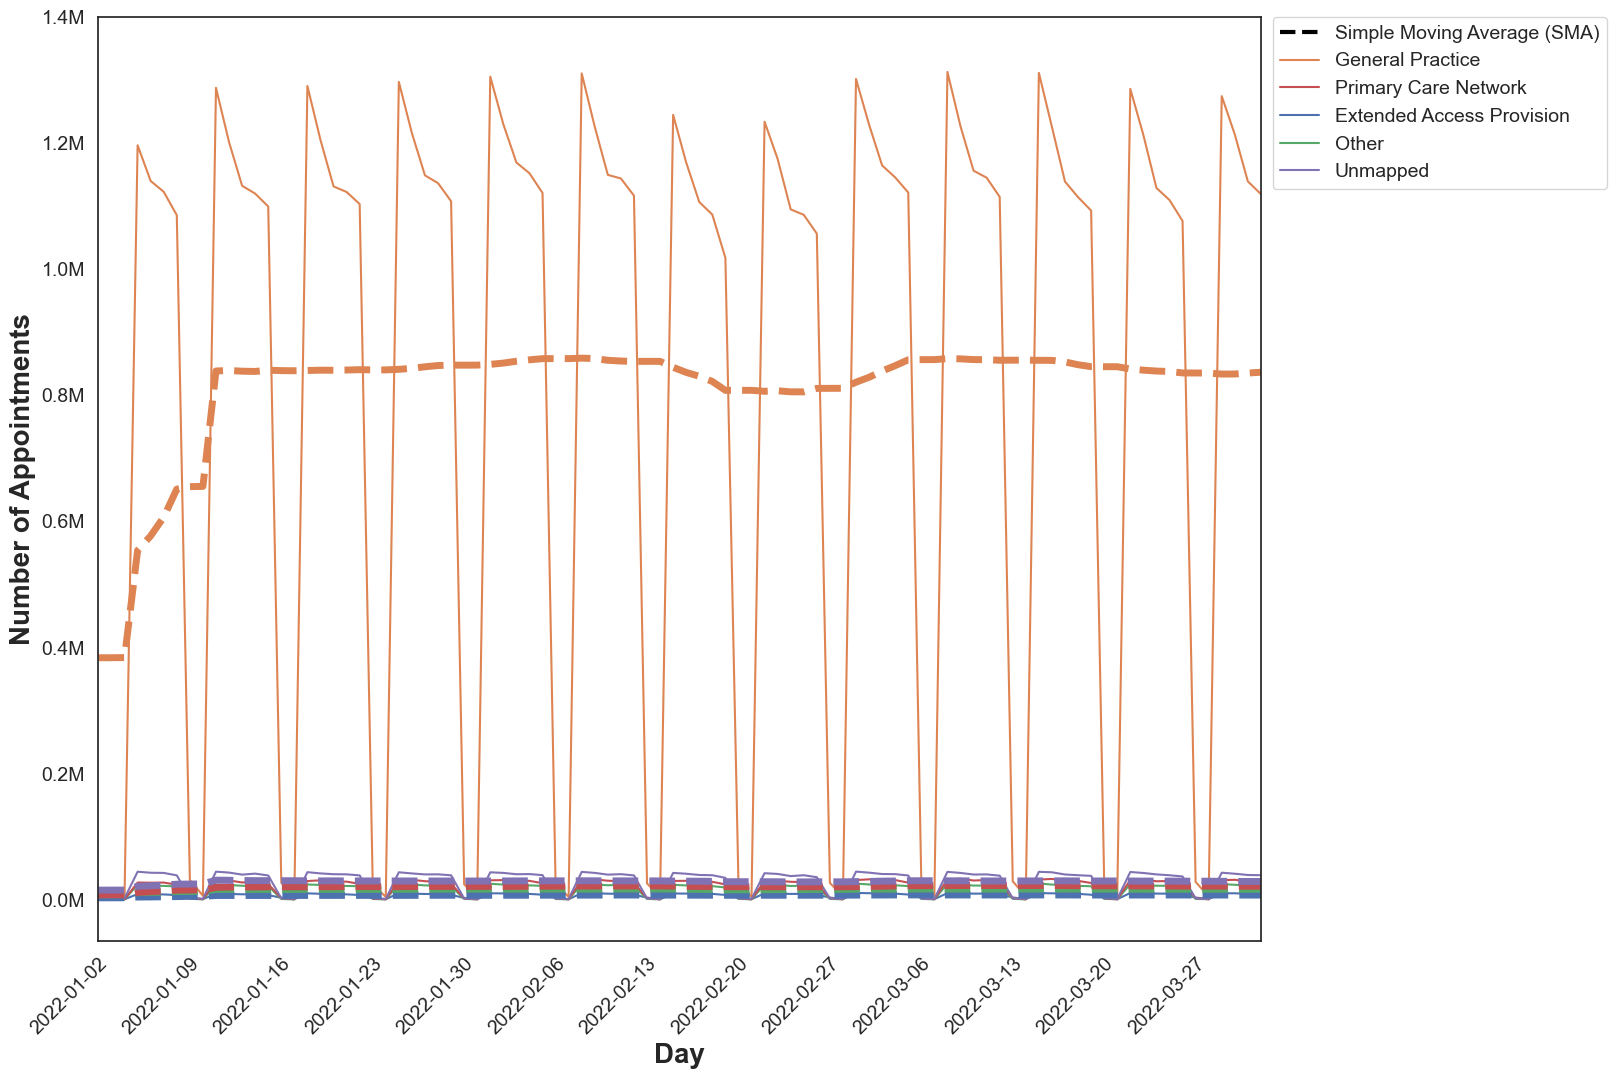

In [55]:
# Look at winter 2022 (starting January) in more detail to allow a closer look.
# Define relevant variables.
winter_condition = ((nc_ss_day['appointment_month'] >= '2022-01') 
                    & (nc_ss_day['appointment_month'] < '2022-04'))

# Create a lineplot.
ax1 = sns.lineplot(x = 'appointment_date', y = 'count_of_appointments', hue = 'service_setting',
                   data = nc_ss_day[winter_condition], ci = None)
# Create SMA lineplot to show trend.
ax2 = sns.lineplot(x = 'appointment_date', y = 'sma_week', hue = 'service_setting',
                   data = nc_ss_day[winter_condition], ci = None,
                   linewidth=5, linestyle='dashed')
# Create and customise legend.
h, l = ax1.get_legend_handles_labels()
h[5].set_linewidth(3)  # Set SMA handle line width
h[5].set_color('black')  # Set SMA handle color
h[5].set_linestyle('dashed')  # Set SMA handle line style
l[5] = "Simple Moving Average (SMA)"  # Name SMA label
order = [5,1,3,0,2,4]  # Set order of legend
plt.legend([h[0:6][x] for x in order], [l[0:6][x] for x in order], bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0, 
           fontsize=14);
# Adjust x axis.
plt.xlabel("Day", weight='bold', size=20);
plt.xlim([nc_ss_day[winter_condition]['appointment_date'].min(),
          nc_ss_day[winter_condition]['appointment_date'].max()]);
# Adjust y axis
plt.ylabel("Number of Appointments", weight='bold', size=20);
plt.ylim();
# Adjust x ticks.
xtick_positions = pd.date_range(start=nc_ss_day[winter_condition]['appointment_date'].min(),
                               end=nc_ss_day[winter_condition]['appointment_date'].max(),
                               freq='W')
plt.xticks(xtick_positions, fontsize=14, rotation=45, horizontalalignment='right')
# Adjust y ticks.
ytick_positions = range(0, int(1.4e6)+int(0.2e6), int(0.2e6))
ytick_labels = [f'{round(float(x)/1e6, 1)}M' for x in ytick_positions]
plt.yticks(ytick_positions, ytick_labels, fontsize=14);  # Semicolon to remove extraneous output.

# Save figure as .png file for later use.
plt.savefig('winter_SMA.png', dpi=300, bbox_inches='tight');

Removing "General Practice" to better compare the other plots:

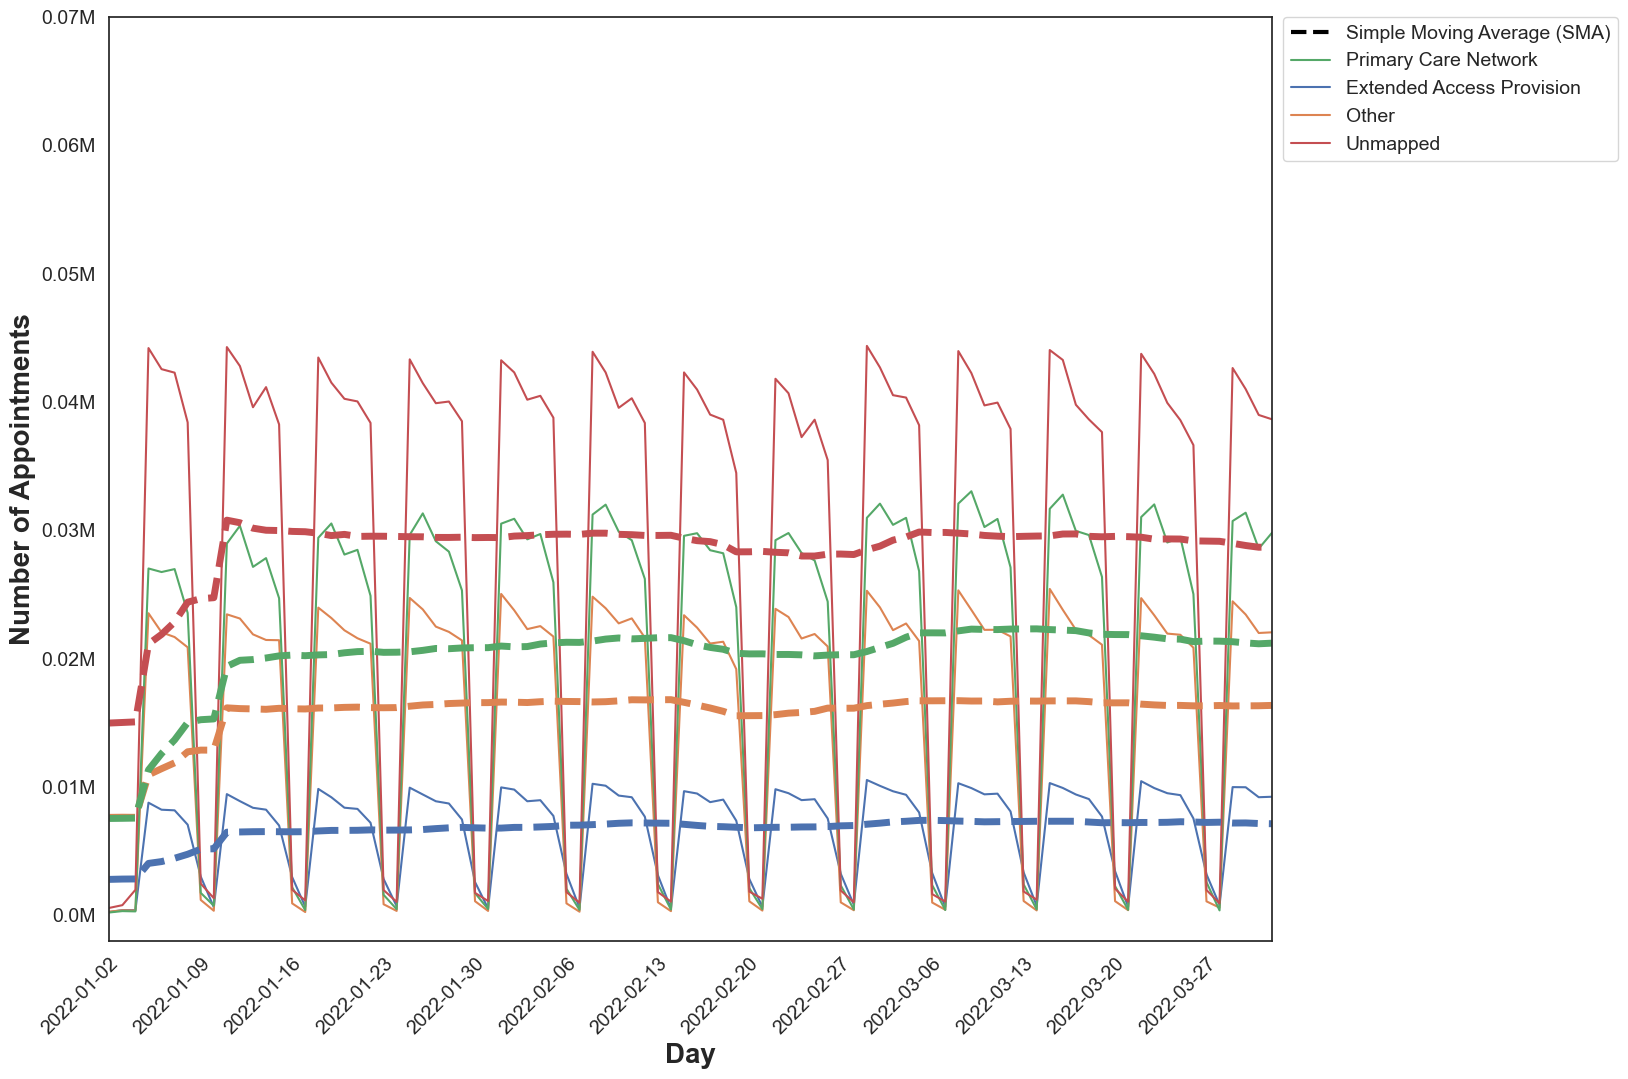

In [56]:
# Look at winter 2022 (starting January) in more detail to allow a closer look.
# Define relevant variables.
winter_condition = ((nc_ss_day['appointment_month'] >= '2022-01') 
                    & (nc_ss_day['appointment_month'] < '2022-04'))
remove_condition = (nc_ss_day['service_setting'] != 'General Practice')

# Create a lineplot.
ax1 = sns.lineplot(x = 'appointment_date', y = 'count_of_appointments', hue = 'service_setting',
                   data = nc_ss_day[winter_condition][remove_condition], ci = None)
# Create SMA lineplot to show trend.
ax2 = sns.lineplot(x = 'appointment_date', y = 'sma_week', hue = 'service_setting',
                   data = nc_ss_day[winter_condition][remove_condition], ci = None,
                   linewidth=5, linestyle='dashed')
# Create and customise legend.
h, l = ax1.get_legend_handles_labels()
h[4].set_linewidth(3)  # Set SMA handle line width
h[4].set_color('black')  # Set SMA handle color
h[4].set_linestyle('dashed')  # Set SMA handle line style
l[4] = "Simple Moving Average (SMA)"  # Name SMA label
order = [4,2,0,1,3]  # Set order of legend
plt.legend([h[0:5][x] for x in order], [l[0:5][x] for x in order], bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0, 
           fontsize=14);
# Adjust x axis.
plt.xlabel("Day", weight='bold', size=20);
plt.xlim([nc_ss_day[winter_condition][remove_condition]['appointment_date'].min(),
          nc_ss_day[winter_condition][remove_condition]['appointment_date'].max()]);
# Adjust y axis
plt.ylabel("Number of Appointments", weight='bold', size=20);
plt.ylim();
# Adjust x ticks.
xtick_positions = pd.date_range(start=nc_ss_day[winter_condition][remove_condition]['appointment_date'].min(),
                               end=nc_ss_day[winter_condition][remove_condition]['appointment_date'].max(),
                               freq='W')
plt.xticks(xtick_positions, fontsize=14, rotation=45, horizontalalignment='right')
# Adjust y ticks.
ytick_positions = range(0, int(0.07e6)+int(0.01e6), int(0.01e6))
ytick_labels = [f'{round(float(x)/1e6, 2)}M' for x in ytick_positions]
plt.yticks(ytick_positions, ytick_labels, fontsize=14);  # Semicolon to remove extraneous output.

# Save figure as .png file for later use.
plt.savefig('winter_SMA_ex.png', dpi=300, bbox_inches='tight');

**Spring (April 2022):**

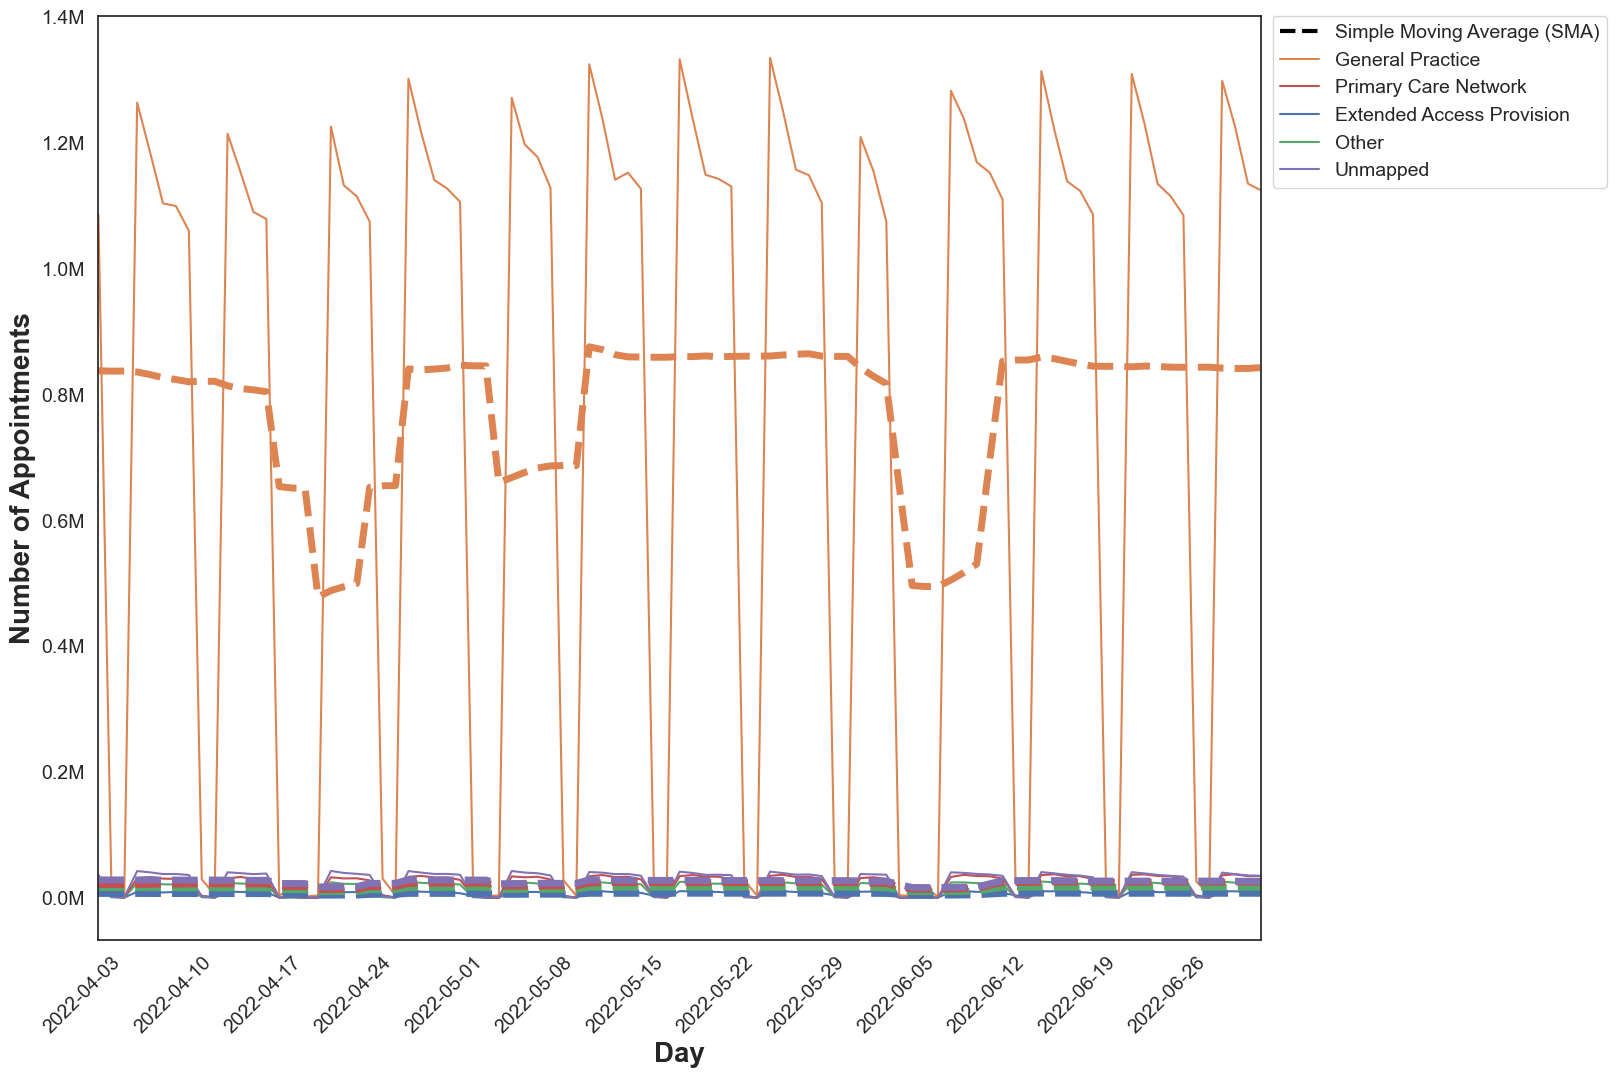

In [57]:
# Look at spring 2022 (starting April) in more detail to allow a closer look.
# Define relevant variables.
spring_condition = ((nc_ss_day['appointment_month'] >= '2022-04') 
                    & (nc_ss_day['appointment_month'] < '2022-07'))

# Create a lineplot.
ax1 = sns.lineplot(x = 'appointment_date', y = 'count_of_appointments', hue = 'service_setting',
                   data = nc_ss_day[spring_condition], ci = None)
# Create SMA lineplot to show trend.
ax2 = sns.lineplot(x = 'appointment_date', y = 'sma_week', hue = 'service_setting',
                   data = nc_ss_day[spring_condition], ci = None,
                   linewidth=5, linestyle='dashed')
# Create and customise legend.
h, l = ax1.get_legend_handles_labels()
h[5].set_linewidth(3)  # Set SMA handle line width
h[5].set_color('black')  # Set SMA handle color
h[5].set_linestyle('dashed')  # Set SMA handle line style
l[5] = "Simple Moving Average (SMA)"  # Name SMA label
order = [5,1,3,0,2,4]  # Set order of legend
plt.legend([h[0:6][x] for x in order], [l[0:6][x] for x in order], bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0, 
           fontsize=14);
# Adjust x axis.
plt.xlabel("Day", weight='bold', size=20);
plt.xlim([nc_ss_day[spring_condition]['appointment_date'].min(),
          nc_ss_day[spring_condition]['appointment_date'].max()]);
# Adjust y axis
plt.ylabel("Number of Appointments", weight='bold', size=20);
plt.ylim();
# Adjust x ticks.
xtick_positions = pd.date_range(start=nc_ss_day[spring_condition]['appointment_date'].min(),
                               end=nc_ss_day[spring_condition]['appointment_date'].max(),
                               freq='W')
plt.xticks(xtick_positions, fontsize=14, rotation=45, horizontalalignment='right')
# Adjust y ticks.
ytick_positions = range(0, int(1.4e6)+int(0.2e6), int(0.2e6))
ytick_labels = [f'{round(float(x)/1e6, 1)}M' for x in ytick_positions]
plt.yticks(ytick_positions, ytick_labels, fontsize=14);  # Semicolon to remove extraneous output.

# Save figure as .png file for later use.
plt.savefig('spring_SMA.png', dpi=300, bbox_inches='tight');

Removing "General Practice" to better compare the other plots:

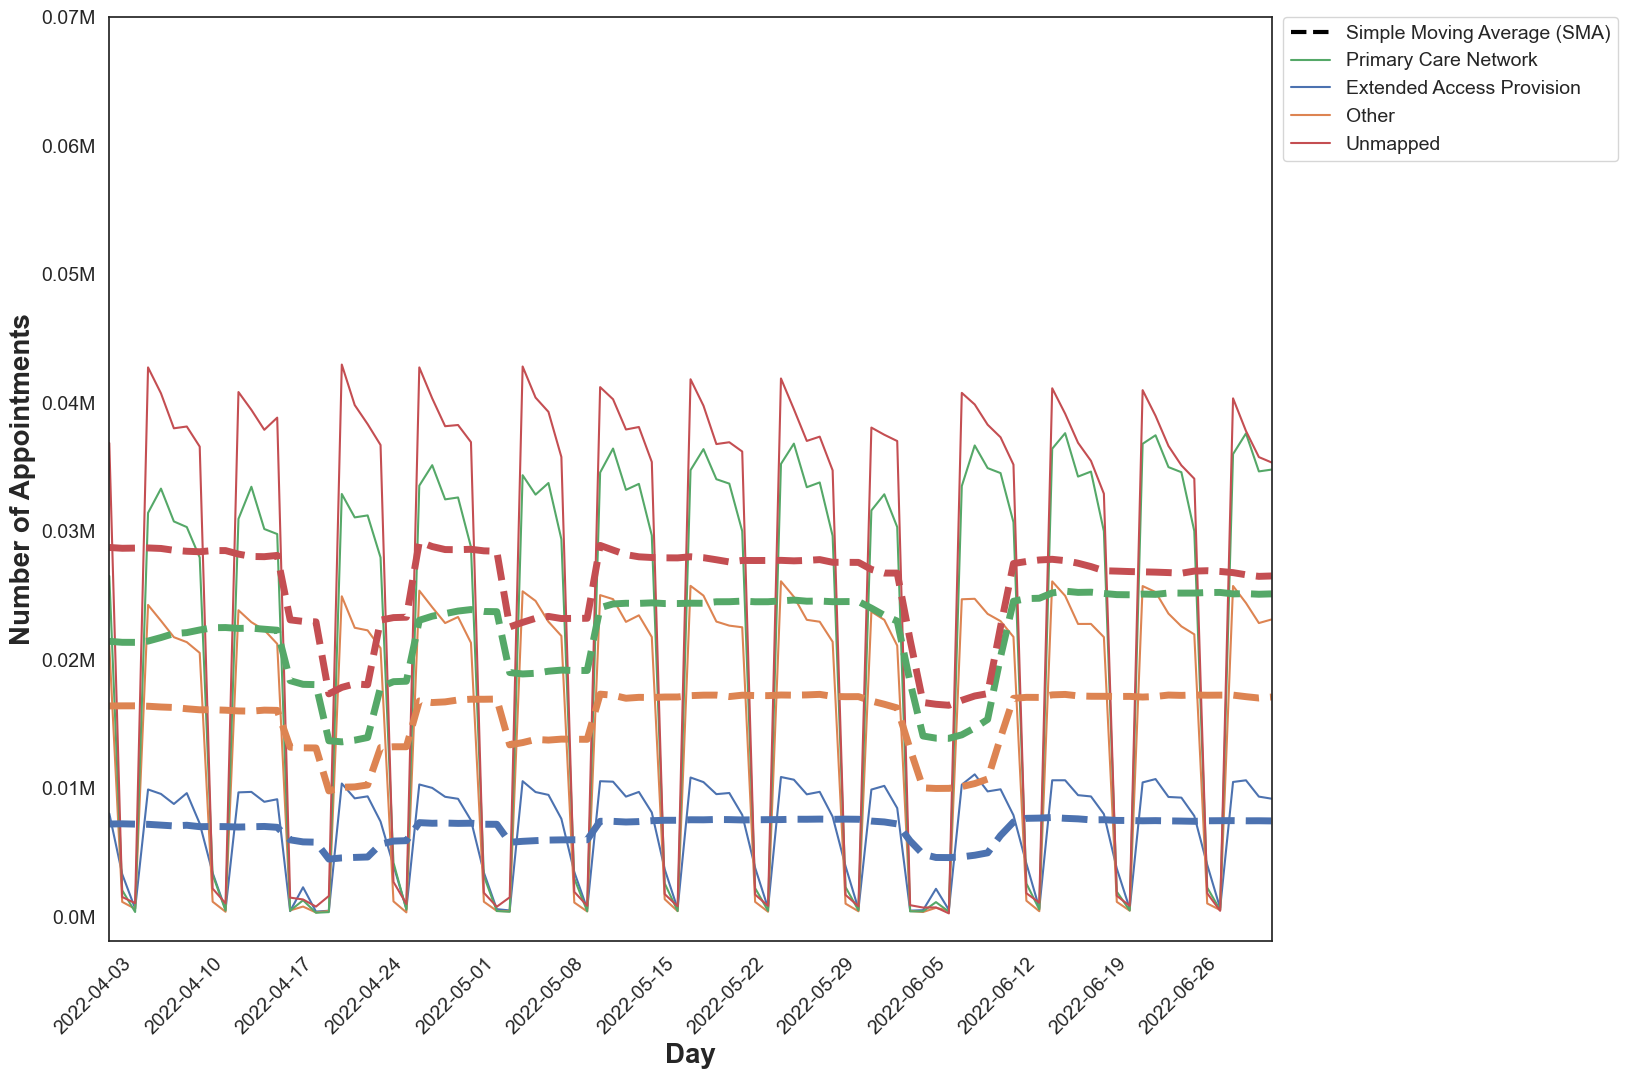

In [58]:
# Look at spring 2022 (starting April) in more detail to allow a closer look.
# Define relevant variables.
spring_condition = ((nc_ss_day['appointment_month'] >= '2022-04') 
                    & (nc_ss_day['appointment_month'] < '2022-07'))
remove_condition = (nc_ss_day['service_setting'] != 'General Practice')

# Create a lineplot.
ax1 = sns.lineplot(x = 'appointment_date', y = 'count_of_appointments', hue = 'service_setting',
                   data = nc_ss_day[spring_condition][remove_condition], ci = None)
# Create SMA lineplot to show trend.
ax2 = sns.lineplot(x = 'appointment_date', y = 'sma_week', hue = 'service_setting',
                   data = nc_ss_day[spring_condition][remove_condition], ci = None,
                   linewidth=5, linestyle='dashed')
# Create and customise legend.
h, l = ax1.get_legend_handles_labels()
h[4].set_linewidth(3)  # Set SMA handle line width
h[4].set_color('black')  # Set SMA handle color
h[4].set_linestyle('dashed')  # Set SMA handle line style
l[4] = "Simple Moving Average (SMA)"  # Name SMA label
order = [4,2,0,1,3]  # Set order of legend
plt.legend([h[0:5][x] for x in order], [l[0:5][x] for x in order], bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0, 
           fontsize=14);
# Adjust x axis.
plt.xlabel("Day", weight='bold', size=20);
plt.xlim([nc_ss_day[spring_condition][remove_condition]['appointment_date'].min(),
          nc_ss_day[spring_condition][remove_condition]['appointment_date'].max()]);
# Adjust y axis
plt.ylabel("Number of Appointments", weight='bold', size=20);
plt.ylim();
# Adjust x ticks.
xtick_positions = pd.date_range(start=nc_ss_day[spring_condition][remove_condition]['appointment_date'].min(),
                               end=nc_ss_day[spring_condition][remove_condition]['appointment_date'].max(),
                               freq='W')
plt.xticks(xtick_positions, fontsize=14, rotation=45, horizontalalignment='right')
# Adjust y ticks.
ytick_positions = range(0, int(0.07e6)+int(0.01e6), int(0.01e6))
ytick_labels = [f'{round(float(x)/1e6, 2)}M' for x in ytick_positions]
plt.yticks(ytick_positions, ytick_labels, fontsize=14);  # Semicolon to remove extraneous output.

# Save figure as .png file for later use.
plt.savefig('spring_SMA_ex.png', dpi=300, bbox_inches='tight');

### 4.2: Additional Plot

In [59]:
# Aggregrate on daily level and sort in chronological order (without grouping into service settings).
nc_day = nc.groupby(['appointment_month', 'appointment_date']).sum('count_of_appointments').reset_index()

# View output.
# Add docstring for clarity.
print("The number of appointments per month, grouped by service setting, in chronological order:")
display(nc_day)

The number of appointments per month, grouped by service setting, in chronological order:


appointment_month appointment_date  count_of_appointments
0             2021-08       2021-08-01                   5627
1             2021-08       2021-08-02                1222768
2             2021-08       2021-08-03                1169920
3             2021-08       2021-08-04                1093532
4             2021-08       2021-08-05                1074043
..                ...              ...                    ...
329           2022-06       2022-06-26                   6574
330           2022-06       2022-06-27                1410883
331           2022-06       2022-06-28                1335598
332           2022-06       2022-06-29                1237258
333           2022-06       2022-06-30                1226746

[334 rows x 3 columns]

In [60]:
# Add a column to the DataFrame that represents the weekly simple moving average (SMA).
nc_day['sma_week'] = sma_group(nc_day['count_of_appointments'], window=7)

# View output.
# Add docstring for clarity.
print("The number of appointments per month, grouped by service setting, in chronological order:")
display(nc_day)

The number of appointments per month, grouped by service setting, in chronological order:


appointment_month appointment_date  count_of_appointments       sma_week
0             2021-08       2021-08-01                   5627            NaN
1             2021-08       2021-08-02                1222768            NaN
2             2021-08       2021-08-03                1169920            NaN
3             2021-08       2021-08-04                1093532            NaN
4             2021-08       2021-08-05                1074043            NaN
..                ...              ...                    ...            ...
329           2022-06       2022-06-26                   6574  920073.571429
330           2022-06       2022-06-27                1410883  918334.000000
331           2022-06       2022-06-28                1335598  917513.571429
332           2022-06       2022-06-29                1237258  917258.142857
333           2022-06       2022-06-30                1226746  918697.571429

[334 rows x 4 columns]

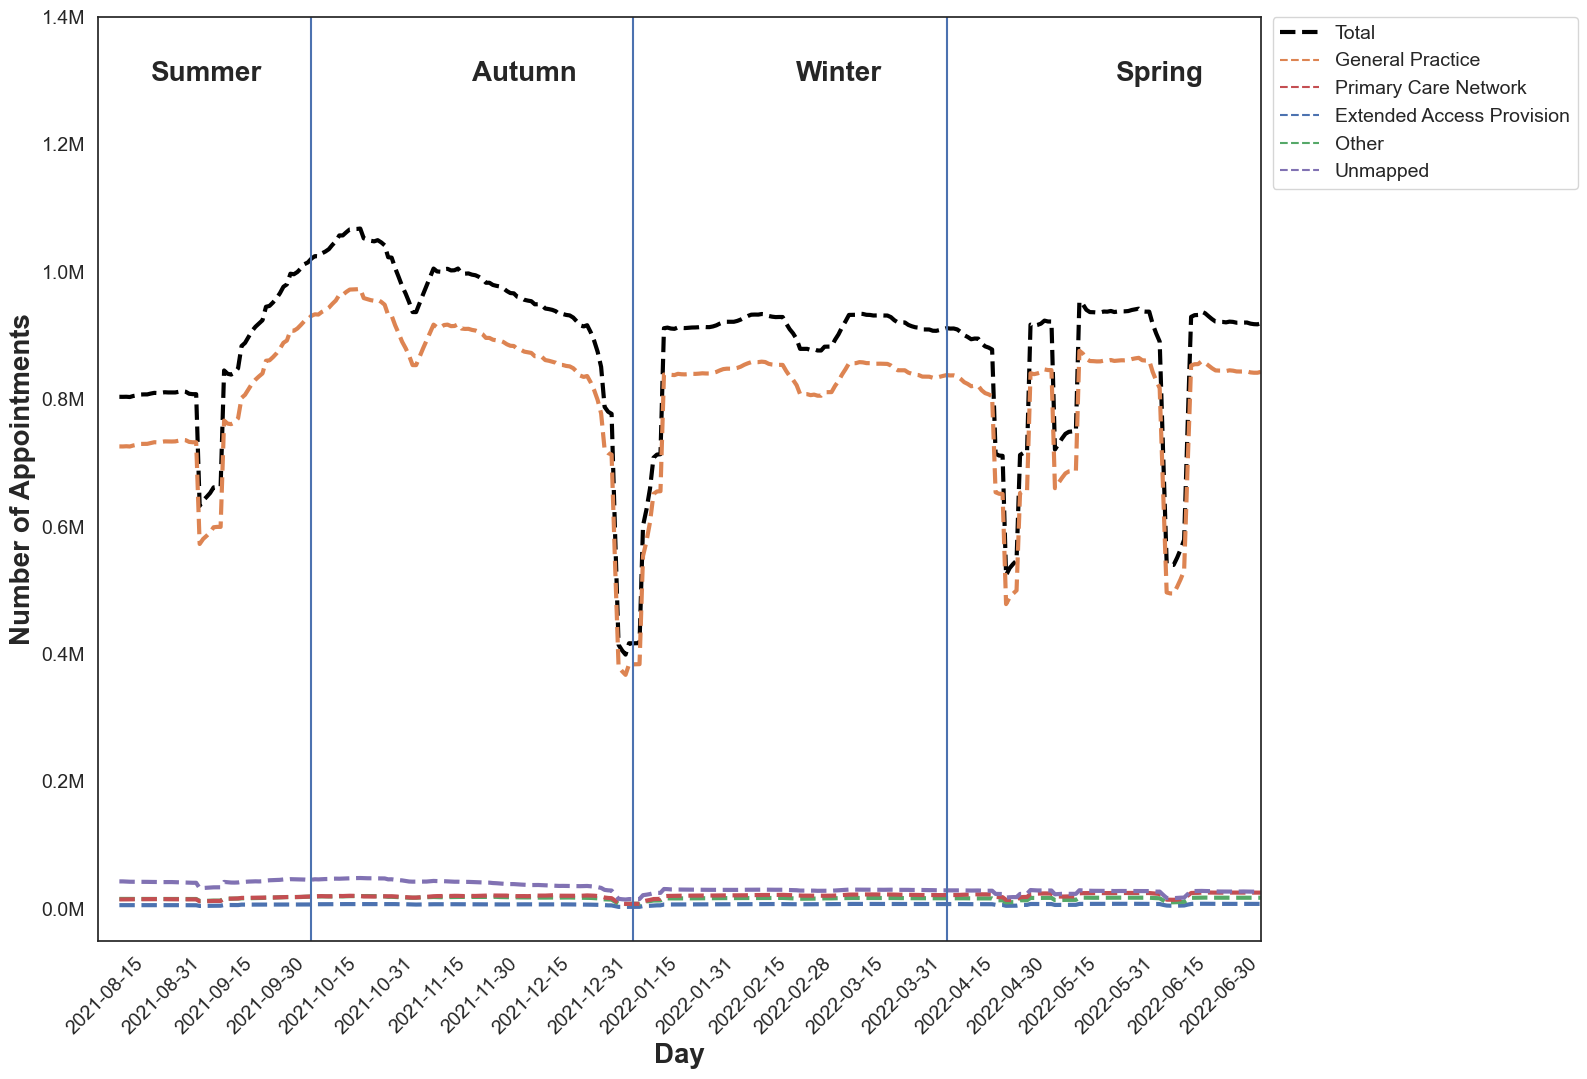

In [61]:
# Look at all seasons (starting August 2021) to provide a broad overview.

# Create SMA lineplot to show trend for total number.
ax1 = sns.lineplot(x = 'appointment_date', y = 'sma_week',
                   data = nc_day, ci = None,
                   linewidth=3, linestyle='dashed',
                   label='Total')
# Create SMA lineplot to show trend for service settings.
ax2 = sns.lineplot(x = 'appointment_date', y = 'sma_week', hue = 'service_setting',
                   data = nc_ss_day, ci = None,
                   linewidth=3, linestyle='dashed')
# Add vertical lines to indicate the seasons.
ax1.axvline(x = pd.to_datetime('2021-10-01'),    # Line on datetime
           ymin = 0, # Bottom of the plot
           ymax = 1) # Top of the plot
ax1.axvline(x = pd.to_datetime('2022-01-01'),    # Line on datetime
           ymin = 0, # Bottom of the plot
           ymax = 1) # Top of the plot
ax1.axvline(x = pd.to_datetime('2022-04-01'),    # Line on datetime
           ymin = 0, # Bottom of the plot
           ymax = 1) # Top of the plot
# Add seasonal annotations.
ax1.annotate('Summer', xy=(pd.to_datetime('2021-09-01'),int(1.3e6)),
            horizontalalignment='center', fontsize=20, weight='bold')
ax1.annotate('Autumn', xy=(pd.to_datetime('2021-12-01'),int(1.3e6)),
            horizontalalignment='center', fontsize=20, weight='bold')
ax1.annotate('Winter', xy=(pd.to_datetime('2022-03-01'),int(1.3e6)),
            horizontalalignment='center', fontsize=20, weight='bold')
ax1.annotate('Spring', xy=(pd.to_datetime('2022-06-01'),int(1.3e6)),
            horizontalalignment='center', fontsize=20, weight='bold')
# Create and customise legend.
h, l = ax1.get_legend_handles_labels()
h[0].set_linewidth(3)  # Set SMA handle line width
h[0].set_color('black')  # Set SMA handle color
[h[x].set_linestyle('dashed') for x in range(len(h))]  # Set SMA handle line style
order = [0,2,4,1,3,5]  # Set order of legend
plt.legend([h[x] for x in order], [l[x] for x in order], bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0, 
           fontsize=14);
# Adjust x axis.
plt.xlabel("Day", weight='bold', size=20);
plt.xlim([nc_day['appointment_date'].min(),
          nc_day['appointment_date'].max()]);
# Adjust y axis
plt.ylabel("Number of Appointments", weight='bold', size=20);
plt.ylim();
# Adjust x ticks.
xtick_positions = pd.date_range(start=nc_day['appointment_date'].min(),
                               end=nc_day['appointment_date'].max(),
                               freq='SM')
plt.xticks(xtick_positions, fontsize=14, rotation=45, horizontalalignment='right')
# Adjust y ticks.
ytick_positions = range(0, int(1.4e6)+int(0.2e6), int(0.2e6))
ytick_labels = [f'{round(float(x)/1e6, 1)}M' for x in ytick_positions]
plt.yticks(ytick_positions, ytick_labels, fontsize=14);  # Semicolon to remove extraneous output.

# Save figure as .png file for later use.
plt.savefig('seasonal_SMA.png', dpi=300, bbox_inches='tight');

Removing "General Practice" to better compare the other plots:

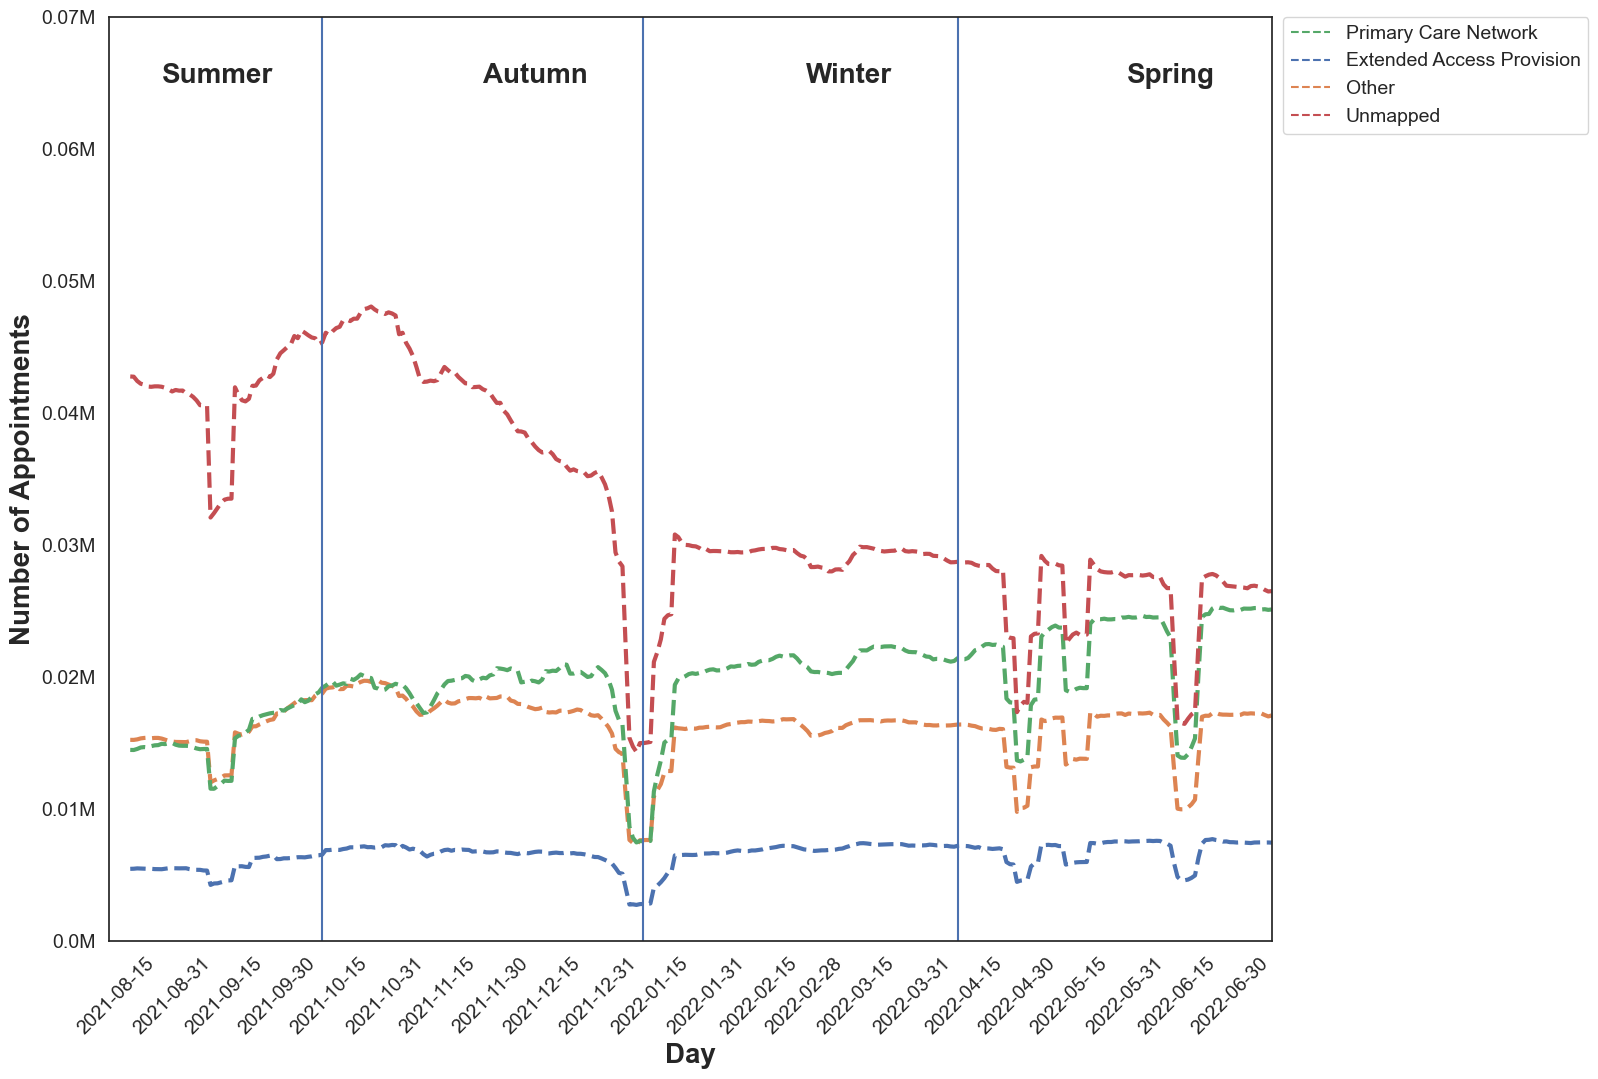

In [62]:
# Look at all seasons (starting August 2021), excluding general practice, to provide a broad overview.
# Define relevant variables.
remove_condition = (nc_ss_day['service_setting'] != 'General Practice')

# Create SMA lineplot to show trend for service settings.
ax1 = sns.lineplot(x = 'appointment_date', y = 'sma_week', hue = 'service_setting',
                   data = nc_ss_day[remove_condition], ci = None,
                   linewidth=3, linestyle='dashed')
# Add vertical lines to indicate the seasons.
ax1.axvline(x = pd.to_datetime('2021-10-01'),    # Line on datetime
           ymin = 0, # Bottom of the plot
           ymax = 1) # Top of the plot
ax1.axvline(x = pd.to_datetime('2022-01-01'),    # Line on datetime
           ymin = 0, # Bottom of the plot
           ymax = 1) # Top of the plot
ax1.axvline(x = pd.to_datetime('2022-04-01'),    # Line on datetime
           ymin = 0, # Bottom of the plot
           ymax = 1) # Top of the plot
# Add seasonal annotations.
ax1.annotate('Summer', xy=(pd.to_datetime('2021-09-01'),int(0.065e6)),
            horizontalalignment='center', fontsize=20, weight='bold')
ax1.annotate('Autumn', xy=(pd.to_datetime('2021-12-01'),int(0.065e6)),
            horizontalalignment='center', fontsize=20, weight='bold')
ax1.annotate('Winter', xy=(pd.to_datetime('2022-03-01'),int(0.065e6)),
            horizontalalignment='center', fontsize=20, weight='bold')
ax1.annotate('Spring', xy=(pd.to_datetime('2022-06-01'),int(0.065e6)),
            horizontalalignment='center', fontsize=20, weight='bold')
# Create and customise legend.
h, l = ax1.get_legend_handles_labels()
[h[x].set_linestyle('dashed') for x in range(len(h))]  # Set SMA handle line style.
order = [2,0,1,3]  # Set order of legend
plt.legend([h[x] for x in order], [l[x] for x in order], bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0, 
           fontsize=14);
# Adjust x axis.
plt.xlabel("Day", weight='bold', size=20);
plt.xlim([nc_day['appointment_date'].min(),
          nc_day['appointment_date'].max()]);
# Adjust y axis
plt.ylabel("Number of Appointments", weight='bold', size=20);
plt.ylim();
# Adjust x ticks.
xtick_positions = pd.date_range(start=nc_day['appointment_date'].min(),
                               end=nc_day['appointment_date'].max(),
                               freq='SM')
plt.xticks(xtick_positions, fontsize=14, rotation=45, horizontalalignment='right')
# Adjust y ticks.
ytick_positions = range(0, int(0.07e6)+int(0.01e6), int(0.01e6))
ytick_labels = [f'{round(float(x)/1e6, 2)}M' for x in ytick_positions]
plt.yticks(ytick_positions, ytick_labels, fontsize=14);  # Semicolon to remove extraneous output.

# Save figure as .png file for later use.
plt.savefig('seasonal_SMA_ex.png', dpi=300, bbox_inches='tight');

**Comment:**

> The seasonal plots above follow a very distinctive up-and-down trend on a weekly basis. I strongly suspect that this because of the weekends reveiving far fewer appointments than weekdays. For this reason, it would be beneficial to either add trend lines, or exclude weekends from the plot. I have chosen to add trend lines in the form of simple moving averages (SMAs), as they shine in this situation where cyclic behaviour is present (the cycle being every 7 days in this case).

> One very interesting thing to note is that there is a sharp decline in the number of appointments towards the end of autumn and beginning of winter. This would be good to explore further in a bigger analysis.

# 

# Assignment activity 5

### Analyse tweets from Twitter with hashtags related to healthcare in the UK.

Previously imported libraries and settings, plus one new one:

In [63]:
# Libraries and settings needed for analysis
import pandas as pd
import seaborn as sns

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Maximum column width to display
pd.options.display.max_colwidth = 200

### 5.1: Importing and sense checking the data

In [64]:
# Load the data set.
tweets = pd.read_csv('tweets.csv')

# View the DataFrame by:
# 1. Checking the shape,
# 2. Checking the data types,
# 3. Checking the first five rows,
# 4. Checking the last five rows.
display(tweets.shape)
display(tweets.dtypes)
display(tweets.head())
display(tweets.tail())

(1174, 10)

tweet_id                    int64
tweet_full_text            object
tweet_entities             object
tweet_entities_hashtags    object
tweet_metadata             object
tweet_retweet_count         int64
tweet_favorite_count        int64
tweet_favorited              bool
tweet_retweeted              bool
tweet_lang                 object
dtype: object

tweet_id  \
0  1567629223795527681   
1  1567582846612553728   
2  1567582787070304256   
3  1567582767625428992   
4  1567582720460570625   

                                                                                                                                                                                           tweet_full_text  \
0  As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...   
1                                                              RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed.  We're #hiring for…   
2                                                           RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…   
3                                                             RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…   
4  ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...   

                                                                                                                                                                                            tweet_entities  \
0  {'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...   
1  {'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...   
2  {'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...   
3  {'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices':...   
4  {'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices'...   

                                                              tweet_entities_hashtags  \
0                                                                         #Healthcare   
1                                                             #PremiseHealth, #hiring   
2                                                                         #Healthcare   
3                                                                                #NEW   
4  #blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare   

                                         tweet_metadata  tweet_retweet_count  \
0  {'iso_language_code': 'en', 'result_type': 'recent'}                    0   
1  {'iso_language_code': 'en', 'result_type': 'recent'}                    2   
2  {'iso_language_code': 'en', 'result_type': 'recent'}                   39   
3  {'iso_language_code': 'en', 'result_type': 'recent'}                    5   
4  {'iso_language_code': 'en', 'result_type': 'recent'}                    0   

   tweet_favorite_count  tweet_favorited  tweet_retweeted tweet_lang  
0                     0            False            False         en  
1                     0            False            False         en  
2                     0            False            False         en  
3                     0            False            False         en  
4           

tweet_id  \
1169  1567583004209332227   
1170  1567582945342267393   
1171  1567582936014241792   
1172  1567582892892782592   
1173  1567582846847533058   

                                                                                                                                                                                              tweet_full_text  \
1169                                                           RT @PotomacPhotonic: Potomac #Innovation Report:  #precisionFabrication techniques Optimize #Microfluidic Mixing of Viscous Fluids \n\n#manuf…   
1170  Not a cent towards workers who would like to advance their training, especially those already employed by SHA or who for various reasons cannot obtain a student loan. Half of our department applie...   
1171  The @hfmaorg Region 9 presents "The Value of ESG to the Healthcare Industry" and our own Kris Russell and Ron Present will be the key speakers. This #webinar will be taking place 9/13 and will exp...   
1172                                    Happy physiotherapy 🩺 day 🎉..\n#bpt #physiotherapy \n#HealthyNation #healthcare \n#medicalcare \n#csjmu .\n@WHO \n@MoHFW_INDIA \n@nitish_0210 https://t.co/NQHdIoYymC   
1173                                                             RT @KimcoStaffing: Apply now to work for #MediQuestStaffing as EVS - #Hospital - 1st #shift -  Interviewing Now!! (#NewportBeach) #job http…   

                                                                                                                                                                                               tweet_entities  \
1169  {'hashtags': [{'text': 'Innovation', 'indices': [29, 40]}, {'text': 'precisionFabrication', 'indices': [50, 71]}, {'text': 'Microfluidic', 'indices': [92, 105]}], 'symbols': [], 'user_mentions': [...   
1170  {'hashtags': [{'text': 'SKPoli', 'indices': [232, 239]}, {'text': 'healthcare', 'indices': [240, 251]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/33f7Dz5FrU', 'expanded_u...   
1171  {'hashtags': [{'text': 'webinar', 'indices': [149, 157]}, {'text': 'ESG', 'indices': [209, 213]}, {'text': 'healthcare', 'indices': [235, 246]}], 'symbols': [], 'user_mentions': [{'screen_name': '...   
1172  {'hashtags': [{'text': 'bpt', 'indices': [30, 34]}, {'text': 'physiotherapy', 'indices': [35, 49]}, {'text': 'HealthyNation', 'indices': [51, 65]}, {'text': 'healthcare', 'indices': [66, 77]}, {'t...   
1173  {'hashtags': [{'text': 'MediQuestStaffing', 'indices': [41, 59]}, {'text': 'Hospital', 'indices': [69, 78]}, {'text': 'shift', 'indices': [85, 91]}, {'text': 'NewportBeach', 'indices': [115, 128]}...   

                                                      tweet_entities_hashtags  \
1169                        #Innovation, #precisionFabrication, #Microfluidic   
1170                                                     #SKPoli, #healthcare   
1171                                              #webinar, #ESG, #healthcare   
1172  #bpt, #physiotherapy, #HealthyNation, #healthcare, #medicalcare, #csjmu   
1173               #MediQuestStaffing, #Hospital, #shift, #NewportBeach, #job   

                                            tweet_metadata  \
1169  {'iso_language_code': 'en', 'result_type': 'recent'}   
1170  {'iso_language_code': 'en', 'result_type': 'recent'}   
1171  {'iso_language_code': 'en', 'result_type': 'recent'}   
1172  {'iso_language_code': 'en', 'result_type': 'recent'}   
1173  {'iso_language_code': 'en', 'result_type': 'recent'}   

      tweet_retweet_count  tweet_favorite_count  tweet_favorited  \
1169                    1                     0            False   
1170                    0                     1            False   
1171                    0                     0            False   
1172                    0                     5            False   
1173                    2                     0            False   

      tweet_retweeted tweet_lang  
1169            False       

In [65]:
# Determine whether there are missing values in tweets.csv.
tweets_na = df_null(tweets)

# Print the number of rows that have a NaN value.
# Add docstring for clarity.
print("The number of rows that have missing values:", tweets_na.shape[0])

# View the DataFrame with null values highlighted red (if any exist).
if tweets_na.shape[0] != 0:
    display(tweets_na.head())

The number of rows that have missing values: 167


tweet_id  \
19  1567581972532174848   
27  1567581274088566785   
28  1567581257823027201   
38  1567580783598075905   
40  1567580673682055168   

                                                                                                                                   tweet_full_text  \
19    RT @NNOCuba: Quite a claim to infamy, @marcorubio must be looking for $$$. The U.S. starvation plan was written before Rubio was born. Chec…   
27    RT @khaleejtimes: .@BurjeelHoldings, a private healthcare services provider, has partnered with superstar @iamsrk as its new brand ambassad…   
28    RT @SoniaFurstenau: People in BC are dying of COVID, and more and more are enduring the serious impacts of long COVID. We are seeing the im…   
38    RT @ricochet_en: Health care in Canada is collapsing. “We’re beyond the worst-case scenario.” Now, provincial governments are pushing priva…   
40  RT @BambergHealth: Do you want to know about Health Digital Transformation in France?\n\nJoin stakeholders from France at the Healthcare Inno…   

                                                                                                                                                                                             tweet_entities  \
19  {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'NNOCuba', 'name': 'National Network on Cuba - NNOC', 'id': 2260844990, 'id_str': '2260844990', 'indices': [3, 11]}, {'screen_name...   
27  {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'khaleejtimes', 'name': 'Khaleej Times', 'id': 18860860, 'id_str': '18860860', 'indices': [3, 16]}, {'screen_name': 'BurjeelHoldin...   
28               {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'SoniaFurstenau', 'name': 'Sonia Furstenau', 'id': 2358617670, 'id_str': '2358617670', 'indices': [3, 18]}], 'urls': []}   
38                   {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'ricochet_en', 'name': 'Ricochet Media', 'id': 2280019405, 'id_str': '2280019405', 'indices': [3, 15]}], 'urls': []}   
40  {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'BambergHealth', 'name': 'Bamberg Health', 'id': 1313866524239835137, 'id_str': '1313866524239835137', 'indices': [3, 17]}], 'urls...   

   tweet_entities_hashtags  \
19                     NaN   
27                     NaN   
28                     NaN   
38                     NaN   
40                     NaN   

                                          tweet_metadata  tweet_retweet_count  \
19  {'iso_language_code': 'en', 'result_type': 'recent'}                    7   
27  {'iso_language_code': 'en', 'result_type': 'recent'}                  207   
28  {'iso_language_code': 'en', 'result_type': 'recent'}                   40   
38  {'iso_language_code': 'en', 'result_type': 'recent'}                   72   
40  {'iso_language_code': 'en', 'result_type': 'recent'}                    1   

    tweet_favorite_count  tweet_favorited  tweet_retweeted tweet_lang  
19                     0            False            False         en  
27                     0            False            False         en  
28                     0            False            False         en  
38                     0            False            False         en  
40                     0            False            False         en

**Comment:**

> The NaN values above appear to all be in the 'tweet_entities_hashtags' column. This column contains just the hastags of each tweet, so a NaN value here (assuming that the 'tweet_full_text' column is not NaN) simply means that the tweet contained no hashtags. This is perfectly reasonable, as tweets need not contain hashtags by necessity, and is thus not an indication of messy data on its own. 

In [66]:
# Explore the metadata.
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   tweet_metadata           1174 non-null   object
 5   tweet_retweet_count      1174 non-null   int64 
 6   tweet_favorite_count     1174 non-null   int64 
 7   tweet_favorited          1174 non-null   bool  
 8   tweet_retweeted          1174 non-null   bool  
 9   tweet_lang               1174 non-null   object
dtypes: bool(2), int64(3), object(5)
memory usage: 75.8+ KB


In [67]:
# Explore the data set.
display(tweets.describe())

tweet_id  tweet_retweet_count  tweet_favorite_count
count  1.174000e+03          1174.000000            1174.00000
mean   1.567612e+18             8.629472               0.37138
std    2.427553e+13            29.784675               2.04470
min    1.567574e+18             0.000000               0.00000
25%    1.567590e+18             0.000000               0.00000
50%    1.567611e+18             1.000000               0.00000
75%    1.567633e+18             3.000000               0.00000
max    1.567655e+18           303.000000              42.00000

**Would it be useful to only look at retweeted and favourite tweet messages?**

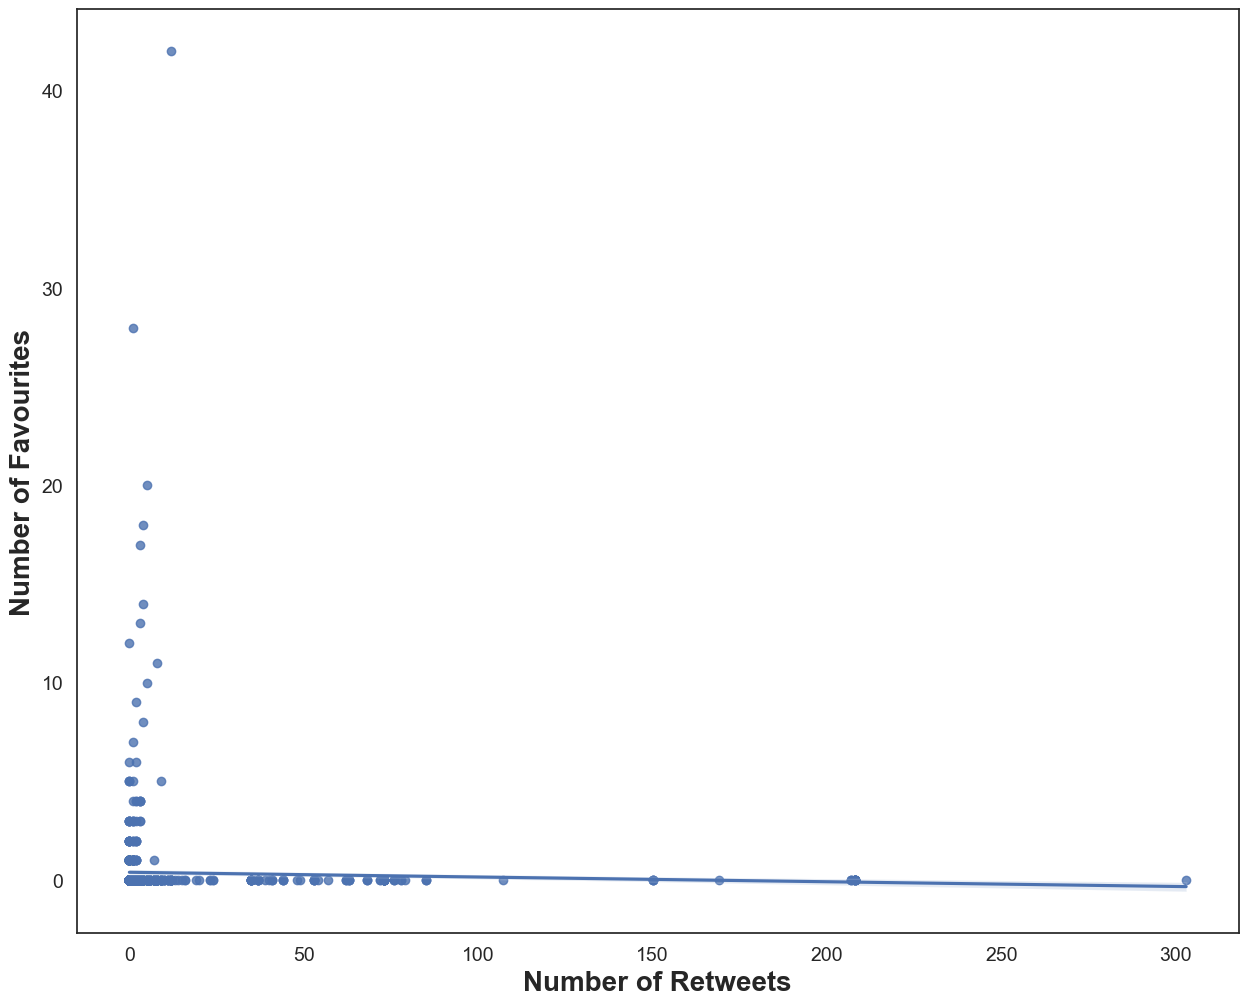

In [68]:
# Plot scatterplot with regression-based trend line to visualise correlation.
ax1 = sns.regplot(x = 'tweet_retweet_count', y = 'tweet_favorite_count',
                 data = tweets)
# Adjust x axis.
plt.xlabel("Number of Retweets", weight='bold', size=20);
plt.xlim();
# Adjust y axis
plt.ylabel("Number of Favourites", weight='bold', size=20);
plt.ylim();
# Adjust x ticks.
plt.xticks(fontsize=14)
# Adjust y ticks.
plt.yticks(fontsize=14);  # Semicolon to remove extraneous output.

# Save figure as .png file for later use.
plt.savefig('retweet_favourite.png', dpi=300, bbox_inches='tight');

In [69]:
# Calculate the correlation between retweets and favourites.
rt_fv_corr = tweets['tweet_retweet_count'].corr(tweets['tweet_favorite_count'])

# Add docstring for clarity.
print("The correlation between a tweet's number of retweets and favourites is:",
     rt_fv_corr)

The correlation between a tweet's number of retweets and favourites is: -0.034960383164063503


**Comment:**

> The correlation between retweets and favourites is very low, so it would not be clear what a high number of retweets vs a high number of favourites would signify. Additionally, it is not clear if analysing the data from only tweets with a finite number of retweets/favourites is a good idea overall. There are pros and cons, which I will list below:

> Pros:
> - Tweets that have been retweeted/favourited signify that others agree with them
> - People can tweet as many times as they want, but spamming tweets will likely not produce retweets and favourites on all of them i.e. in one sense, the quality of the data goes up (although it's not so simple)

> Cons:
> - The quantity of the data goes down
> - It is not clear what retweets vs favourites means, as they are quite uncorrelated
> - Ignoring non-retweeted/favourited tweets biases the data towards popular people
> - When people tweet, it signifies a need from that person, regardless of outside interaction

> Overall, I think the cons outweigh the pros, so I will choose to analyse all tweets, and not just ones that have been retweeted or favourited.

In [70]:
# Create a new DataFrame containing only the text.
tweets_text = tweets['tweet_full_text']

# View the DataFrame.
display(tweets_text.to_frame().head())

tweet_full_text
0  As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...
1                                                              RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed.  We're #hiring for…
2                                                           RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…
3                                                             RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…
4  ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...

### 5.2: Analysing the tweet data

**Functions:**

In [71]:
# Loop through the messages, and create a list of values containing the # symbol.
def find_hashtag(tweet_list, separator):
    tags = []
    for y in [x.split(separator) for x in tweet_list.values]:
        for z in y:
            if '#' in z:
                # Change to lowercase.
                tags.append(z.lower())
    return tags

In [72]:
# Find hashtags that contain other hashtags to group redundant tags.
def similar_words(word_list):
    # Initialise empty list to fill with values.
    result = [[] for x in range(len(word_list))]

    for word0 in word_list:
        count = -1
        for word in word_list:
            count += 1
            if word0 != word:
                if word0 in word:
                    # Fill empty list with the word(s) contained within.
                    result[count].append(word0)
    return result

In [73]:
# Function that removes all punctuation from a list of words.
def remove_punctuation(word_list, **kwargs):
    # Optional argument that preserves certain punctuation
    exception = kwargs.get('exception', None)
    
    # Punctuation exceptions that should NOT be removed.
    if exception is not None:
        for punct in exception:
            my_punctuation = string.punctuation.replace(punct, '')
    else:
        my_punctuation = string.punctuation
    
    count = -1
    for word in word_list:
        count += 1
        word_list[count] = word.translate(str.maketrans('', '', my_punctuation))
    
    # Return the output.
    return word_list

In [74]:
# Function that removes outliers using the 1.5 IQR rule.
def remove_outliers(num_list):
    # Find interquartile range (IQR).
    q3, q1 = np.percentile(num_list, [75 ,25])
    iqr = q3 - q1
    
    # Find limits to filter out exceedingly small or large outliers.
    lim_condition = ((num_list > (q1 - 1.5*iqr)) & (num_list < (q3 + 1.5*iqr)))
    
    # Apply limit condition.
    try:
        num_list = num_list[lim_condition]
    except:
        # Attempt to catch incorrect data types.
        num_list = np.array(num_list)
        num_list = num_list[lim_condition]
    
    # Return output.
    return num_list

**Outputs:**

In [75]:
# Convert to Pandas series.
tags = pd.Series(find_hashtag(tweets['tweet_full_text'], ' '))

In [76]:
# Display the first 30 records.
display(tags.to_frame().head(30))

0
0                                  #healthcare
1                               #premisehealth
2                                      #hiring
3                                  #healthcare
4                                      🚨#new:🚨
5                              look!\n\n#blogs
6                       #digitaltransformation
7                               #cybersecurity
8                                  #accounting
9                                     #finance
10                                 #healthcare
11  https://t.co/jrgqeqdme4\n.\n#firstcoastcna
12                                    #cnaexam
13                         #cnaexampreparation
14                               #jacksonville
15                                #cnatraining
16                                      #nurse
17                                    #nursing
18                                  #nurselife
19                          #nursepractitioner
20                              #nurseproblems
21                              #nursingschool
22                                 #healthcare
23                                     🚨#new:🚨
24                               #disparities.
25                  @karahartnett\n#healthcare
26                                      #alert
27                                  #insurance
28              #data\nhttps://t.co/h9hlamr7p9
29                                 #healthcare

In [77]:
# Convert the series to a DataFrame in preparation for visualisation.
data = tags.groupby(tags).size().sort_values(0, ascending=False).reset_index()

# Rename the columns.
data.rename(columns={'index':'word', 0:'count'}, inplace=True)
display(data)

word  count
0                   #healthcare    716
1                       #health     80
2                     #medicine     41
3                           #ai     40
4                          #job     38
...                         ...    ...
1749         #healthcareprofes…      1
1750  #healthcareprofessionals!      1
1751            #healthcarellyc      1
1752             #healthcarelaw      1
1753               🤷‍♂️#nursing      1

[1754 rows x 2 columns]

In [78]:
# Fix the count datatype.
data['count'] = data['count'].astype('int')

# View the result.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754 entries, 0 to 1753
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   word    1754 non-null   object
 1   count   1754 non-null   int32 
dtypes: int32(1), object(1)
memory usage: 20.7+ KB


In [79]:
# Display records where the count is larger than 10.
above = 10
data_above = data[data['count'] > above]
display(data_above)

word  count
0                   #healthcare    716
1                       #health     80
2                     #medicine     41
3                           #ai     40
4                          #job     38
5                      #medical     35
6                     #strategy     30
7               #pharmaceutical     28
8                #digitalhealth     25
9                    #marketing     25
10                      #pharma     25
11                     #biotech     24
12                  #medtwitter     24
13     #competitiveintelligence     24
14                       #meded     23
15                     #vaccine     18
16                      #hiring     18
17                        #news     17
18                  #technology     17
19             #machinelearning     17
20             #womeninmedicine     16
21        #competitivemarketing     16
22                       #covid     16
23                 #coronavirus     16
24                    #wellness     15
25                  #healthtech     15
26                     #science     14
27                    #medicare     14
28                     #covid19     14
29  #doctorofveterinarymedicine     14
30                      #foamed     13
31                 #healthcare.     13
32                        #tech     13
33                #telemedicine     13
34                 #patientcare     13
35                   #education     13
36                   #hospitals     12
37                      #doctor     12
38                #mentalhealth     12
39                  #telehealth     11
40       #digitaltransformation     11
41                #healthcareit     11
42                      #nurses     11
43                         #usa     11
44                 #healthcare?     11
45                  #innovation     11
46     drugs\n\n#tipsfornewdocs     11

In [80]:
# Remove new lines (\n) to improve plotting readability
data_above['word'] = [x.replace('\n', '') for x in data_above['word']]

# Remove everything before each hashtag for cleanness.
data_above['word'] = [x[x.find('#'):] for x in data_above['word']]

# View new data.
display(data_above['word'].to_frame())

word
0                   #healthcare
1                       #health
2                     #medicine
3                           #ai
4                          #job
5                      #medical
6                     #strategy
7               #pharmaceutical
8                #digitalhealth
9                    #marketing
10                      #pharma
11                     #biotech
12                  #medtwitter
13     #competitiveintelligence
14                       #meded
15                     #vaccine
16                      #hiring
17                        #news
18                  #technology
19             #machinelearning
20             #womeninmedicine
21        #competitivemarketing
22                       #covid
23                 #coronavirus
24                    #wellness
25                  #healthtech
26                     #science
27                    #medicare
28                     #covid19
29  #doctorofveterinarymedicine
30                      #foamed
31                 #healthcare.
32                        #tech
33                #telemedicine
34                 #patientcare
35                   #education
36                   #hospitals
37                      #doctor
38                #mentalhealth
39                  #telehealth
40       #digitaltransformation
41                #healthcareit
42                      #nurses
43                         #usa
44                 #healthcare?
45                  #innovation
46              #tipsfornewdocs

In [81]:
# Find all hashtags that contain another existing hashtag within them.
data_similar = data_above.copy()

# Compare the similar words to each word within the same table (DataFrame) for sense checking.
data_similar['similar_words'] = similar_words(data_above['word'])

# View the data.
display(data_similar[['word', 'similar_words']])

word           similar_words
0                   #healthcare               [#health]
1                       #health                      []
2                     #medicine                      []
3                           #ai                      []
4                          #job                      []
5                      #medical                      []
6                     #strategy                      []
7               #pharmaceutical               [#pharma]
8                #digitalhealth                      []
9                    #marketing                      []
10                      #pharma                      []
11                     #biotech                      []
12                  #medtwitter                      []
13     #competitiveintelligence                      []
14                       #meded                      []
15                     #vaccine                      []
16                      #hiring                      []
17                        #news                      []
18                  #technology                 [#tech]
19             #machinelearning                      []
20             #womeninmedicine                      []
21        #competitivemarketing                      []
22                       #covid                      []
23                 #coronavirus                      []
24                    #wellness                      []
25                  #healthtech               [#health]
26                     #science                      []
27                    #medicare                      []
28                     #covid19                [#covid]
29  #doctorofveterinarymedicine               [#doctor]
30                      #foamed                      []
31                 #healthcare.  [#healthcare, #health]
32                        #tech                      []
33                #telemedicine                      []
34                 #patientcare                      []
35                   #education                      []
36                   #hospitals                      []
37                      #doctor                      []
38                #mentalhealth                      []
39                  #telehealth                      []
40       #digitaltransformation                      []
41                #healthcareit  [#healthcare, #health]
42                      #nurses                      []
43                         #usa                      []
44                 #healthcare?  [#healthcare, #health]
45                  #innovation                      []
46              #tipsfornewdocs                      []

**Comment:**

> We can see from the list above that words that contain other words do indeed appear; however, upon sense checking, it seems that most of these words are indeed distinct and deserve their own hashtag index. The exceptions are repetitions of exactly the same word with punctuation being the only difference e.g. #healthcare, #healthcare., and #healthcare? do not deserve their own categories and should be combined to better reflect the data. This is what we will do now using a user-defined function that removes all punctuation.

In [82]:
# Remove all punctiation EXCEPT hashtags.
data_above['word'] = remove_punctuation(data_above['word'], exception='#')

# Regroup data according to new hashtags.
data_above = data_above.groupby('word').sum('count').sort_values('count', ascending=False).reset_index()

# View the data.
display(data_above)

word  count
0                   #healthcare    740
1                       #health     80
2                     #medicine     41
3                           #ai     40
4                          #job     38
5                      #medical     35
6                     #strategy     30
7               #pharmaceutical     28
8                       #pharma     25
9                    #marketing     25
10               #digitalhealth     25
11                  #medtwitter     24
12     #competitiveintelligence     24
13                     #biotech     24
14                       #meded     23
15                     #vaccine     18
16                      #hiring     18
17                  #technology     17
18                        #news     17
19             #machinelearning     17
20        #competitivemarketing     16
21                 #coronavirus     16
22                       #covid     16
23             #womeninmedicine     16
24                  #healthtech     15
25                    #wellness     15
26                     #covid19     14
27                    #medicare     14
28                     #science     14
29  #doctorofveterinarymedicine     14
30                 #patientcare     13
31                   #education     13
32                        #tech     13
33                #telemedicine     13
34                      #foamed     13
35                   #hospitals     12
36                #mentalhealth     12
37                      #doctor     12
38                      #nurses     11
39                #healthcareit     11
40       #digitaltransformation     11
41                  #telehealth     11
42              #tipsfornewdocs     11
43                         #usa     11
44                  #innovation     11

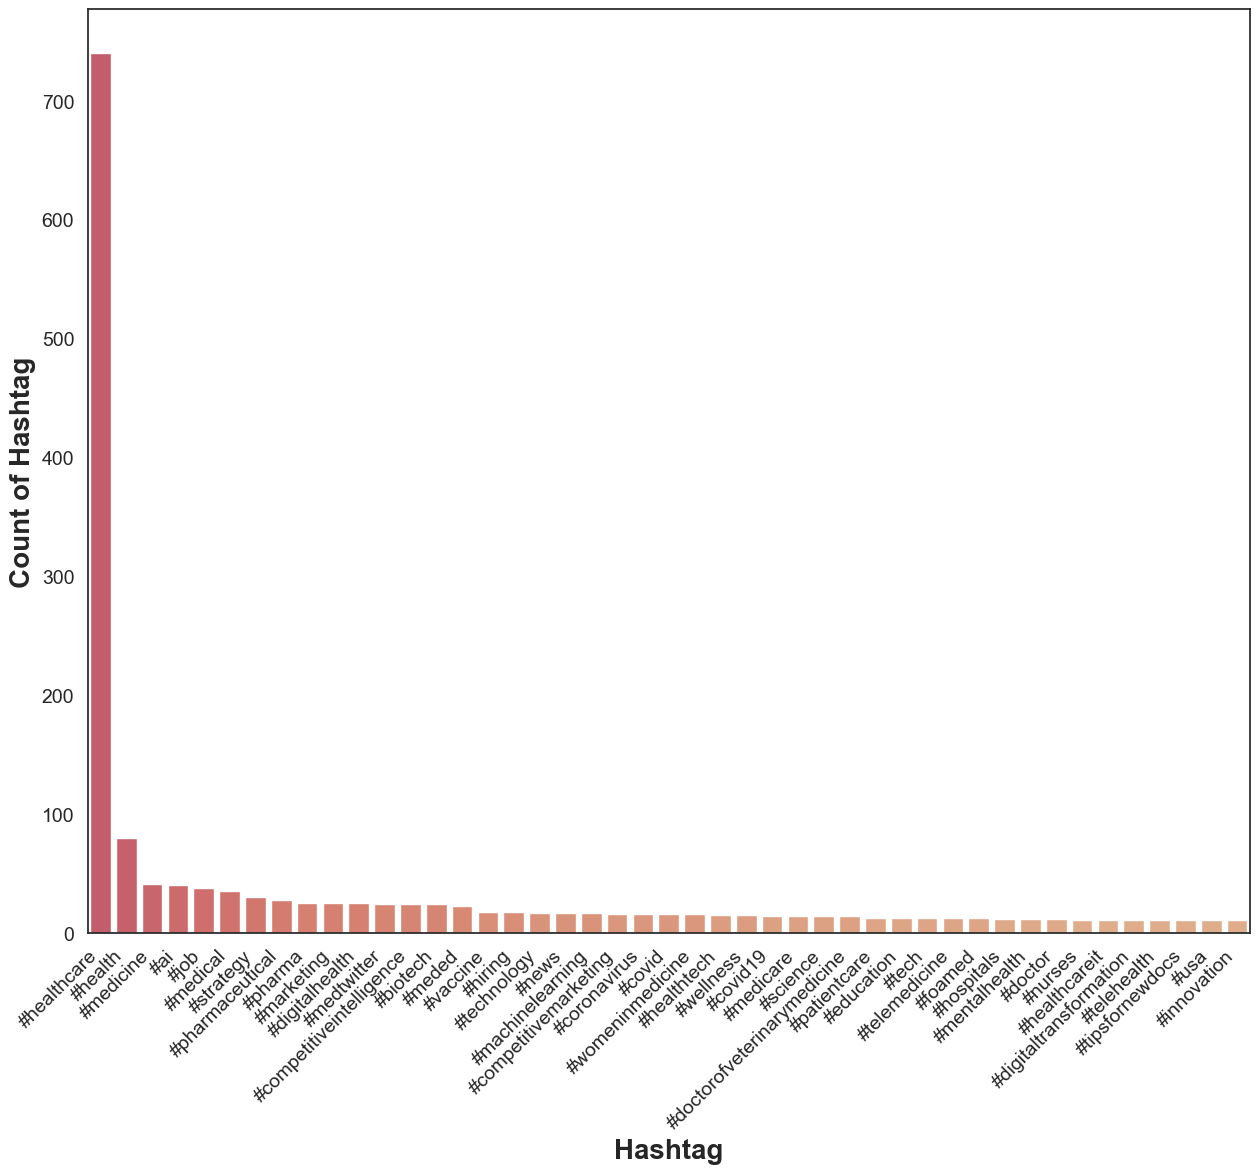

In [83]:
# Create a Seaborn barplot indicating records with a count >10 records.
palette = sns.color_palette('flare', len(data_above['count']))  # Create intensity-based colour palette.
ax1 = sns.barplot(x = 'word', y = 'count', hue = 'count', palette = palette,
            data = data_above, ci = None, dodge=False)
# Remove unecessary legend.
ax1.get_legend().remove()
# Adjust x axis.
plt.xlabel("Hashtag", weight='bold', size=20);
plt.xlim();
# Adjust y axis
plt.ylabel("Count of Hashtag", weight='bold', size=20);
plt.ylim();
# Adjust x ticks.
plt.xticks(fontsize=14, rotation=45, horizontalalignment='right')
# Adjust y ticks.
plt.yticks(fontsize=14);  # Semicolon to remove extraneous output.

# Save figure as .png file for later use.
plt.savefig('hashtag_count.png', dpi=300, bbox_inches='tight');

Removing outliers to better compare lower hashtag counts:

In [84]:
# Make copy of DataFrame to preserve original data (the outliers are useful here).
data_fixed = data_above.copy()

# Remove outliers using 1.5 IQR rule.
data_fixed = data_fixed[data_fixed['count'].isin(remove_outliers(data_fixed['count']))]

# View the new data.
display(data_fixed)

word  count
3                           #ai     40
4                          #job     38
5                      #medical     35
6                     #strategy     30
7               #pharmaceutical     28
8                       #pharma     25
9                    #marketing     25
10               #digitalhealth     25
11                  #medtwitter     24
12     #competitiveintelligence     24
13                     #biotech     24
14                       #meded     23
15                     #vaccine     18
16                      #hiring     18
17                  #technology     17
18                        #news     17
19             #machinelearning     17
20        #competitivemarketing     16
21                 #coronavirus     16
22                       #covid     16
23             #womeninmedicine     16
24                  #healthtech     15
25                    #wellness     15
26                     #covid19     14
27                    #medicare     14
28                     #science     14
29  #doctorofveterinarymedicine     14
30                 #patientcare     13
31                   #education     13
32                        #tech     13
33                #telemedicine     13
34                      #foamed     13
35                   #hospitals     12
36                #mentalhealth     12
37                      #doctor     12
38                      #nurses     11
39                #healthcareit     11
40       #digitaltransformation     11
41                  #telehealth     11
42              #tipsfornewdocs     11
43                         #usa     11
44                  #innovation     11

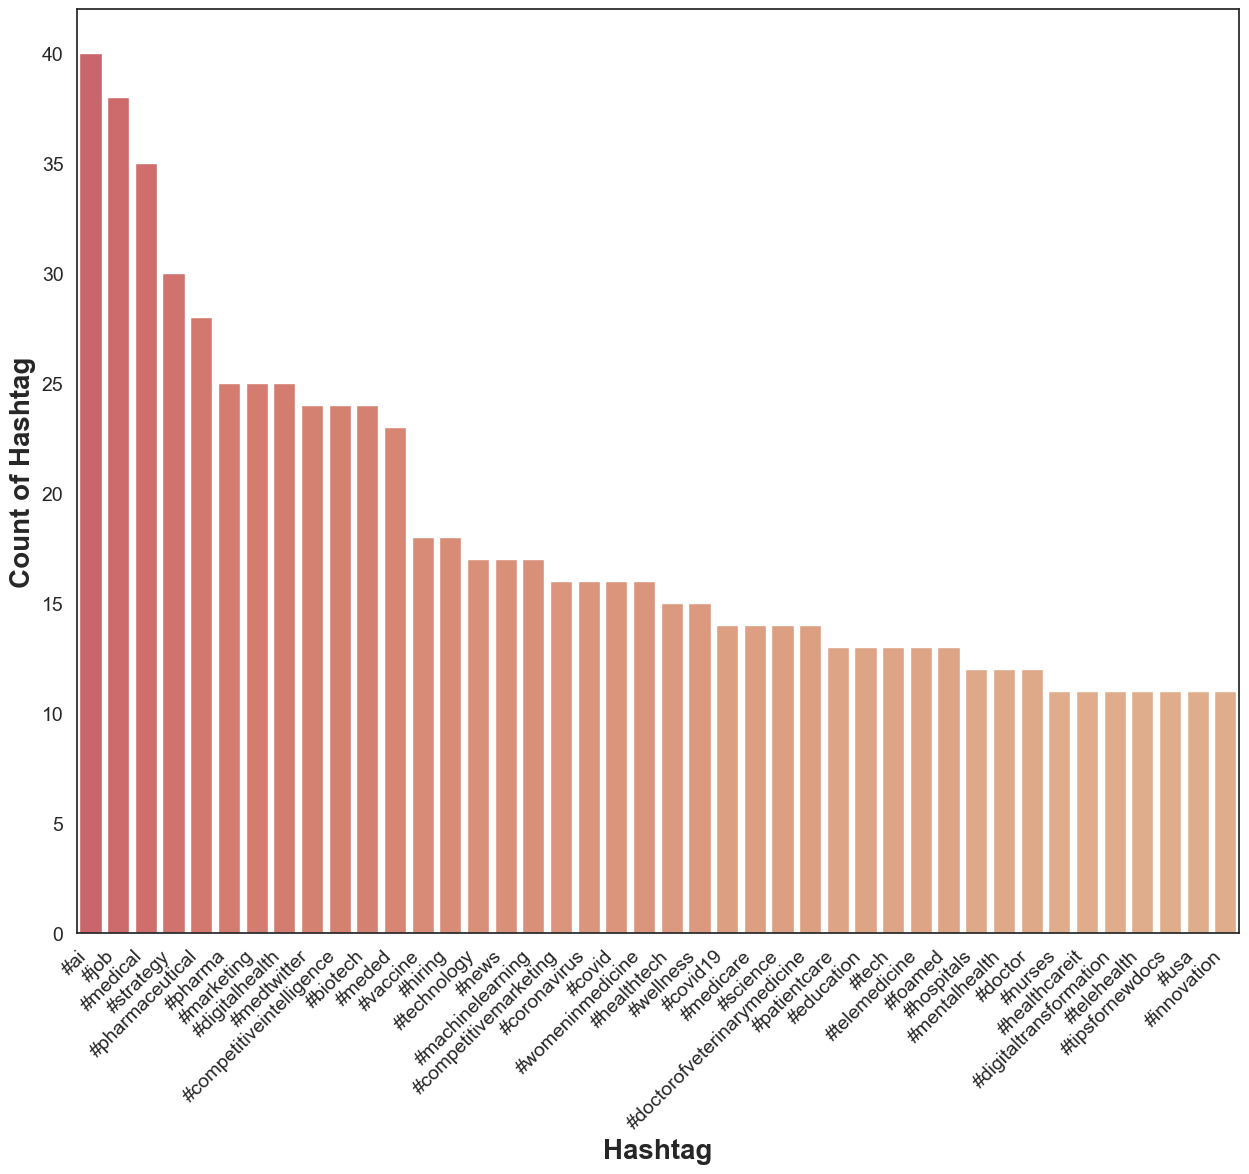

In [85]:
# Create a Seaborn barplot indicating records with a count >10 records with outliers removed.
palette = sns.color_palette('flare', len(data_fixed['count']))  # Create intensity-based colour palette.
ax1 = sns.barplot(x = 'word', y = 'count', hue = 'count', palette = palette,
            data = data_fixed, ci = None, dodge=False)
# Remove unecessary legend.
ax1.get_legend().remove()
# Adjust x axis.
plt.xlabel("Hashtag", weight='bold', size=20);
plt.xlim();
# Adjust y axis
plt.ylabel("Count of Hashtag", weight='bold', size=20);
plt.ylim();
# Adjust x ticks.
plt.xticks(fontsize=14, rotation=45, horizontalalignment='right')
# Adjust y ticks.
plt.yticks(fontsize=14);  # Semicolon to remove extraneous output.

# Save figure as .png file for later use.
plt.savefig('hashtag_count_ex.png', dpi=300, bbox_inches='tight');

### 5.3: A better way to count the hashtags

> Upon further inspection, searching the column 'tweet_full_text' is perhaps inferior to searching the column 'tweet_entities_hashtags'. This is because we search 'tweet_full_text' by using a blank space ' ' as a separator; but what if someone mistypes and puts a hashtag directly next to another word by accident, with no space? In this case, it may be better to trust the 'tweet_entities_hashtags' provided by the API, as their hashtag search function is likely more advanced, and more accurate, than our relatively simple user-defined function. We present data from this new column below.

In [86]:
# Find hashtags using dedicated column in DataFrame.
hashtag0_na = tweets['tweet_entities_hashtags'][tweets['tweet_entities_hashtags'].isnull() == False]

# Convert to Pandas series.
tags0 = pd.Series(find_hashtag(hashtag0_na, ', '))

# Display first 30 rows.
display(tags0.to_frame().head(30))

0
0              #healthcare
1           #premisehealth
2                  #hiring
3              #healthcare
4                     #new
5                   #blogs
6   #digitaltransformation
7           #cybersecurity
8              #accounting
9                 #finance
10             #healthcare
11          #firstcoastcna
12                #cnaexam
13     #cnaexampreparation
14           #jacksonville
15            #cnatraining
16                  #nurse
17                #nursing
18              #nurselife
19      #nursepractitioner
20          #nurseproblems
21          #nursingschool
22             #healthcare
23                    #new
24            #disparities
25             #healthcare
26                  #alert
27              #insurance
28                   #data
29             #healthcare

In [87]:
# Convert the series to a DataFrame in preparation for visualisation.
data0 = tags0.groupby(tags0).size().sort_values(0, ascending=False).reset_index()

# Rename the columns.
data0.rename(columns={'index':'word', 0:'count'}, inplace=True)
display(data)

word  count
0                   #healthcare    716
1                       #health     80
2                     #medicine     41
3                           #ai     40
4                          #job     38
...                         ...    ...
1749         #healthcareprofes…      1
1750  #healthcareprofessionals!      1
1751            #healthcarellyc      1
1752             #healthcarelaw      1
1753               🤷‍♂️#nursing      1

[1754 rows x 2 columns]

In [88]:
# Fix the count datatype.
data0['count'] = data0['count'].astype('int')

# View the result.
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1497 entries, 0 to 1496
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   word    1497 non-null   object
 1   count   1497 non-null   int32 
dtypes: int32(1), object(1)
memory usage: 17.7+ KB


In [89]:
# Display records where the count is larger than 10.
above = 10
data0_above = data0[data0['count'] > above]
display(data0_above)

word  count
0                   #healthcare    844
1                       #health     86
2                           #ai     47
3                     #medicine     42
4                          #job     38
5                      #medical     35
6                     #strategy     31
7                #digitalhealth     31
8               #pharmaceutical     28
9                   #medtwitter     27
10                      #pharma     25
11                     #biotech     25
12                   #marketing     25
13     #competitiveintelligence     25
14                       #meded     24
15                  #telehealth     22
16                      #hiring     21
17              #tipsfornewdocs     21
18                       #covid     21
19                  #healthtech     18
20                     #vaccine     18
21                  #technology     18
22             #machinelearning     18
23                        #news     17
24                    #medicare     17
25             #womeninmedicine     16
26        #competitivemarketing     16
27                 #coronavirus     16
28                     #covid19     15
29                    #wellness     15
30                        #tech     14
31                     #nursing     14
32  #doctorofveterinarymedicine     14
33                     #science     14
34                   #education     14
35                #telemedicine     14
36                         #new     13
37                      #foamed     13
38                 #patientcare     13
39                #mentalhealth     13
40                   #hospitals     12
41                      #nurses     12
42                      #doctor     12
43                        #data     12
44                         #usa     11
45                      #python     11
46       #digitaltransformation     11
47                #healthcareit     11
48                     #medtech     11
49                  #innovation     11

**Comment:**

> This data is much cleaner than what we obtained from searching the full text previously. It does not contain any trivial repeats due to punctuation or URLs, and thus, does not require any further cleaning before it is ready to be plotted. 

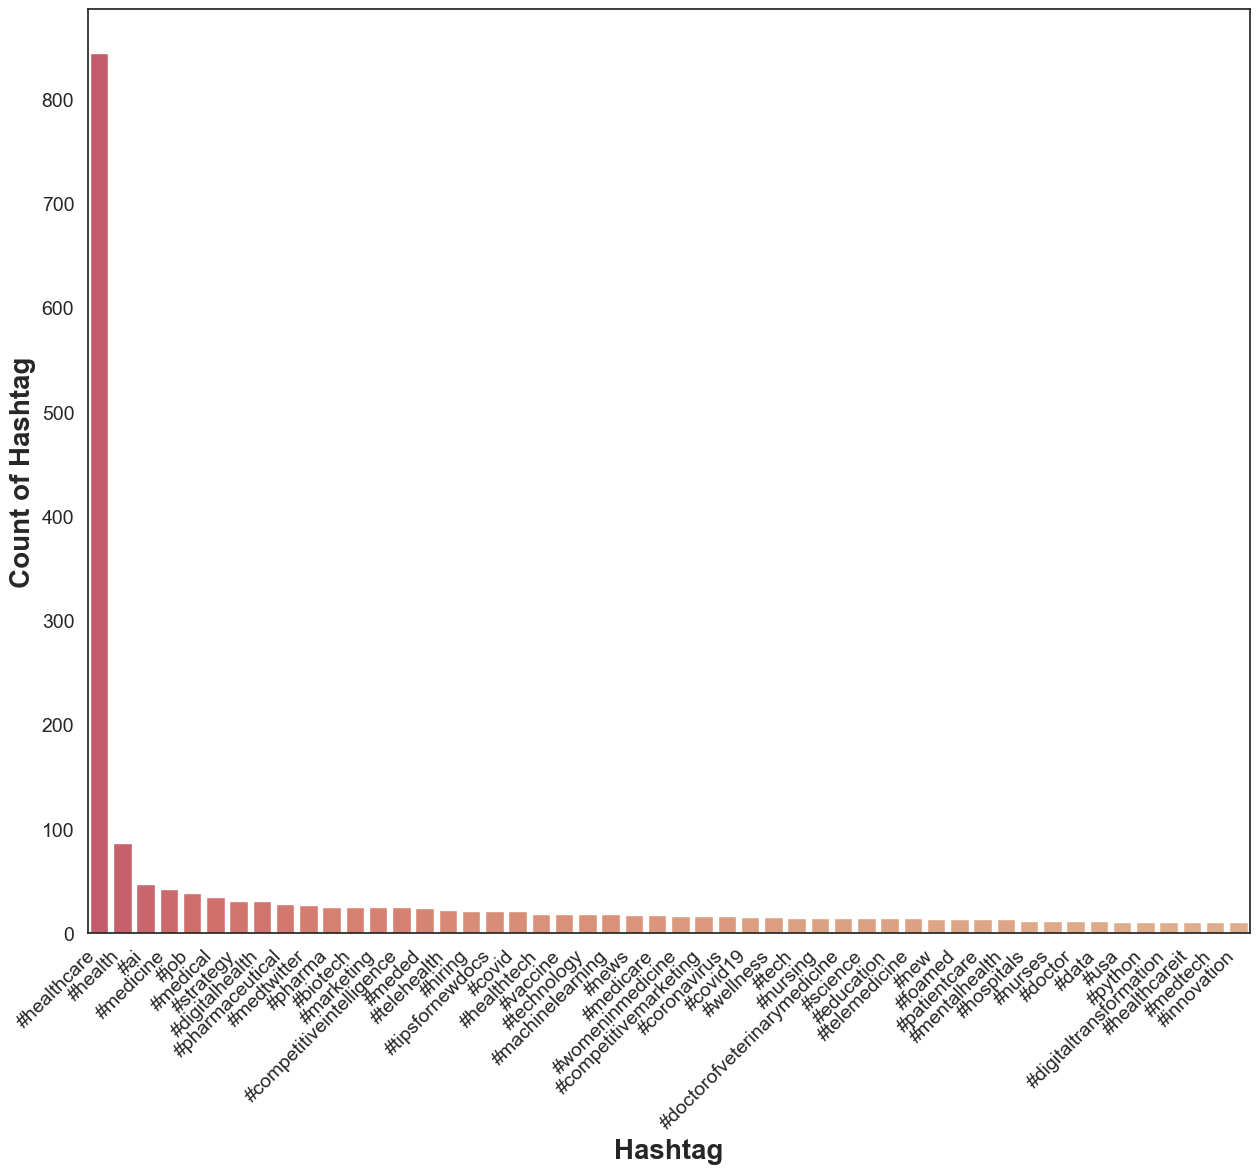

In [90]:
# Create a Seaborn barplot indicating records with a count >10 records.
palette = sns.color_palette('flare', len(data0_above['count']))  # Create intensity-based colour palette.
ax1 = sns.barplot(x = 'word', y = 'count', hue = 'count', palette = palette,
            data = data0_above, ci = None, dodge=False)
# Remove unecessary legend.
ax1.get_legend().remove()
# Adjust x axis.
plt.xlabel("Hashtag", weight='bold', size=20);
plt.xlim();
# Adjust y axis
plt.ylabel("Count of Hashtag", weight='bold', size=20);
plt.ylim();
# Adjust x ticks.
plt.xticks(fontsize=14, rotation=45, horizontalalignment='right')
# Adjust y ticks.
plt.yticks(fontsize=14);  # Semicolon to remove extraneous output.

# Save figure as .png file for later use.
plt.savefig('hashtag0_count.png', dpi=300, bbox_inches='tight');

Removing outliers to better compare lower hashtag counts:

In [91]:
# Make copy of DataFrame to preserve original data (the outliers are useful here).
data0_fixed = data0_above.copy()

# Remove outliers using 1.5 IQR rule.
data0_fixed = data0_fixed[data0_fixed['count'].isin(remove_outliers(data0_fixed['count']))]

# View the new data.
display(data0_fixed)

word  count
3                     #medicine     42
4                          #job     38
5                      #medical     35
6                     #strategy     31
7                #digitalhealth     31
8               #pharmaceutical     28
9                   #medtwitter     27
10                      #pharma     25
11                     #biotech     25
12                   #marketing     25
13     #competitiveintelligence     25
14                       #meded     24
15                  #telehealth     22
16                      #hiring     21
17              #tipsfornewdocs     21
18                       #covid     21
19                  #healthtech     18
20                     #vaccine     18
21                  #technology     18
22             #machinelearning     18
23                        #news     17
24                    #medicare     17
25             #womeninmedicine     16
26        #competitivemarketing     16
27                 #coronavirus     16
28                     #covid19     15
29                    #wellness     15
30                        #tech     14
31                     #nursing     14
32  #doctorofveterinarymedicine     14
33                     #science     14
34                   #education     14
35                #telemedicine     14
36                         #new     13
37                      #foamed     13
38                 #patientcare     13
39                #mentalhealth     13
40                   #hospitals     12
41                      #nurses     12
42                      #doctor     12
43                        #data     12
44                         #usa     11
45                      #python     11
46       #digitaltransformation     11
47                #healthcareit     11
48                     #medtech     11
49                  #innovation     11

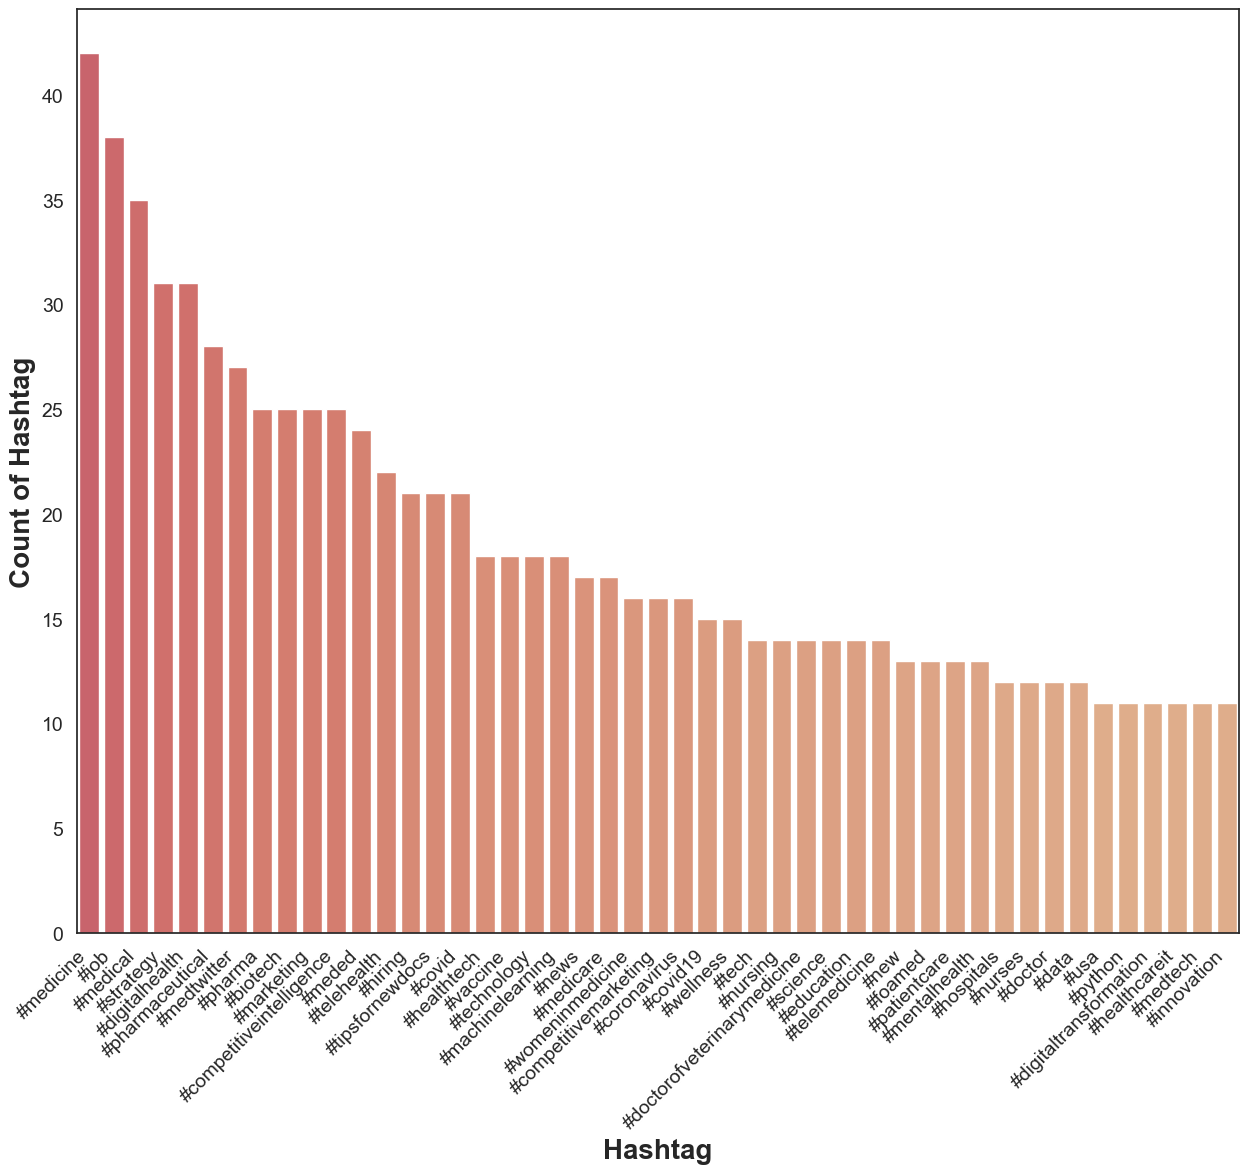

In [92]:
# Create a Seaborn barplot indicating records with a count >10 records with outliers removed.
palette = sns.color_palette('flare', len(data0_fixed['count']))  # Create intensity-based colour palette.
ax1 = sns.barplot(x = 'word', y = 'count', hue = 'count', palette = palette,
            data = data0_fixed, ci = None, dodge=False)
# Remove unecessary legend.
ax1.get_legend().remove()
# Adjust x axis.
plt.xlabel("Hashtag", weight='bold', size=20);
plt.xlim();
# Adjust y axis
plt.ylabel("Count of Hashtag", weight='bold', size=20);
plt.ylim();
# Adjust x ticks.
plt.xticks(fontsize=14, rotation=45, horizontalalignment='right')
# Adjust y ticks.
plt.yticks(fontsize=14);  # Semicolon to remove extraneous output.

# Save figure as .png file for later use.
plt.savefig('hashtag0_count_ex.png', dpi=300, bbox_inches='tight');

# 

# Assignment activity 6

### 6.1: Investigate the main concerns posed by the NHS. 

In [93]:
# Prepare your workstation.
# Load the appointments_regional.csv file.
ar = pd.read_csv('appointments_regional.csv')

# View the DataFrame by:
# 1. Checking the shape,
# 2. Checking the data types,
# 3. Checking the first five rows,
# 4. Checking the last five rows.
display(ar.shape)
display(ar.dtypes)
display(ar.head())
display(ar.tail())

(596821, 7)

icb_ons_code                         object
appointment_month                    object
appointment_status                   object
hcp_type                             object
appointment_mode                     object
time_between_book_and_appointment    object
count_of_appointments                 int64
dtype: object

icb_ons_code appointment_month appointment_status hcp_type appointment_mode  \
0    E54000034           2020-01           Attended       GP     Face-to-Face   
1    E54000034           2020-01           Attended       GP     Face-to-Face   
2    E54000034           2020-01           Attended       GP     Face-to-Face   
3    E54000034           2020-01           Attended       GP     Face-to-Face   
4    E54000034           2020-01           Attended       GP     Face-to-Face   

  time_between_book_and_appointment  count_of_appointments  
0                             1 Day                   8107  
1                    15  to 21 Days                   6791  
2                       2 to 7 Days                  20686  
3                    22  to 28 Days                   4268  
4                     8  to 14 Days                  11971

icb_ons_code appointment_month appointment_status hcp_type  \
596816    E54000050           2022-06            Unknown  Unknown   
596817    E54000050           2022-06            Unknown  Unknown   
596818    E54000050           2022-06            Unknown  Unknown   
596819    E54000050           2022-06            Unknown  Unknown   
596820    E54000050           2022-06            Unknown  Unknown   

       appointment_mode time_between_book_and_appointment  \
596816          Unknown                       2 to 7 Days   
596817          Unknown                    22  to 28 Days   
596818          Unknown                     8  to 14 Days   
596819          Unknown                 More than 28 Days   
596820          Unknown                          Same Day   

        count_of_appointments  
596816                     21  
596817                      8  
596818                     28  
596819                     17  
596820                     10

In [94]:
# View the metadata of the dataset
ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 non-null  object
 6   count_of_appointments              596821 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 31.9+ MB


In [95]:
# Determine the descriptive statistics of the data set.
display(ar.describe())

count_of_appointments
count          596821.000000
mean             1244.601857
std              5856.887042
min                 1.000000
25%                 7.000000
50%                47.000000
75%               308.000000
max            211265.000000

In [96]:
# Determine the minimum and maximum dates in the ar DataFrame.
ar_min = ar['appointment_month'].min()
ar_max = ar['appointment_month'].max()

# Print output with appropriate docstrings.
print("The appointment dates in appointments_regional.csv are between", 
      ar_min, "and", ar_max)

The appointment dates in appointments_regional.csv are between 2020-01 and 2022-06


In [97]:
# Filter the data set to only look at data from 2021-08 onwards.
after = '2021-08'
ar_after = ar[ar['appointment_month'] >= after]

# View the data.
# Add docstring for clarity.
print("Data set appointments_regional.csv filtered from", after, "onwards:")
display(ar_after)

Data set appointments_regional.csv filtered from 2021-08 onwards:


icb_ons_code appointment_month appointment_status hcp_type  \
3652      E54000034           2021-08           Attended       GP   
3653      E54000034           2021-08           Attended       GP   
3654      E54000034           2021-08           Attended       GP   
3655      E54000034           2021-08           Attended       GP   
3656      E54000034           2021-08           Attended       GP   
...             ...               ...                ...      ...   
596816    E54000050           2022-06            Unknown  Unknown   
596817    E54000050           2022-06            Unknown  Unknown   
596818    E54000050           2022-06            Unknown  Unknown   
596819    E54000050           2022-06            Unknown  Unknown   
596820    E54000050           2022-06            Unknown  Unknown   

       appointment_mode time_between_book_and_appointment  \
3652       Face-to-Face                             1 Day   
3653       Face-to-Face                    15  to 21 Days   
3654       Face-to-Face                       2 to 7 Days   
3655       Face-to-Face                    22  to 28 Days   
3656       Face-to-Face                     8  to 14 Days   
...                 ...                               ...   
596816          Unknown                       2 to 7 Days   
596817          Unknown                    22  to 28 Days   
596818          Unknown                     8  to 14 Days   
596819          Unknown                 More than 28 Days   
596820          Unknown                          Same Day   

        count_of_appointments  
3652                     6553  
3653                     2390  
3654                    10547  
3655                      937  
3656                     4961  
...                       ...  
596816                     21  
596817                      8  
596818                     28  
596819                     17  
596820                     10  

[223418 rows x 7 columns]

In [98]:
# Find the number of rows before and after filtering by date.
ar_rows = ar.shape[0]
ar_after_rows = ar_after.shape[0]

# Compare the number of rows lost from the date filter.
# Add docstring for clarity.
print("The number of rows in the original actual_duration.csv data set:", ar_rows)
print("The number of rows after filtering from", after, "onwards:", ar_after_rows)
print("The difference between the two:", abs(ar_rows - ar_after_rows))

The number of rows in the original actual_duration.csv data set: 596821
The number of rows after filtering from 2021-08 onwards: 223418
The difference between the two: 373403


**Question 1:** Should the NHS start looking at increasing staff levels? 

In [99]:
# The NHS can accommodate a maximum of 1,200,000 appointments per day.

In [100]:
# Create an aggregated data set to review the different features.
ar_agg = ar_after[['appointment_month', 'hcp_type', 'appointment_status', 'appointment_mode', 'time_between_book_and_appointment', 'count_of_appointments']]

# Group by number of apppointments.
ar_agg = ar_after\
    .groupby(['appointment_month', 'hcp_type', 'appointment_status', 
              'appointment_mode', 'time_between_book_and_appointment'])\
    .sum('count_of_appointments').reset_index()

# View the DataFrame.
# Add docstring for clarity.
print("Data set actual_duration.csv with extraneous columns removed:")
display(ar_agg)

Data set actual_duration.csv with extraneous columns removed:


appointment_month hcp_type appointment_status appointment_mode  \
0              2021-08       GP           Attended     Face-to-Face   
1              2021-08       GP           Attended     Face-to-Face   
2              2021-08       GP           Attended     Face-to-Face   
3              2021-08       GP           Attended     Face-to-Face   
4              2021-08       GP           Attended     Face-to-Face   
...                ...      ...                ...              ...   
3749           2022-06  Unknown            Unknown          Unknown   
3750           2022-06  Unknown            Unknown          Unknown   
3751           2022-06  Unknown            Unknown          Unknown   
3752           2022-06  Unknown            Unknown          Unknown   
3753           2022-06  Unknown            Unknown     Video/Online   

     time_between_book_and_appointment  count_of_appointments  
0                                1 Day                 507835  
1                       15  to 21 Days                 194726  
2                          2 to 7 Days                 959486  
3                       22  to 28 Days                 102111  
4                        8  to 14 Days                 398772  
...                                ...                    ...  
3749                     8  to 14 Days                   5494  
3750                 More than 28 Days                   5115  
3751                          Same Day                   1914  
3752            Unknown / Data Quality                     53  
3753                       2 to 7 Days                      1  

[3754 rows x 6 columns]

In [101]:
# Determine the total number of appointments per month.
ar_df = ar_after.groupby('appointment_month').sum('count_of_appointments').reset_index()

# Add a new column to indicate the average utilisation of services.
# Monthly aggregate / 30 to get to a daily value.
# Round to 1 decimal place.
ar_df['utilisation'] = round(ar_df['count_of_appointments']/30, 1)
ar_df['utilisation_percentage'] = round(ar_df['utilisation']/12000, 1)

# View the DataFrame.
# Add docstring for clarity.
print("Data set actual_duration.csv with extraneous columns removed and utilisation columns added:")
display(ar_df)

Data set actual_duration.csv with extraneous columns removed and utilisation columns added:


appointment_month  count_of_appointments  utilisation  \
0            2021-08               23852171     795072.4   
1            2021-09               28522501     950750.0   
2            2021-10               30303834    1010127.8   
3            2021-11               30405070    1013502.3   
4            2021-12               25140776     838025.9   
5            2022-01               25635474     854515.8   
6            2022-02               25355260     845175.3   
7            2022-03               29595038     986501.3   
8            2022-04               23913060     797102.0   
9            2022-05               27495508     916516.9   
10           2022-06               25828078     860935.9   

    utilisation_percentage  
0                     66.3  
1                     79.2  
2                     84.2  
3                     84.5  
4                     69.8  
5                     71.2  
6                     70.4  
7                     82.2  
8                     66.4  
9                     76.4  
10                    71.7

**Comment:**

> We can already see from the above table that utilisation percentage is nowhere near 100%, but we can explore this further by visualising the data. This will emphasise and reveal the underutilisation in a clearer fashion.

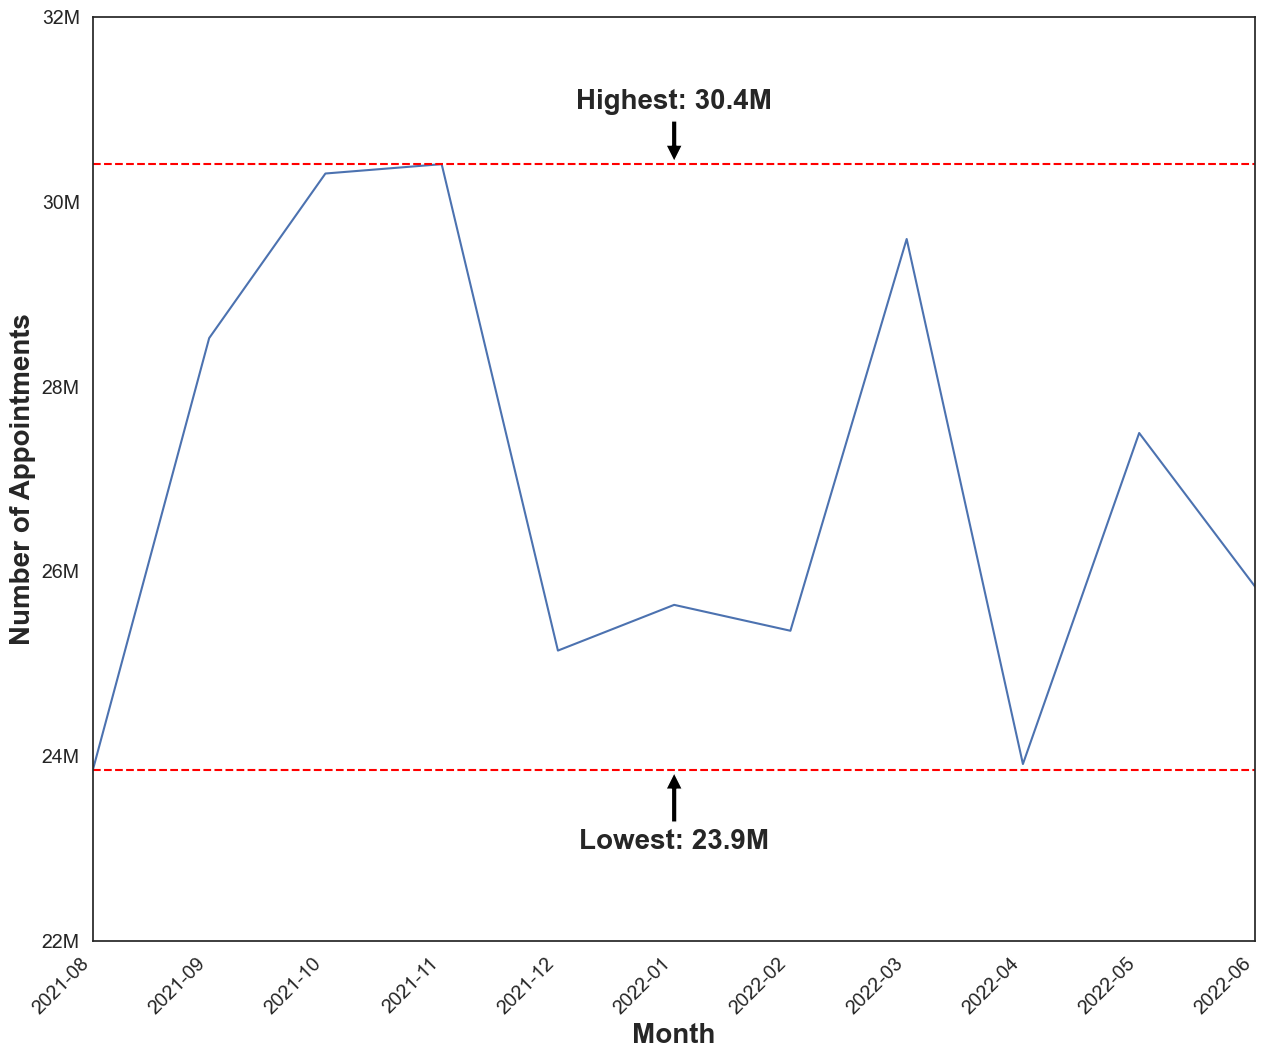

In [102]:
# Plot sum of count of monthly visits.
# Convert the appointment_month to string data type for ease of visualisation.
ar_df['appointment_month'] = ar_df['appointment_month'].astype('string')

# Create a lineplot with Seaborn.
ax1 = sns.lineplot(x = 'appointment_month', y = 'count_of_appointments',
                   data = ar_df, ci = None)
# Define maximum and minimum within variables.
ar_df_max = ar_df['count_of_appointments'].max()
ar_df_min = ar_df['count_of_appointments'].min()
# Add horizontal line to indicate peak.
ax1.axhline(y = ar_df_max,  # Line on number.
            xmin = 0,  # Left of the plot.
            xmax = 1,  # Right of the plot.
            color='red',  # Set colour.
            linestyle='dashed')  # Set style.
ax1.axhline(y = ar_df_min,  # Line on number.
            xmin = 0,  # Left of the plot.
            xmax = 1,  # Right of the plot.
            color='red',  # Set colour.
            linestyle='dashed')  # Set style.
# Add line annotations.
ax1.annotate(f'Highest: {round(float(ar_df_max)/1e6, 1)}M', 
             xy=('2022-01',ar_df_max), xytext=('2022-01',int(3.1e7)),
             arrowprops={'facecolor': 'black', 'shrink': 0.05},
             horizontalalignment='center', fontsize=20, weight='bold')
ax1.annotate(f'Lowest: {round(float(ar_df_min)/1e6, 1)}M', 
             xy=('2022-01',ar_df_min), xytext=('2022-01',int(2.3e7)),
             arrowprops={'facecolor': 'black', 'shrink': 0.05},
             horizontalalignment='center', fontsize=20, weight='bold')
# Adjust x axis.
plt.xlabel("Month", weight='bold', size=20);
plt.xlim([ar_df['appointment_month'].min(), ar_df['appointment_month'].max()]);
# Adjust y axis
plt.ylabel("Number of Appointments", weight='bold', size=20);
plt.ylim();
# Adjust x ticks.
plt.xticks(fontsize=14, rotation=45, horizontalalignment='right')
# Adjust y ticks.
ytick_positions = range(int(2.2e7), int(3.2e7)+int(0.2e7), int(0.2e7))
ytick_labels = [f'{int(x/1e6)}M' for x in ytick_positions]
plt.yticks(ytick_positions, ytick_labels, fontsize=14);  # Semicolon to remove extraneous output.

# Save figure as .png file for later use.
plt.savefig('appointment_count_range.png', dpi=300, bbox_inches='tight');

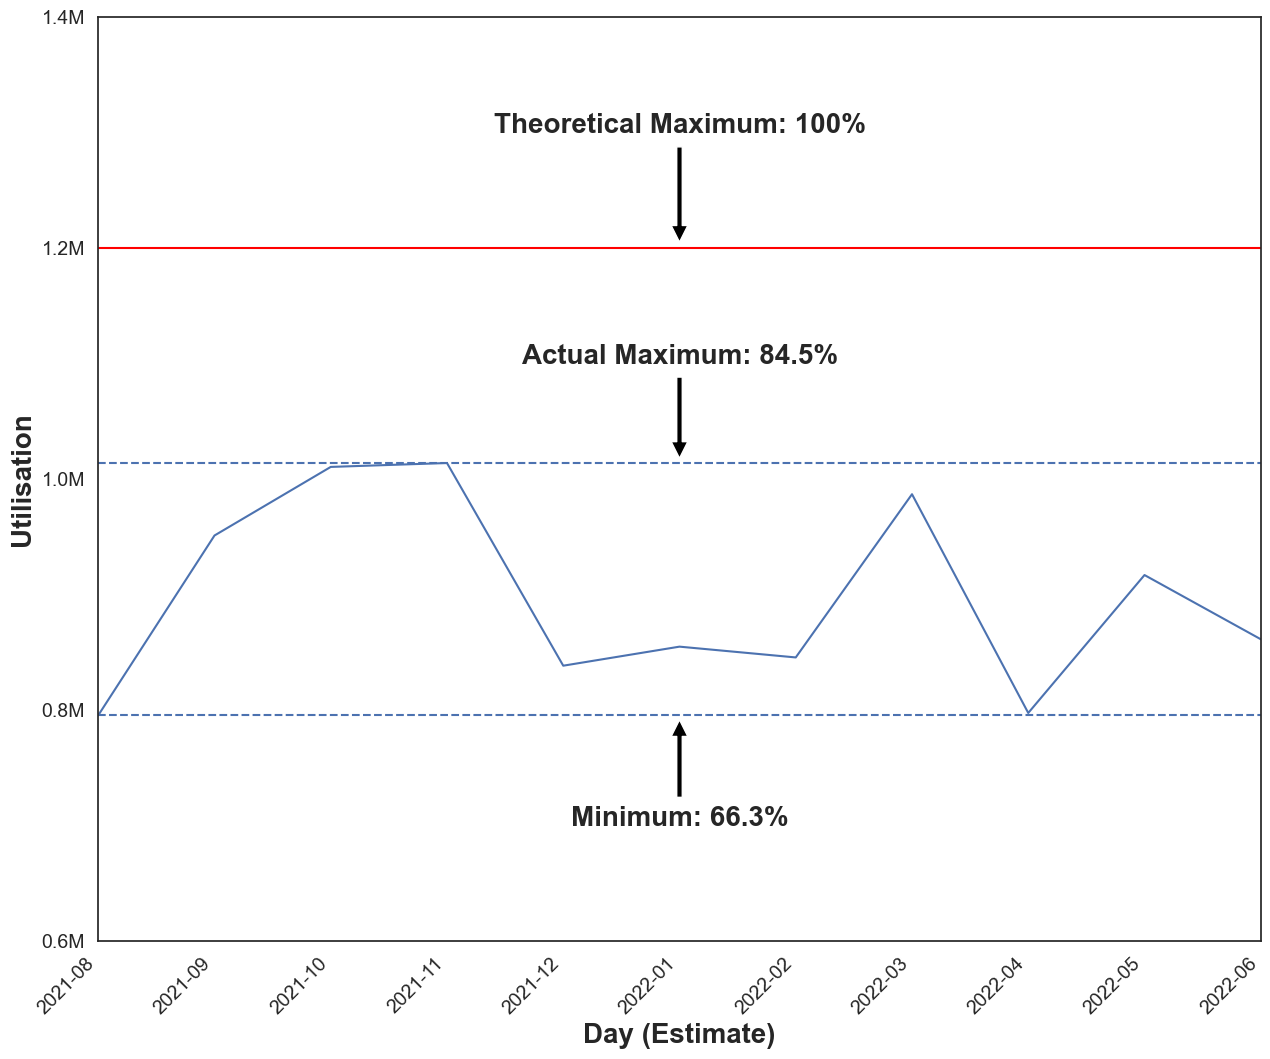

In [103]:
# Plot monthly capacity utilisation.
# Create a lineplot with Seaborn.
ax1 = sns.lineplot(x = 'appointment_month', y = 'utilisation',
            data = ar_df, ci = None)
# Define maximum and minimum within variables.
ar_df_max = ar_df['utilisation'].max()
ar_df_min = ar_df['utilisation'].min()
# Add horizontal line to indocate NHS daily capacity
ax1.axhline(y = int(1.2e6),  # Line on number.
           xmin = 0,  # Left of the plot.
           xmax = 1,  # Right of the plot.
           color = 'red')  # Set colour.
ax1.axhline(y = ar_df_max,  # Line on number.
           xmin = 0,  # Left of the plot.
           xmax = 1,  # Right of the plot.
           linestyle='dashed')  # Set style.
ax1.axhline(y = ar_df_min,  # Line on number.
           xmin = 0,  # Left of the plot.
           xmax = 1,  # Right of the plot.
           linestyle='dashed')  # Set style.
# Add line annotations.
percentage_max = ar_df['utilisation_percentage'].max()
percentage_min = ar_df['utilisation_percentage'].min()
ax1.annotate('Theoretical Maximum: 100%', xy=('2022-01',int(1.2e6)), xytext=('2022-01',int(1.3e6)),
             arrowprops={'facecolor': 'black', 'shrink': 0.05},
             horizontalalignment='center', fontsize=20, weight='bold')
ax1.annotate(f'Actual Maximum: {percentage_max}%', 
             xy=('2022-01',ar_df_max), xytext=('2022-01',int(1.1e6)),
             arrowprops={'facecolor': 'black', 'shrink': 0.05},
             horizontalalignment='center', fontsize=20, weight='bold')
ax1.annotate(f'Minimum: {percentage_min}%', 
             xy=('2022-01',ar_df_min), xytext=('2022-01',int(0.7e6)),
             arrowprops={'facecolor': 'black', 'shrink': 0.05},
             horizontalalignment='center', fontsize=20, weight='bold')
# Adjust x axis.
plt.xlabel("Day (Estimate)", weight='bold', size=20);
plt.xlim([ar_df['appointment_month'].min(), ar_df['appointment_month'].max()]);
# Adjust y axis
plt.ylabel("Utilisation", weight='bold', size=20);
plt.ylim();
# Adjust x ticks.
plt.xticks(fontsize=14, rotation=45, horizontalalignment='right')
# Adjust y ticks.
ytick_positions = range(int(0.6e6), int(1.4e6)+int(0.2e6), int(0.2e6))
ytick_labels = [f'{round(float(x)/1e6, 1)}M' for x in ytick_positions]
plt.yticks(ytick_positions, ytick_labels, fontsize=14);  # Semicolon to remove extraneous output.

# Save figure as .png file for later use.
plt.savefig('utilisation_range.png', dpi=300, bbox_inches='tight');

**Question 2:** How do the healthcare professional types differ over time?

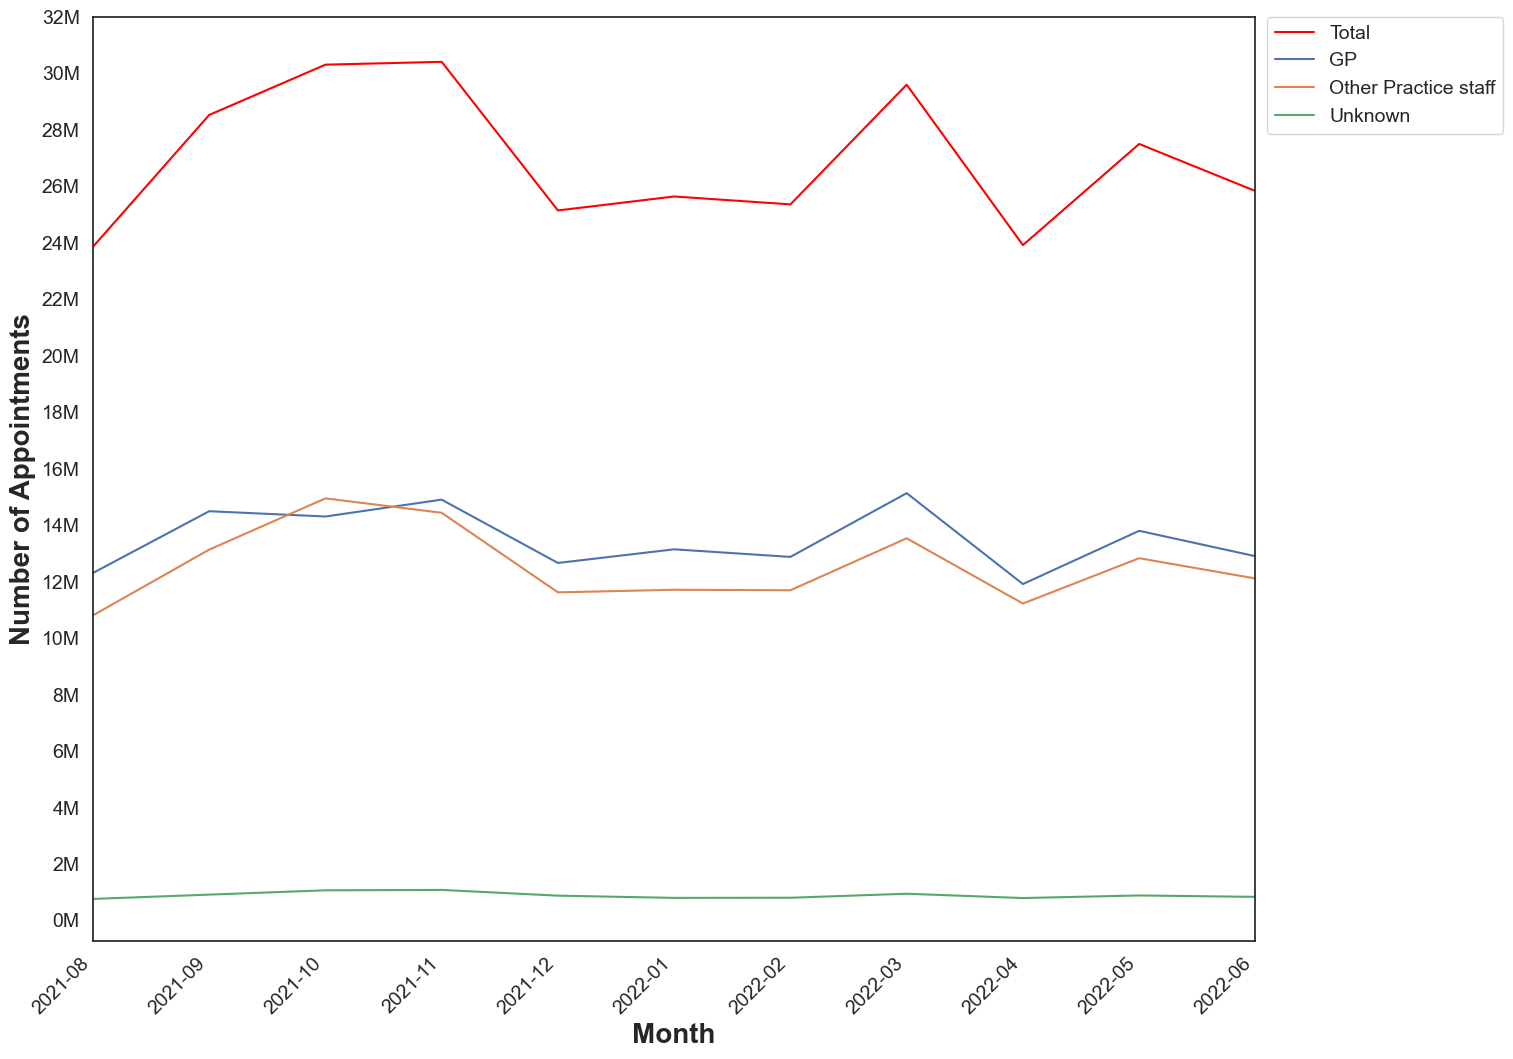

In [104]:
# Create a line plot to answer the question.
# Define new DataFrame.
ar_hcp = ar_after.groupby(['appointment_month', 'hcp_type']).sum('count_of_appointments').reset_index()

# Create a lineplot with Seaborn.
ax1 = sns.lineplot(x = 'appointment_month', y = 'count_of_appointments',
                   data = ar_df, ci = None,
                   label='Total', color='red')
ax2 = sns.lineplot(x = 'appointment_month', y = 'count_of_appointments', hue = 'hcp_type',
            data = ar_hcp, ci = None)
# Reposition legend.
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0, fontsize=14);
# Adjust x axis.
plt.xlabel("Month", weight='bold', size=20);
plt.xlim([ar_hcp['appointment_month'].min(), ar_hcp['appointment_month'].max()]);
# Adjust y axis
plt.ylabel("Number of Appointments", weight='bold', size=20);
plt.ylim();
# Adjust x ticks.
plt.xticks(fontsize=14, rotation=45, horizontalalignment='right')
# Adjust y ticks.
ytick_positions = range(0, int(3.2e7)+int(0.2e7), int(0.2e7))
ytick_labels = [f'{int(x/1e6)}M' for x in ytick_positions]
plt.yticks(ytick_positions, ytick_labels, fontsize=14);  # Semicolon to remove extraneous output.

# Save figure as .png file for later use.
plt.savefig('hcp_type.png', dpi=300, bbox_inches='tight');

**Question 3:** Are there significant changes in whether or not visits are attended?

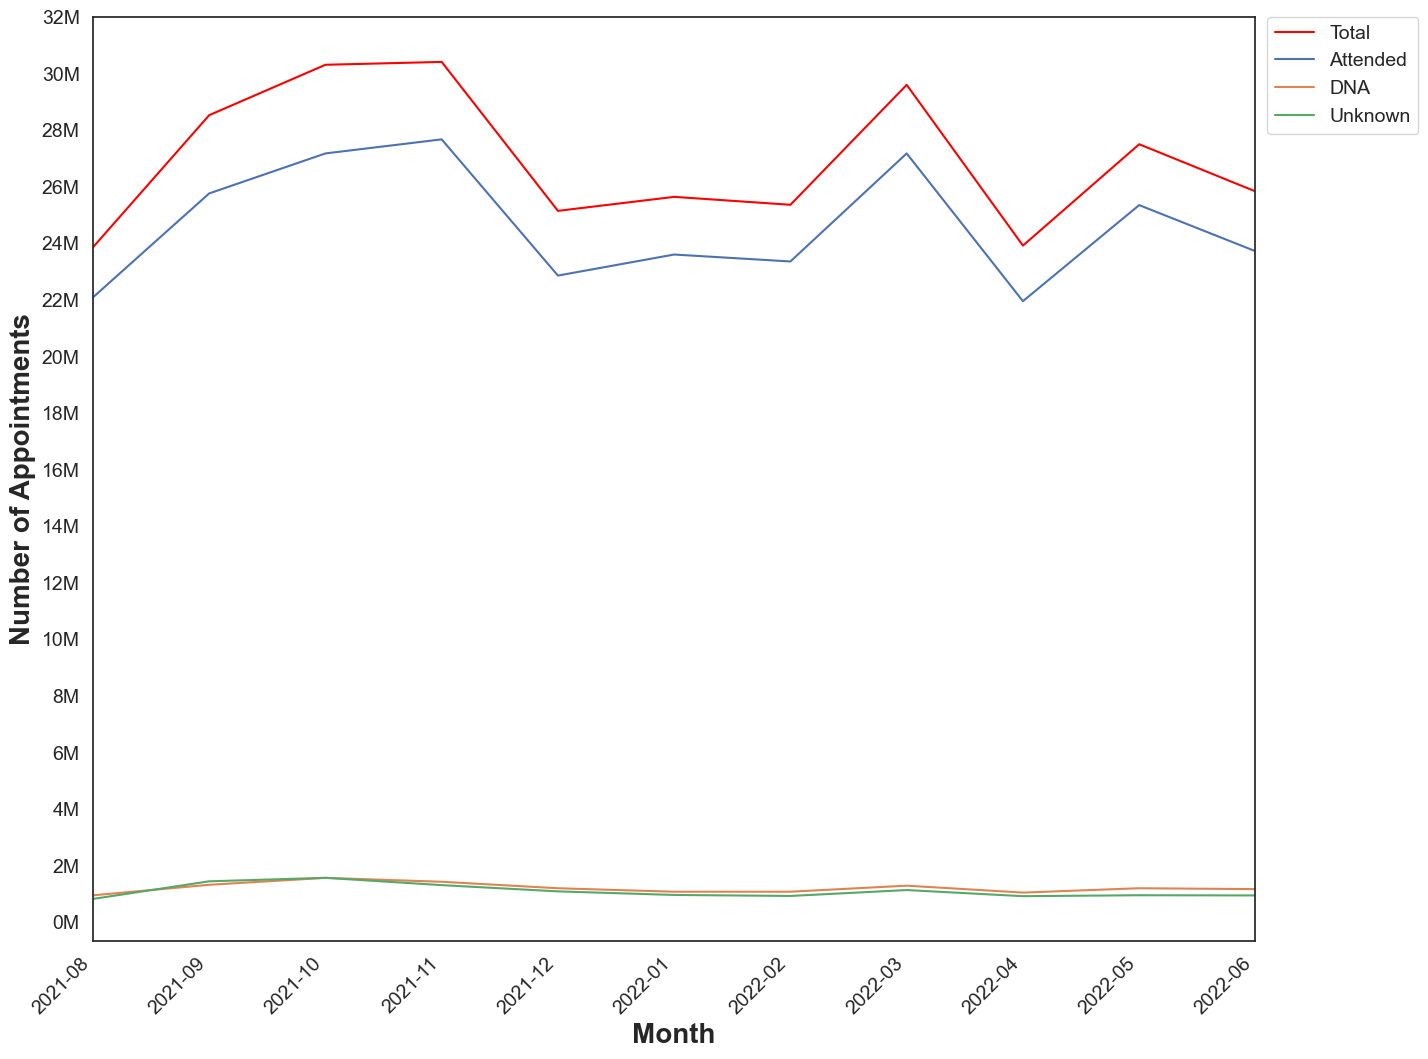

In [105]:
# Create a line plot to answer the question.
# Define new DataFrame.
ar_stat = ar_after.groupby(['appointment_month', 'appointment_status']).sum('count_of_appointments').reset_index()

# Create a lineplot with Seaborn.
ax1 = sns.lineplot(x = 'appointment_month', y = 'count_of_appointments',
                   data = ar_df, ci = None,
                   label='Total', color='red')
ax2 = sns.lineplot(x = 'appointment_month', y = 'count_of_appointments', hue = 'appointment_status',
            data = ar_stat, ci = None)
# Reposition legend.
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0, fontsize=14);
# Adjust x axis.
plt.xlabel("Month", weight='bold', size=20);
plt.xlim([ar_stat['appointment_month'].min(), ar_stat['appointment_month'].max()]);
# Adjust y axis
plt.ylabel("Number of Appointments", weight='bold', size=20);
plt.ylim();
# Adjust x ticks.
plt.xticks(fontsize=14, rotation=45, horizontalalignment='right')
# Adjust y ticks.
ytick_positions = range(0, int(3.2e7)+int(0.2e7), int(0.2e7))
ytick_labels = [f'{int(x/1e6)}M' for x in ytick_positions]
plt.yticks(ytick_positions, ytick_labels, fontsize=14);  # Semicolon to remove extraneous output.

# Save figure as .png file for later use.
plt.savefig('appointment_status.png', dpi=300, bbox_inches='tight');

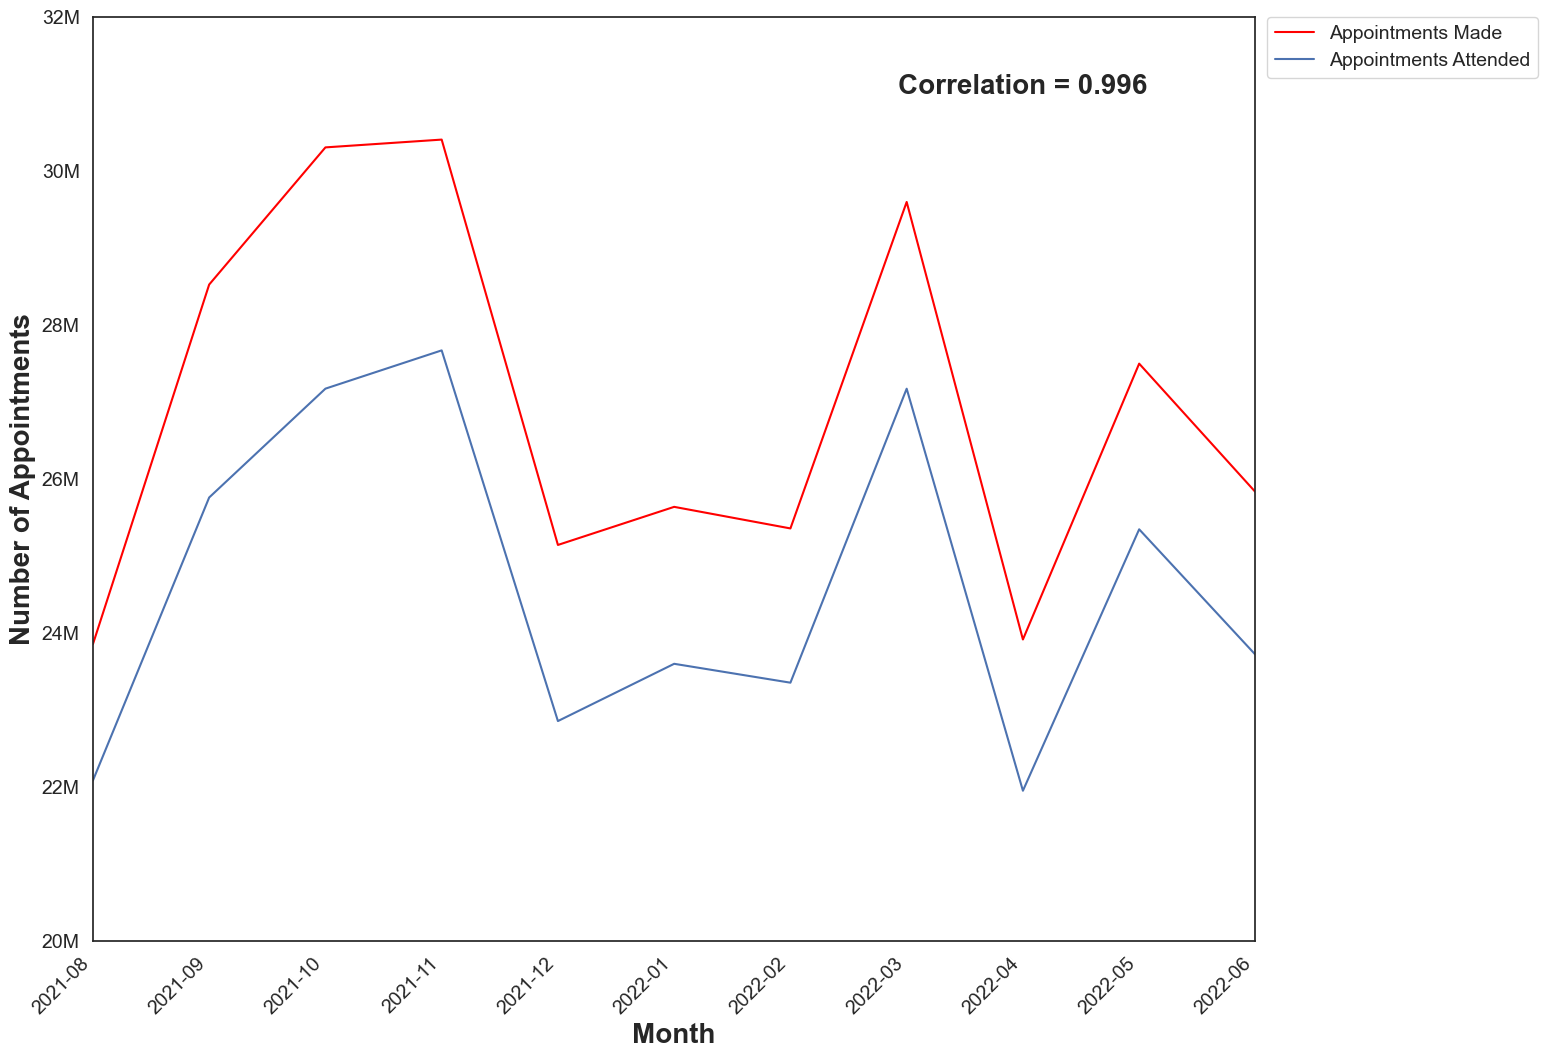

In [106]:
# Prepare DataFrame containing only attended appointments (filter out the others for clarity)
ar_attend = pd.concat([
    ar_df,
    ar_stat['count_of_appointments'][ar_stat['appointment_status'] == 'Attended']\
        .rename('attended_appointments').reset_index(drop=True)
    ], axis=1
    )

# Create a lineplot with Seaborn.
ax1 = sns.lineplot(x = 'appointment_month', y = 'count_of_appointments',
                   data = ar_attend, ci = None,
                   label='Appointments Made', color='red')
ax2 = sns.lineplot(x = 'appointment_month', y = 'attended_appointments',
            data = ar_attend, ci = None,
                  label="Appointments Attended")
# Add comment on correlation.
c = round(ar_attend['attended_appointments'].corr(ar_attend['count_of_appointments']), 3)
ax1.annotate(f'Correlation = {c}', 
             xy=('2022-04',int(3.1e7)),
             horizontalalignment='center', fontsize=20, weight='bold')
# Reposition legend.
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0, fontsize=14);
# Adjust x axis.
plt.xlabel("Month", weight='bold', size=20);
plt.xlim([ar_attend['appointment_month'].min(), ar_attend['appointment_month'].max()]);
# Adjust y axis
plt.ylabel("Number of Appointments", weight='bold', size=20);
plt.ylim();
# Adjust x ticks.
plt.xticks(fontsize=14, rotation=45, horizontalalignment='right')
# Adjust y ticks.
ytick_positions = range(int(2e7), int(3.2e7)+int(0.2e7), int(0.2e7))
ytick_labels = [f'{int(x/1e6)}M' for x in ytick_positions]
plt.yticks(ytick_positions, ytick_labels, fontsize=14);  # Semicolon to remove extraneous output.

# Save figure as .png file for later use.
plt.savefig('attendance_trend.png', dpi=300, bbox_inches='tight');

**Comment:**

> Correlation between attended appointments and the total number of appointments is exceedingly close to one, meaning they are almost perfectly correlated. If we combine this with the fact that they also share similar value magnitudes, then we can surmise that one is a very good predictor of the other. This means that the "success rate" of booked appointments is consistent, regardless of time. The cause of missed appointments is therefore most likely due to factors that are systematically consistent, and not due to any variation due to, say, COVID or other temporary events.

**Question 4:** Are there changes in terms of appointment type and the busiest months?

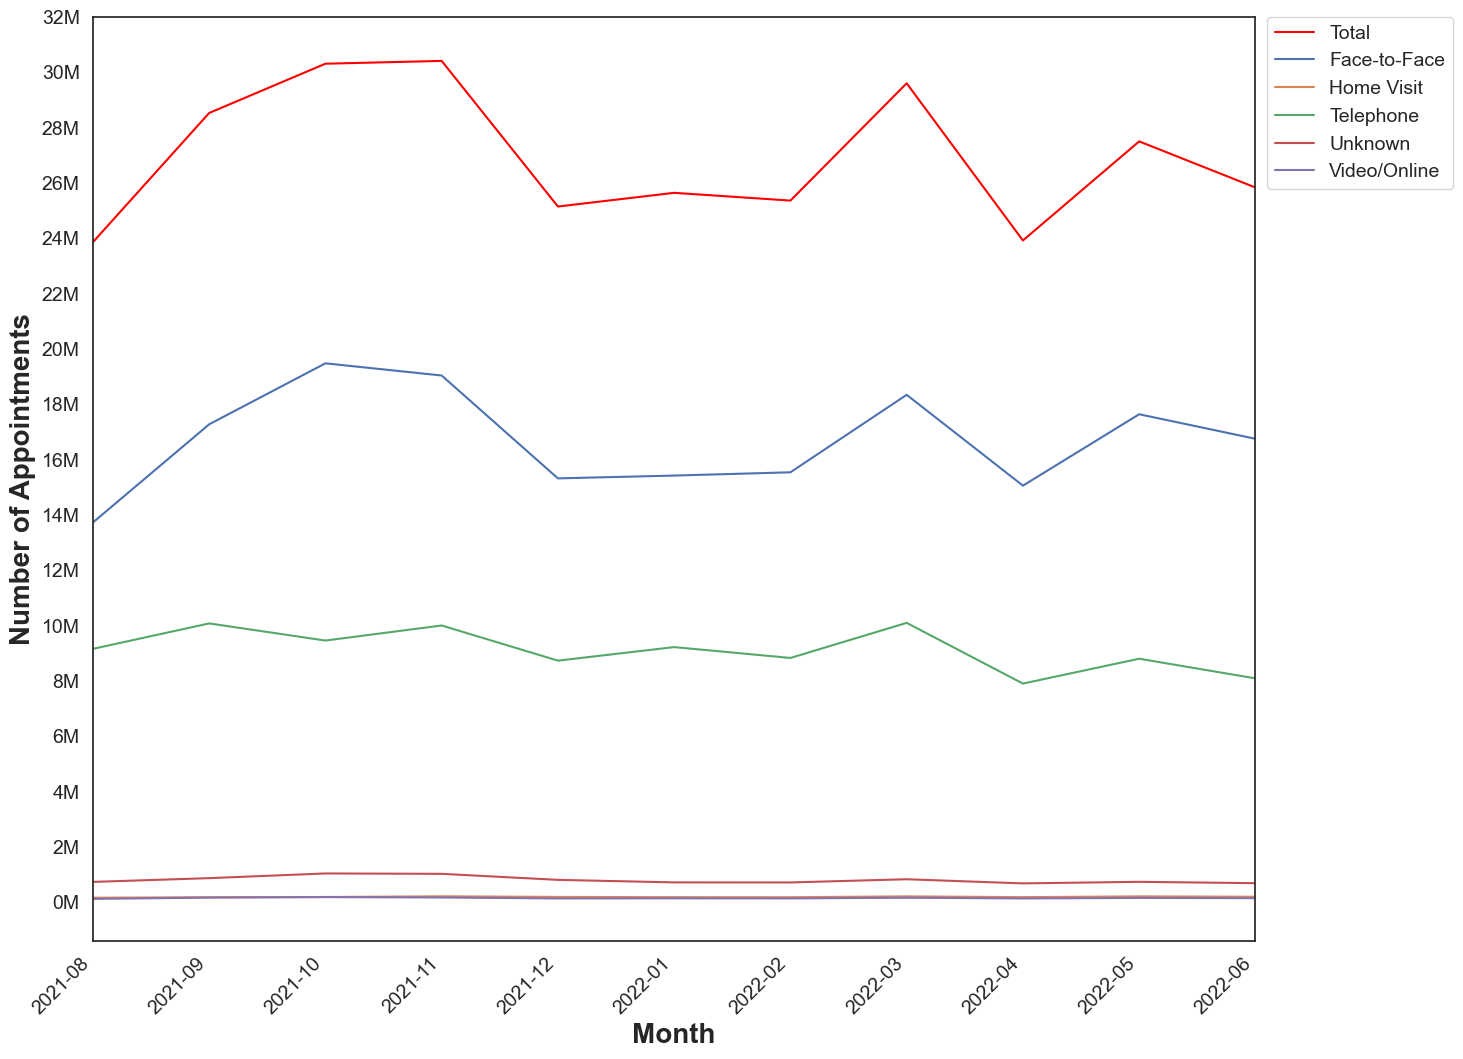

In [107]:
# Create a line plot to answer the question.
# Define new DataFrame.
ar_type = ar_after.groupby(['appointment_month', 'appointment_mode']).sum('count_of_appointments').reset_index()

# Create a lineplot with Seaborn.
ax1 = sns.lineplot(x = 'appointment_month', y = 'count_of_appointments',
                   data = ar_df, ci = None,
                   label='Total', color='red')
ax2 = sns.lineplot(x = 'appointment_month', y = 'count_of_appointments', hue = 'appointment_mode',
                   data = ar_type, ci = None)
# Reposition legend.
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0, fontsize=14);
# Adjust x axis.
plt.xlabel("Month", weight='bold', size=20);
plt.xlim([ar_type['appointment_month'].min(), ar_type['appointment_month'].max()]);
# Adjust y axis
plt.ylabel("Number of Appointments", weight='bold', size=20);
plt.ylim();
# Adjust x ticks.
plt.xticks(fontsize=14, rotation=45, horizontalalignment='right')
# Adjust y ticks.
ytick_positions = range(0, int(3.2e7)+int(0.2e7), int(0.2e7))
ytick_labels = [f'{int(x/1e6)}M' for x in ytick_positions]
plt.yticks(ytick_positions, ytick_labels, fontsize=14);  # Semicolon to remove extraneous output.

# Save figure as .png file for later use.
plt.savefig('appointment_mode.png', dpi=300, bbox_inches='tight');

**Question 5:** Are there any trends in time between booking an appointment?

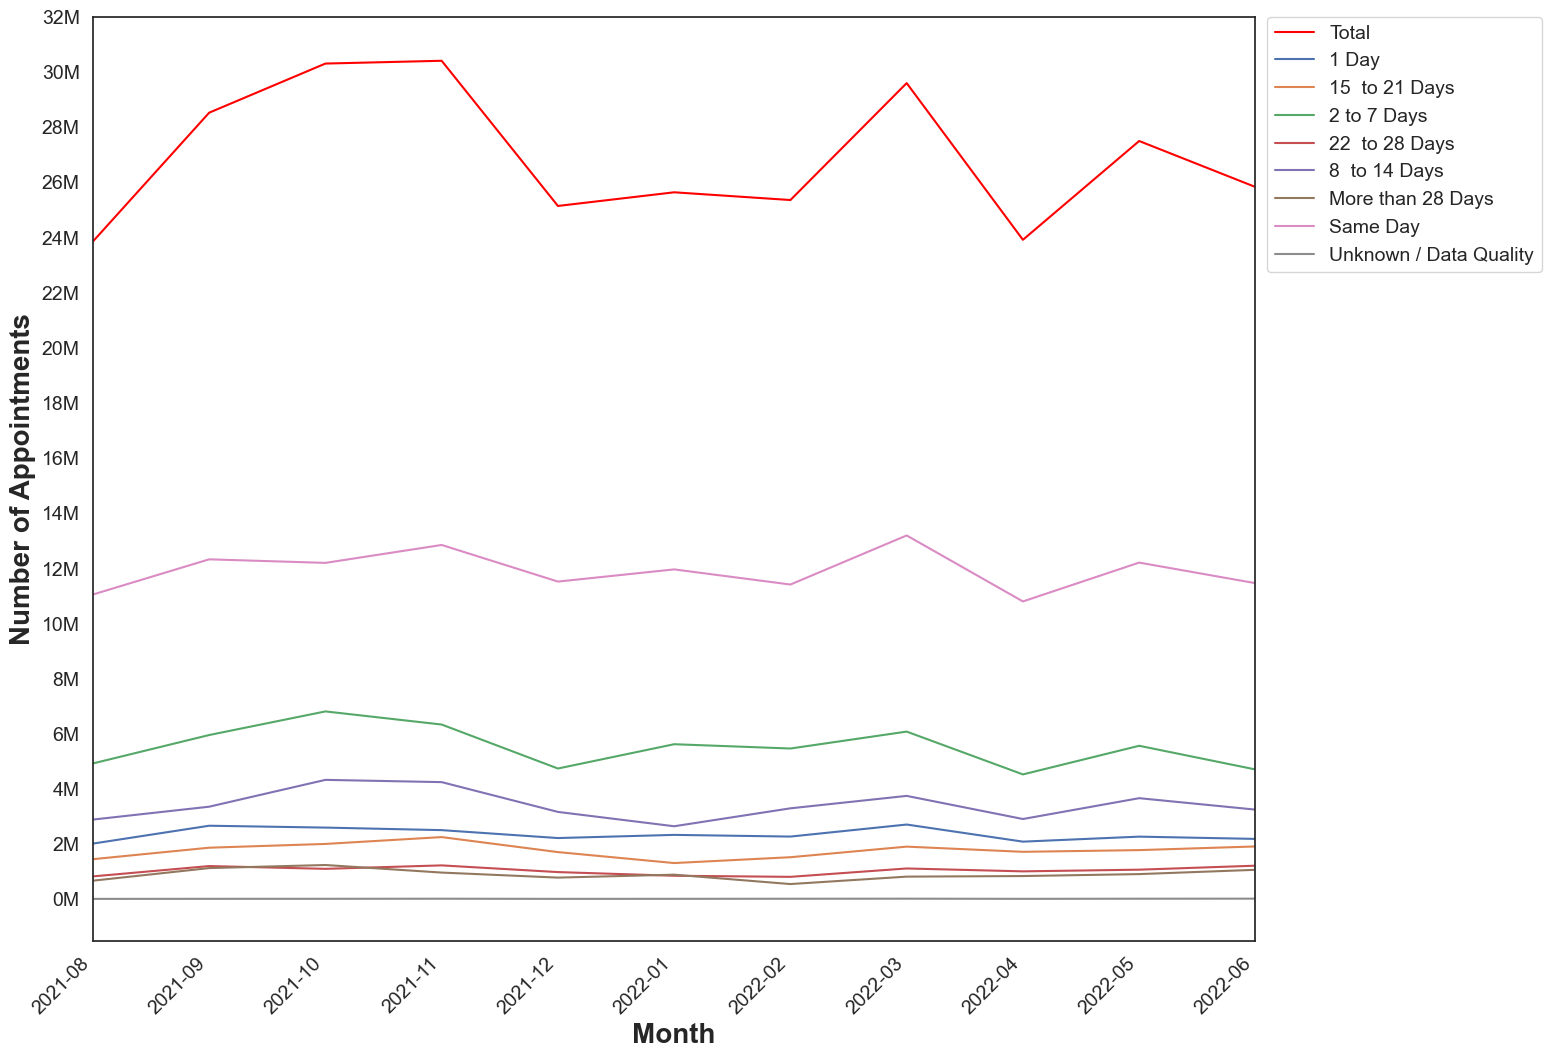

In [108]:
# Create a line plot to answer the question.
# Define new DataFrame.
ar_book = ar_after.groupby(['appointment_month', 'time_between_book_and_appointment'])\
    .sum('count_of_appointments').reset_index()

# Create a lineplot with Seaborn.
ax1 = sns.lineplot(x = 'appointment_month', y = 'count_of_appointments',
                   data = ar_df, ci = None,
                   label='Total', color='red')
ax2 = sns.lineplot(x = 'appointment_month', y = 'count_of_appointments', hue = 'time_between_book_and_appointment',
            data = ar_book, ci = None)
# Reposition legend.
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0, fontsize=14);
# Adjust x axis.
plt.xlabel("Month", weight='bold', size=20);
plt.xlim([ar_book['appointment_month'].min(), ar_book['appointment_month'].max()]);
# Adjust y axis
plt.ylabel("Number of Appointments", weight='bold', size=20);
plt.ylim();
# Adjust x ticks.
plt.xticks(fontsize=14, rotation=45, horizontalalignment='right')
# Adjust y ticks.
ytick_positions = range(0, int(3.2e7)+int(0.2e7), int(0.2e7))
ytick_labels = [f'{int(x/1e6)}M' for x in ytick_positions]
plt.yticks(ytick_positions, ytick_labels, fontsize=14);  # Semicolon to remove extraneous output.

# Save figure as .png file for later use.
plt.savefig('appointment_booking.png', dpi=300, bbox_inches='tight');

In [109]:
# Replace time between booking and appointments to numeric values for ease of use.
# Create copy of column to preserve original data.
book_num = ar_book['time_between_book_and_appointment'].copy()

# Assign numeric values to each booking string.
book_num[book_num == 'Same Day'] = 0
book_num[book_num == '1 Day'] = 1
book_num[book_num == '2 to 7 Days'] = 7
book_num[book_num == '8  to 14 Days'] = 14
book_num[book_num == '15  to 21 Days'] = 21
book_num[book_num == '22  to 28 Days'] = 28
book_num[book_num == 'More than 28 Days'] = 35
book_num[book_num == 'Unknown / Data Quality'] = np.nan

# Create copy of DataFrame to preserve original data.
ar_book_num = ar_book.copy()
ar_book_num['time_between_book_and_appointment'] = book_num

**Comment:**

> I could not find a way to utilise the above transformation of booking delays into numeric values. Given more time for analysis, and greater access to historic data, there could be ways to create interesting visualisations using this information. My intial idea was to produce a scatter plot with 'book_num' on one axis and another, related, quantity on another, with the size of the points governed by the count of appointments; however, this would require more time than I currently have available.

**Question 6:** How do the spread of service settings compare?

In [110]:
# Let's go back to the national category DataFrame you created in an earlier assignment activity.
display(nc)

appointment_date icb_ons_code  \
0            2021-08-02    E54000050   
1            2021-08-02    E54000050   
2            2021-08-02    E54000050   
3            2021-08-02    E54000050   
4            2021-08-02    E54000050   
...                 ...          ...   
817389       2022-06-30    E54000054   
817390       2022-06-30    E54000054   
817391       2022-06-30    E54000054   
817392       2022-06-30    E54000054   
817393       2022-06-30    E54000054   

                             sub_icb_location_name            service_setting  \
0       NHS North East and North Cumbria ICB - 00L       Primary Care Network   
1       NHS North East and North Cumbria ICB - 00L                      Other   
2       NHS North East and North Cumbria ICB - 00L           General Practice   
3       NHS North East and North Cumbria ICB - 00L           General Practice   
4       NHS North East and North Cumbria ICB - 00L           General Practice   
...                                            ...                        ...   
817389              NHS West Yorkshire ICB - X2C4Y  Extended Access Provision   
817390              NHS West Yorkshire ICB - X2C4Y  Extended Access Provision   
817391              NHS West Yorkshire ICB - X2C4Y  Extended Access Provision   
817392              NHS West Yorkshire ICB - X2C4Y  Extended Access Provision   
817393              NHS West Yorkshire ICB - X2C4Y  Extended Access Provision   

                  context_type                       national_category  \
0       Care Related Encounter  Patient contact during Care Home Round   
1       Care Related Encounter                         Planned Clinics   
2       Care Related Encounter                              Home Visit   
3       Care Related Encounter              General Consultation Acute   
4       Care Related Encounter            Structured Medication Review   
...                        ...                                     ...   
817389  Care Related Encounter             Unplanned Clinical Activity   
817390  Care Related Encounter                         Planned Clinics   
817391  Care Related Encounter              Planned Clinical Procedure   
817392  Care Related Encounter            General Consultation Routine   
817393  Care Related Encounter              General Consultation Acute   

        count_of_appointments appointment_month  
0                           3           2021-08  
1                           7           2021-08  
2                          79           2021-08  
3                         725           2021-08  
4                           2           2021-08  
...                       ...               ...  
817389                     12           2022-06  
817390                      4           2022-06  
817391                     92           2022-06  
817392                      4           2022-06  
817393                     19           2022-06  

[817394 rows x 8 columns]

In [111]:
# Create a new DataFrame consisting of the month of appointment and the number of appointments.
# This was done previously in assignment activity 4, and was named nc_ss.
# We can redefine it just in case, as it does not take long to run.
nc_ss = nc.groupby(['appointment_month', 'service_setting']).sum('count_of_appointments').reset_index()

# View the DataFrame.
# Add docstring for clarity.
print("The number of appointments per month, grouped by service setting, in chronological order:")
display(nc_ss)

The number of appointments per month, grouped by service setting, in chronological order:


appointment_month            service_setting  count_of_appointments
0            2021-08  Extended Access Provision                 160927
1            2021-08           General Practice               21575852
2            2021-08                      Other                 449101
3            2021-08       Primary Care Network                 432448
4            2021-08                   Unmapped                1233843
5            2021-09  Extended Access Provision                 187906
6            2021-09           General Practice               25940821
7            2021-09                      Other                 527174
8            2021-09       Primary Care Network                 530485
9            2021-09                   Unmapped                1336115
10           2021-10  Extended Access Provision                 209539
11           2021-10           General Practice               27606171
12           2021-10                      Other                 556487
13           2021-10       Primary Care Network                 564981
14           2021-10                   Unmapped                1366656
15           2021-11  Extended Access Provision                 207577
16           2021-11           General Practice               27767889
17           2021-11                      Other                 558784
18           2021-11       Primary Care Network                 614324
19           2021-11                   Unmapped                1256496
20           2021-12  Extended Access Provision                 173504
21           2021-12           General Practice               23008818
22           2021-12                      Other                 464718
23           2021-12       Primary Care Network                 539479
24           2021-12                   Unmapped                 954257
25           2022-01  Extended Access Provision                 186375
26           2022-01           General Practice               23583053
27           2022-01                      Other                 457440
28           2022-01       Primary Care Network                 569044
29           2022-01                   Unmapped                 839562
30           2022-02  Extended Access Provision                 196627
31           2022-02           General Practice               23305934
32           2022-02                      Other                 456153
33           2022-02       Primary Care Network                 585300
34           2022-02                   Unmapped                 811246
35           2022-03  Extended Access Provision                 231905
36           2022-03           General Practice               27187368
37           2022-03                      Other                 530677
38           2022-03       Primary Care Network                 702176
39           2022-03                   Unmapped                 942912
40           2022-04  Extended Access Provision                 192284
41           2022-04           General Practice               21916791
42           2022-04                      Other                 437402
43           2022-04       Primary Care Network                 606270
44           2022-04                   Unmapped                 760313
45           2022-05  Extended Access Provision                 220511
46           2022-05           General Practice               25238620
47           2022-05                      Other                 503327
48           2022-05       Primary Care Network                 712280
49           2022-05                   Unmapped                 820770
50           2022-06  Extended Access Provision                 209652
51           2022-06           General Practice               23680374
52           2022-06                      Other                 478813
53           2022-06       Primary Care Network                 700599
54           2022-06                   Unmapped                 758640

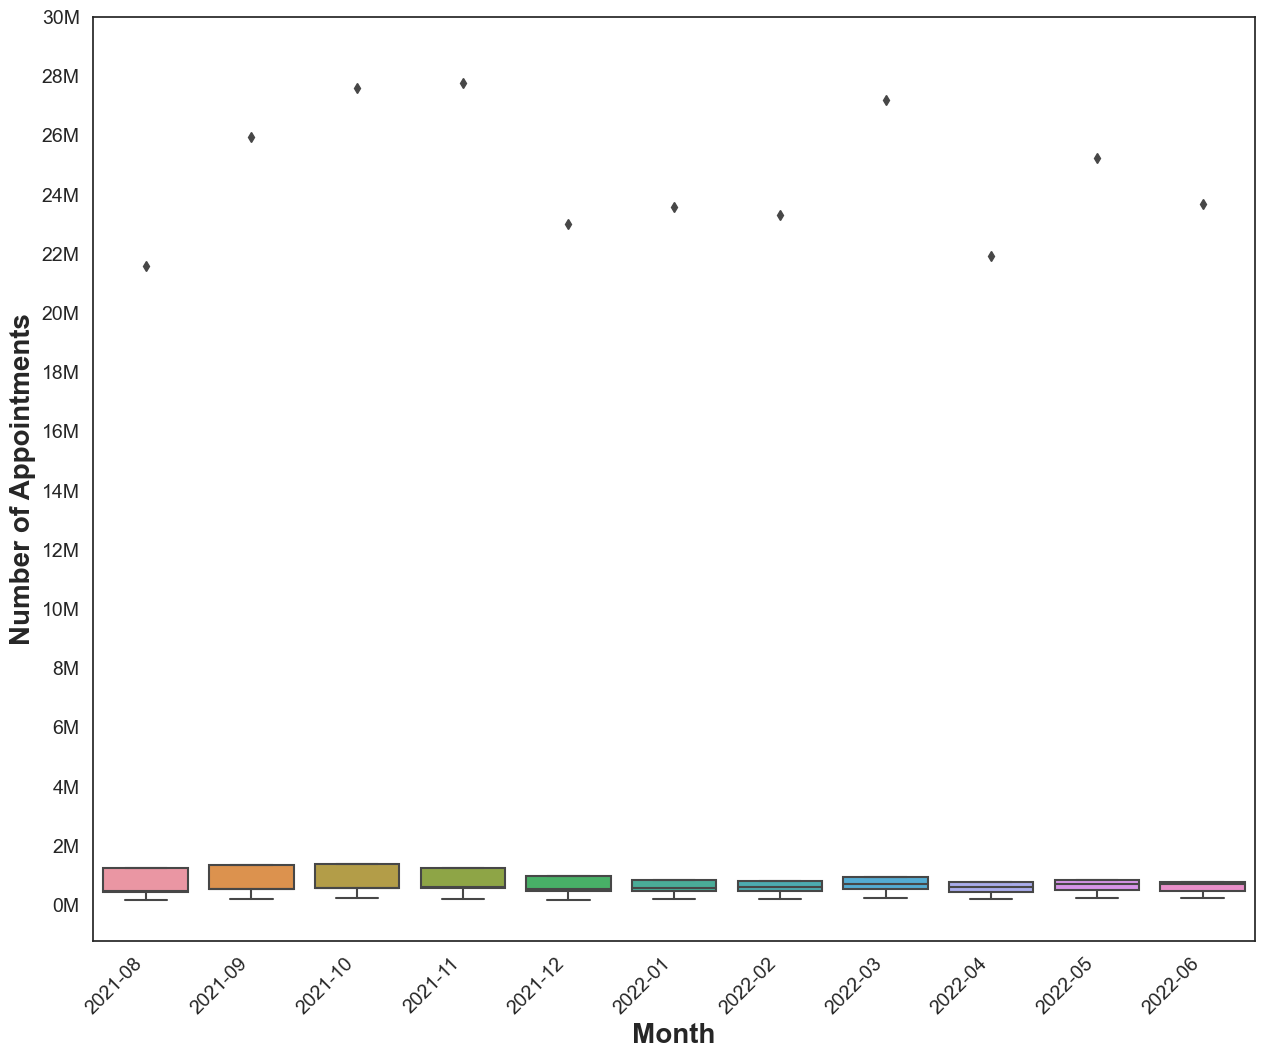

In [112]:
# Create a boxplot to investigate spread by month.
# Create seaborn boxplot.
ax1 = sns.boxplot(x = 'appointment_month', y = 'count_of_appointments',
            data = nc_ss)
# Adjust x axis.
plt.xlabel("Month", weight='bold', size=20);
plt.xlim();
# Adjust y axis
plt.ylabel("Number of Appointments", weight='bold', size=20);
plt.ylim();
# Adjust x ticks.
plt.xticks(fontsize=14, rotation=45, horizontalalignment='right')
# Adjust y ticks.
ytick_positions = range(0, int(3e7)+int(0.2e7), int(0.2e7))
ytick_labels = [f'{int(x/1e6)}M' for x in ytick_positions]
plt.yticks(ytick_positions, ytick_labels, fontsize=14);  # Semicolon to remove extraneous output.

# Save figure as .png file for later use.
plt.savefig('ss_spread_month.png', dpi=300, bbox_inches='tight');

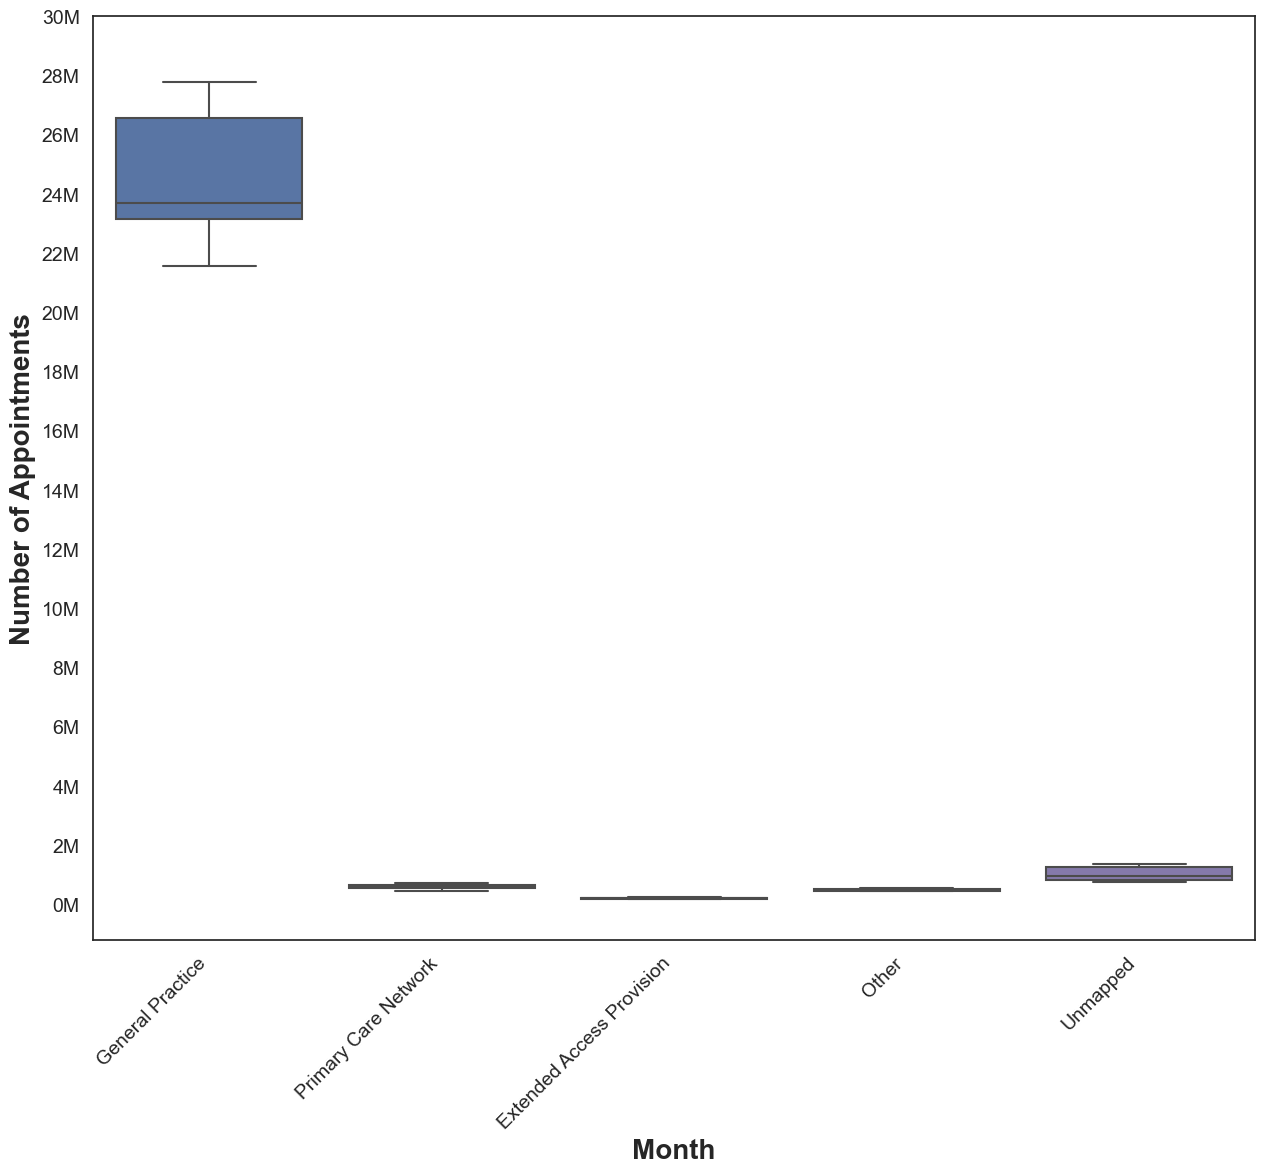

In [113]:
# Create a boxplot to investigate spread by service setting.
# Define order of boxplot
order = ['General Practice','Primary Care Network','Extended Access Provision','Other','Unmapped']

# Create seaborn boxplot.
ax1 = sns.boxplot(x = 'service_setting', y = 'count_of_appointments',
            data = nc_ss, order=order)
# Adjust x axis.
plt.xlabel("Month", weight='bold', size=20);
plt.xlim();
# Adjust y axis
plt.ylabel("Number of Appointments", weight='bold', size=20);
plt.ylim();
# Adjust x ticks.
plt.xticks(fontsize=14, rotation=45, horizontalalignment='right')
# Adjust y ticks.
ytick_positions = range(0, int(3e7)+int(0.2e7), int(0.2e7))
ytick_labels = [f'{int(x/1e6)}M' for x in ytick_positions]
plt.yticks(ytick_positions, ytick_labels, fontsize=14);  # Semicolon to remove extraneous output.

# Save figure as .png file for later use.
plt.savefig('ss_spread.png', dpi=300, bbox_inches='tight');

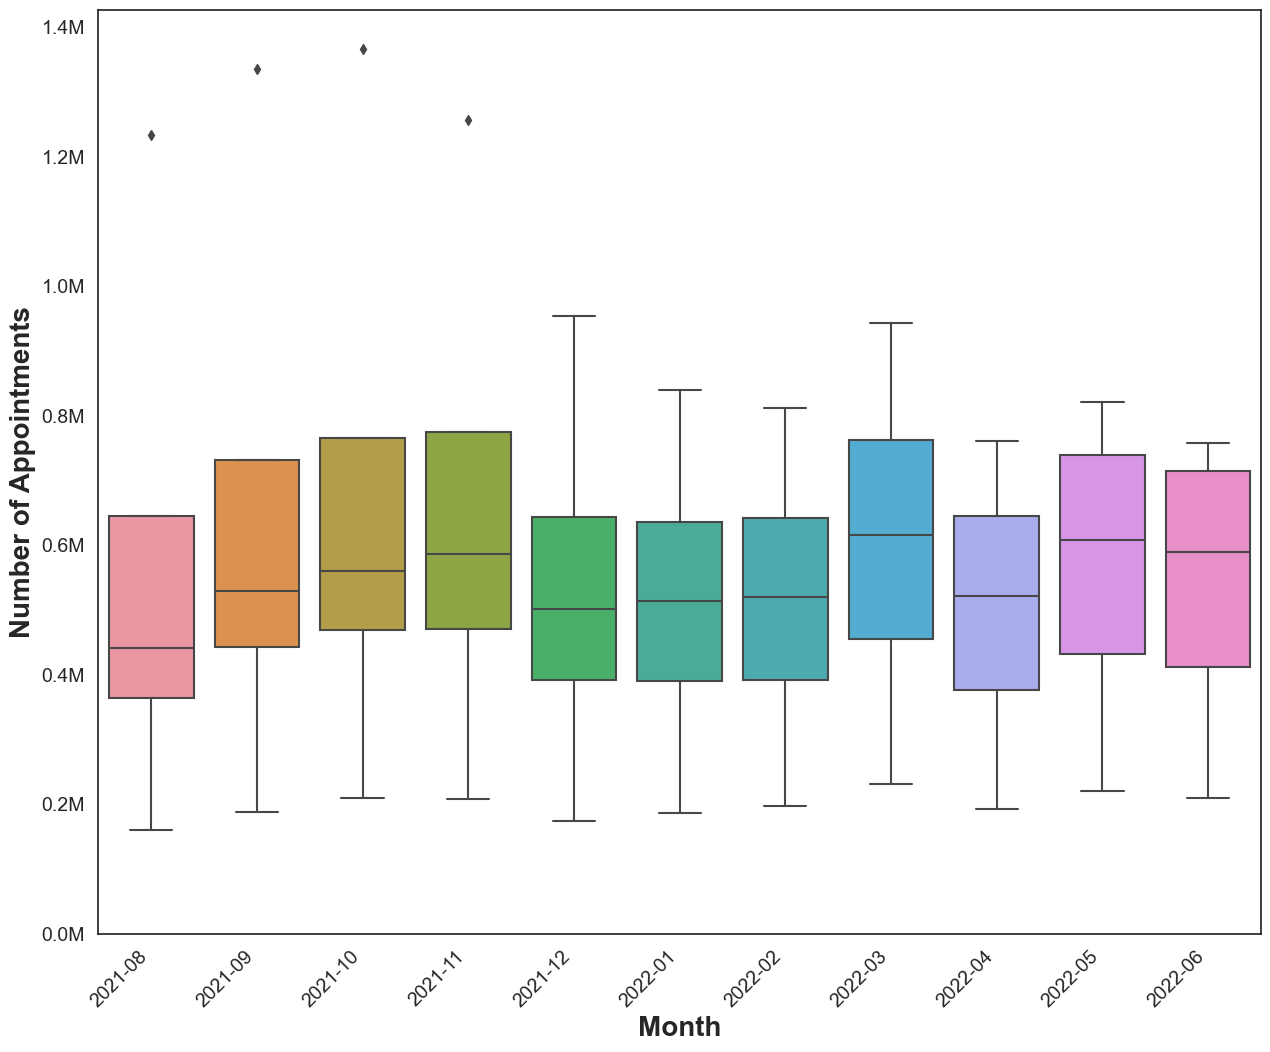

In [114]:
# Create a boxplot to investigate the spread by month, excluding GP.
# Create seaborn boxplot.
ax1 = sns.boxplot(x = 'appointment_month', y = 'count_of_appointments',
            data = nc_ss[nc_ss['service_setting'] != 'General Practice'])
# Adjust x axis.
plt.xlabel("Month", weight='bold', size=20);
plt.xlim();
# Adjust y axis
plt.ylabel("Number of Appointments", weight='bold', size=20);
plt.ylim();
# Adjust x ticks.
plt.xticks(fontsize=14, rotation=45, horizontalalignment='right')
# Adjust y ticks.
ytick_positions = range(0, int(1.4e6)+int(0.2e6), int(0.2e6))
ytick_labels = [f'{round(float(x)/1e6, 1)}M' for x in ytick_positions]
plt.yticks(ytick_positions, ytick_labels, fontsize=14);  # Semicolon to remove extraneous output.

# Save figure as .png file for later use.
plt.savefig('ss_spread_month_ex.png', dpi=300, bbox_inches='tight');

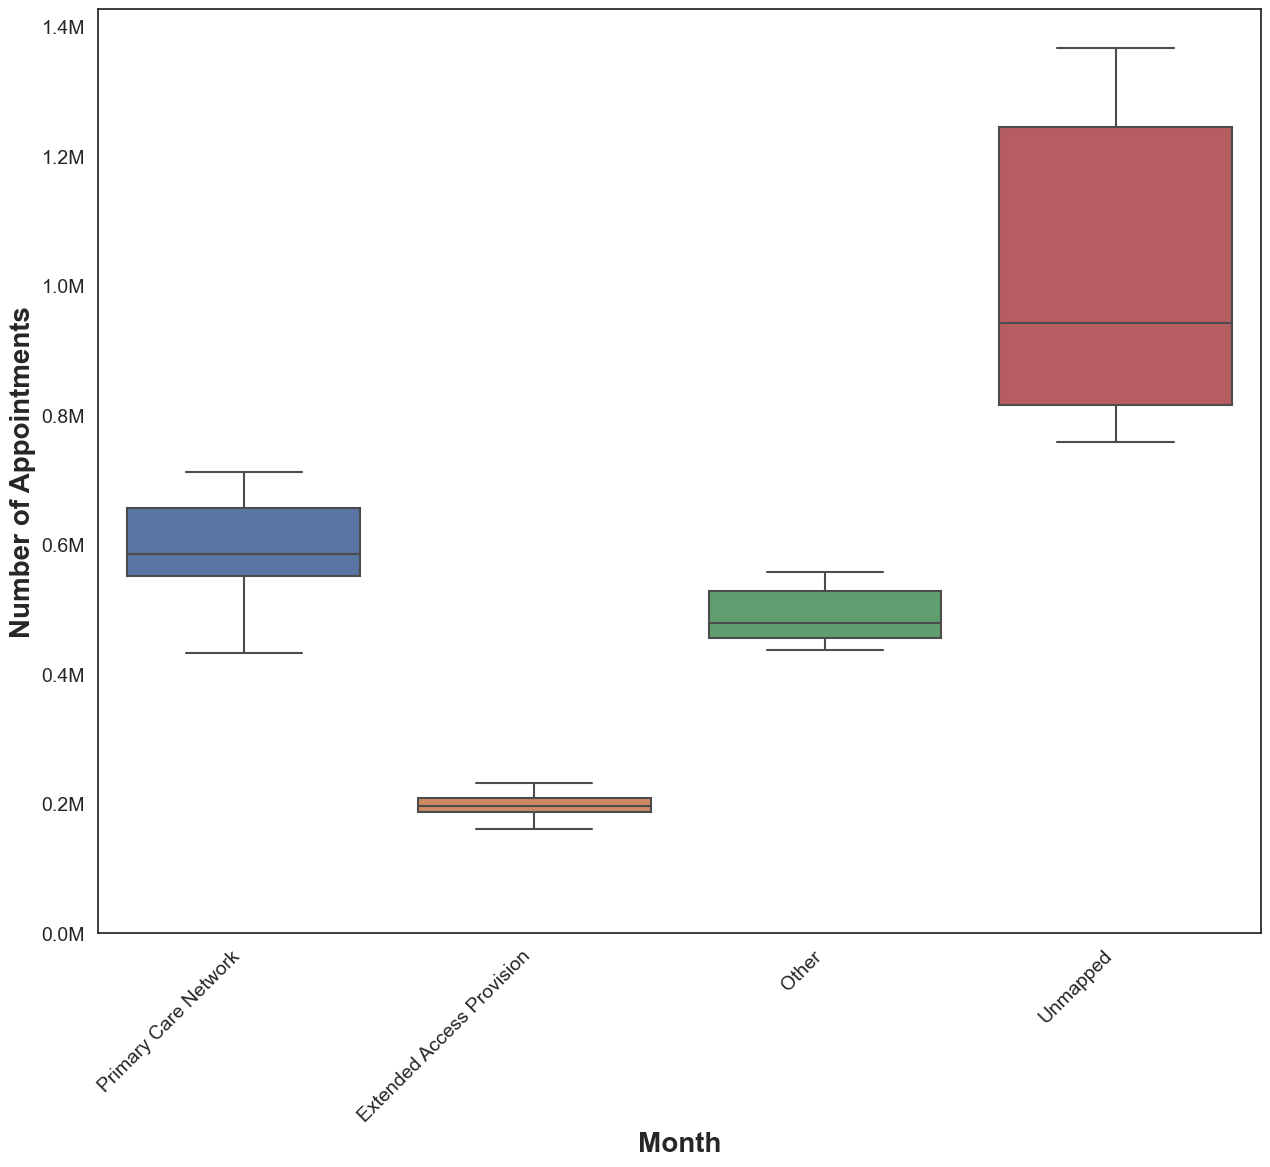

In [115]:
# Create a boxplot to investigate the spread by service setting, excluding GP.
# Define order of boxplot
order = ['Primary Care Network','Extended Access Provision','Other','Unmapped']

# Create seaborn boxplot.
ax1 = sns.boxplot(x = 'service_setting', y = 'count_of_appointments',
                  data = nc_ss[nc_ss['service_setting'] != 'General Practice'],
                  order=order)
# Adjust x axis.
plt.xlabel("Month", weight='bold', size=20);
plt.xlim();
# Adjust y axis
plt.ylabel("Number of Appointments", weight='bold', size=20);
plt.ylim();
# Adjust x ticks.
plt.xticks(fontsize=14, rotation=45, horizontalalignment='right')
# Adjust y ticks.
ytick_positions = range(0, int(1.4e6)+int(0.2e6), int(0.2e6))
ytick_labels = [f'{round(float(x)/1e6, 1)}M' for x in ytick_positions]
plt.yticks(ytick_positions, ytick_labels, fontsize=14);  # Semicolon to remove extraneous output.

# Save figure as .png file for later use.
plt.savefig('ss_spread_ex.png', dpi=300, bbox_inches='tight');

# 

### Provide a summary of your findings and recommendations based on the analysis.

> **How are appointments handled, and are they attended?** The NHS accumulates a whopping 23M+ appointments every month, with 30M+ occasionally during peaks in traffic. Most of these appointments are attended to face-to-face, or over the telephone, by general practice staff (staff under the GMS/PMS/APMS contract), with attendance by other service settings being in the vast minority. The workload is roughly evenly split between GPs and other types of staff. The trend of this total number of appointments is closely correlated to number of attended appointments (correlation = 0.996; with 1 being perfect correlation), thus indicating that appointment attendance is governed by factors that remain consistent over time.

> **Should the NHS start looking at increasing staff levels?** It is natural to ask the question of whether or not there are enough staff to cover the vast number of appointments. To do this, we calculated an estimate of the NHS's daily utilisation, of which the theoretical maximum accommodation is 1.2M appointments per day (assuming 100% utilisation). According to initial analysis, we can see that utilisation hovers nowhere near 100%, and instead fluctuates between 66% and 85%, with the latter being for only very brief periods of time. Hiring more staff would of course increase the appointment capacity; however, this is perhaps not the biggest problem, as existing NHS staff are nowhere near fully utilised. So we have arrived at somewhat of a quandary: the number of appointments is well below NHS capacity, and yet, as we will see below, waiting times for appointments are frequently NOT within one day. This is potentially due to systematic inefficiencies, but further analysis is required to make that claim.

> **Shortage or inefficiency?** One indicator of efficiency within the NHS is the time between bookings and appointments; ideally, we want this to be as short as possible to reduce waiting times for patients and to prevent "bottlenecking", whereby delayed appointments temporarily push the NHS over capacity as new appointments keep rolling in. A perfect example of this is the lockdowns amidst the 2020 COVID pandemic, which produced an appointment backlog, delaying fresh appointments even years later. From the data, we find that roughly half of appointments are attended to on the same day as the booking, and all others are delayed to various degrees. If perfect efficiency is defined as 100% of appointments being attended to on the same day, then the NHS is currently only 50% efficient, which strengthens the hypothesis that systematic inefficiencies are currently more of a problem than direct staff shortage. Of course, increasing the number of staff may increase efficiency also, if we hire strategically to address key workflow bottlenecks, but this is not the most cost-effective solution.

> **Recommendations:** Addressing the underutilisation of current NHS resources should be the top priority, and more staff should not be the primary concern until underlying systematic inefficiencies are addressed. This could mean a number of things, such as: making the booking system more accessible, allocating workload within hospitals/GPs more efficiently, increasing awareness of open-source health-related resources etc. However, the the extent to which the problem of patients not attending appointments will be remedied by said changes is currently unclear. It is imperative to make changes systemically, and to keep track of patient attendance throughout to track the success (or failure) of any particular systematic intervention.